<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.316 Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 11



<a name='section_11_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.-1 Overview of Learning Objectives</h2>


In this lecture we will explore the following objectives:

- ks-test
- likelihood ratio
- t-test
- f-test
- Fitting for the Higgs boson signal Background
- Fitting For the Higgs Boson
- Combining p-values
<br>
<!--end-block-->

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [1]:
#>>>RUN: L10.0-runcell01

import numpy as np
import lmfit
import matplotlib.pyplot as plt
from scipy import stats

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.


In [2]:
#>>>RUN: L10.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_11_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.2 The "Student" t-test </h2>  



Now, just a fun aside. In addtiion to the $\chi^{2}$ test there is an another hypothesis test that was created known as the t-test. The origin of the t-test is that Guiness beer brewers were looking to compare beers from different sets of barley to see if they had a similar flavor. The issue was that they only had a few batches of barley, and a few batches of beer to compare distributions, in the limit of small number, we cannot assume distributions are gaussian, and, as a consequence, we cannot use the $\chi^{2}$ test. In light of this, the ["Student t-test"](https://en.wikipedia.org/wiki/Student%27s_t-test) was invented by William Gossett. Its called student t-test because Gossett published his paper as "student" to avoid Guiness beer proprietary regulations. 

The t-test, says that for $N$ samples $x_{1},...,x_{n}$ each from an underlying Guassian distribution with mean $\mu$ and variance $\sigma^{2}$, we can define the following measured mean ($\bar{x}$) and variance($s^{2}$): 
\begin{equation}
\bar{x} = \frac{1}{N}\sum_{i} x_{i} \\
s^{2}   = \frac{1}{N-1}\sum_{i} \left(x_{i}-\bar{x}\right)^{2}\\
\end{equation}
And the distribution of the mean and variance combined defined as the t-statistic
\begin{equation}
t = \frac{\bar{x}-\mu}{S/\sqrt{N}}
\end{equation}
will follow a $t$ distriubtion of $\nu=N-1$ degrees of freedom, given by
\begin{equation}
 t(x) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}
\end{equation}

The t-distribution is a low-stats combination of binomial distributions. In practice, this gives us another way to test if two distributions are equal. This one avoids using histograms. Let's see how it behaves. Lets run a t-test to see how far our distributions are from $\mu=0$

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_68291/4029181436.py:7: RuntimeWarning: Mean of empty slice.
  t = (isamples.mean()-iMu)/(isamples.std()/np.sqrt(len(isamples)))
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/4t/mwl83f3x1ls0jvy35

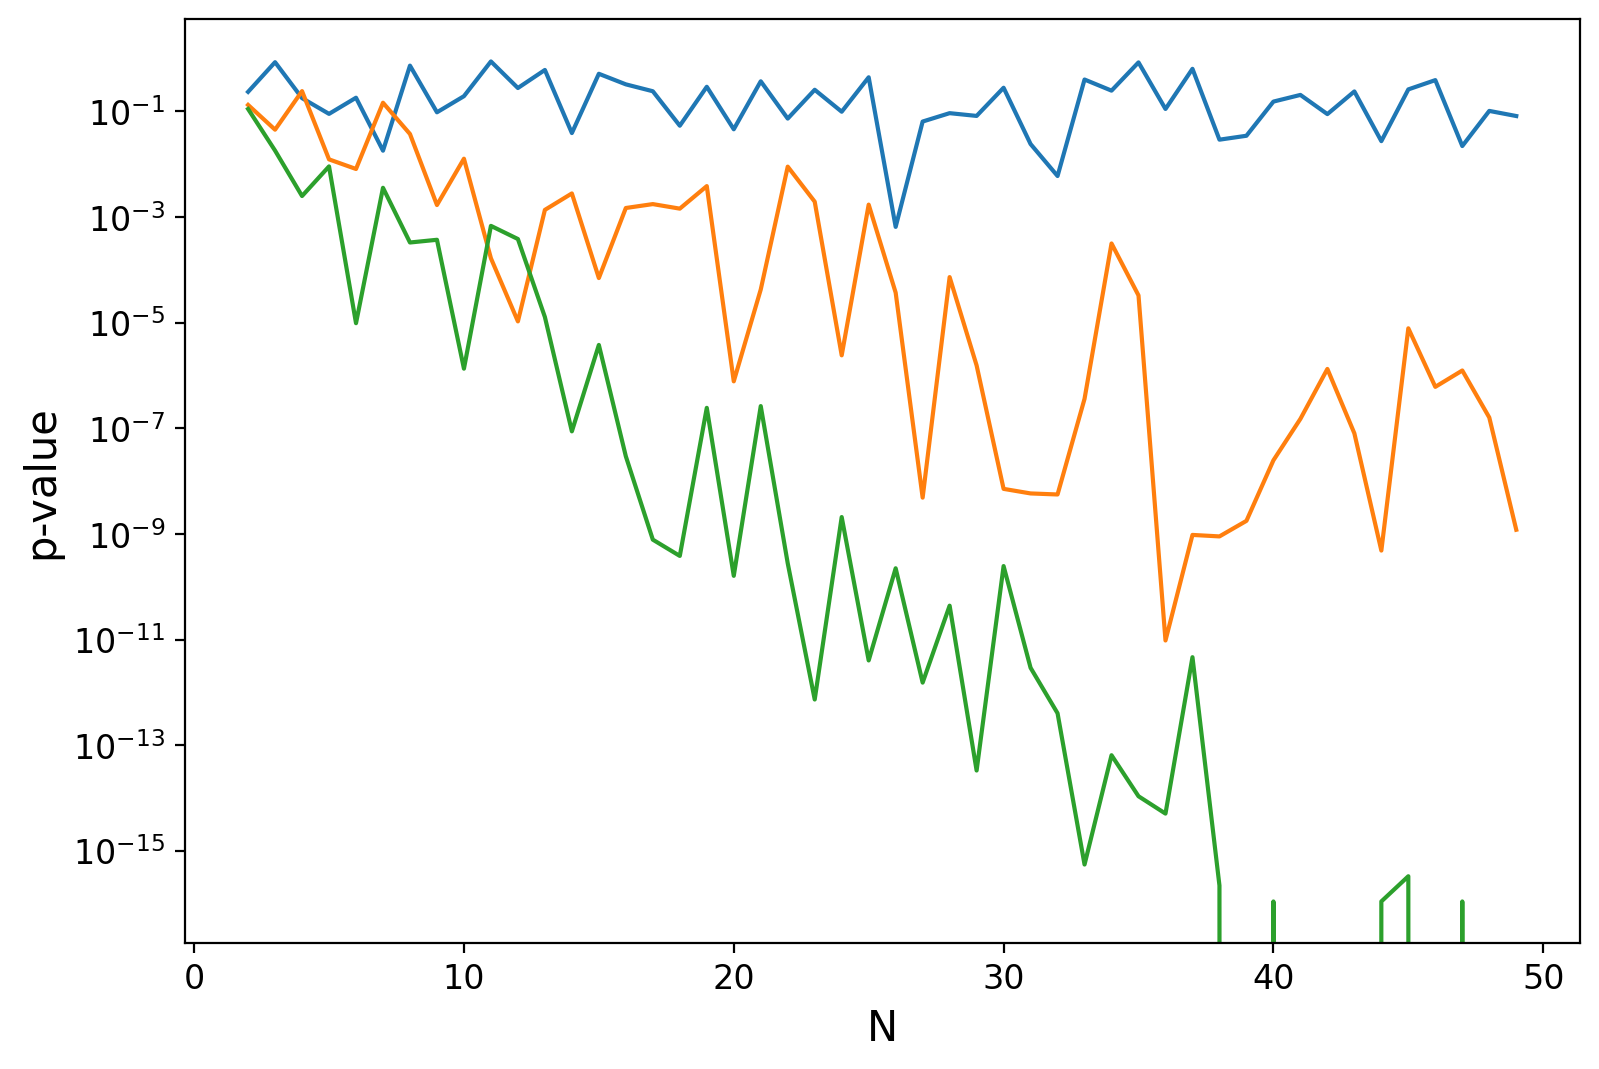

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#now lets test the consistency of that our observation is consistent
def ttest(isamples,iMu=0):
    t = (isamples.mean()-iMu)/(isamples.std()/np.sqrt(len(isamples)))
    p = 1 - stats.t.cdf(t,df=len(isamples)-1)
    return p

xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    testsamples1 = np.random.normal(0.2,1, i0)
    pvalue = ttest(testsamples1)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = ttest(testsamples2)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(2,1, i0)
    pvalue = ttest(testsamples3)
    pvalues3.append(pvalue)
    xvals.append(i0)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label="\mu=0.2")
ax.plot(xvals,pvalues2,label="\mu=1.0")
ax.plot(xvals,pvalues3,label="\mu=2.0")
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
plt.show()

As you can see this is a bit easier to compute that a likelihood or $\chi^{2}$ test, and in general its more sensitive. This is allows us to take into account the full set of distributions. 

For completeness, the general form to compare two distribution, the modified t-statistic becomes: 

\begin{equation}
t = \frac{\bar{x}_{a}-\bar{x}_{b}}{s\left(\frac{1}{N_{a}} + \frac{1}{N_{b}} \right)} \\
s = \sqrt{\frac{(N_{a}-1)s_{a}^2 + (N_{b}-1)s_{b}^2 }{N_{a}+N_{b}-2} }
\end{equation}

Where $s_{a}^2$ is the variance of $x_{a}$ and $\bar{x}_{a}$ is its mean, and the same goes for $b$. This distribution becomes most useful, when we only have a few events.

This again follows a $t$ distribution with number of degrees of freedom given by $\nu=N_{a}+N_{b}-2$. Note that if the variances are large between the two distributions, this statistic breaks down. See [here](https://en.wikipedia.org/wiki/Student%27s_t-test) for more details.


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.2.1</span>

Compute the t-statistic p-value for two gaussian distributions of different means with 50 events?
Why is it so much more powerful than the $\chi^{2}$ statistic? 

In [2]:
testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

def chi2test(iSampleB,iSampleA,nbins=5):
    countA, binsA, ignored = plt.hist(iSampleA, nbins,      density=True ,alpha=0.5,label='a')
    countB, binsB, ignored = plt.hist(iSampleB, bins=binsA, density=True,alpha=0.5,label='b')
    chi2=0
    ndof=0
    for i0 in range(len(binsA)-1):
        if countB[i0] > 0 and countA[i0] > 0:
            unc2 = countA[i0]/len(iSampleA) +  countB[i0]/len(iSampleB)
            chi2+=(countB[i0]-countA[i0])**2/unc2
            ndof=ndof+1
    #now we reply on the chi2 distribution to get the probabiliy
    p=1-stats.chi2.cdf(chi2, ndof)
    return p

def ttest_comp(iSamplesA,iSamplesB):
    s2 = (len(iSamplesA)-1)*iSamplesA.std()**2 + (len(iSamplesB)-1)*iSamplesB.std()**2
    s2 = s2/(len(iSamplesA)+ len(iSamplesB) - 2)
    s  = np.sqrt(s2)*(1/len(iSamplesA) + 1/len(iSamplesB))
    t  = ### Add your code here
    p  = stats.t.cdf(t,df=len(iSamplesA)+len(iSamplesB)-2)
    return p
print("Chi2",chi2test(testSamplesA,testSamplesB))
print("t-test",ttest_comp(testSamplesA,testSamplesB))

SyntaxError: invalid syntax (521614530.py, line 22)

Chi2 0.1292785570484456
t-test 1.2084142055908686e-10


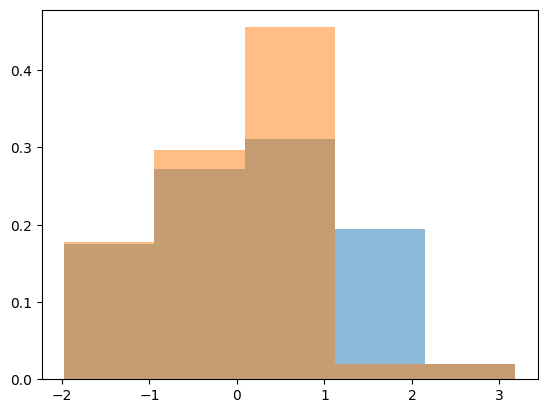

In [3]:
testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

def chi2test(iSampleB,iSampleA,nbins=5):
    countA, binsA, ignored = plt.hist(iSampleA, nbins,      density=True ,alpha=0.5,label='a')
    countB, binsB, ignored = plt.hist(iSampleB, bins=binsA, density=True,alpha=0.5,label='b')
    chi2=0
    ndof=0
    for i0 in range(len(binsA)-1):
        if countB[i0] > 0 and countA[i0] > 0:
            unc2 = countA[i0]/len(iSampleA) +  countB[i0]/len(iSampleB)
            chi2+=(countB[i0]-countA[i0])**2/unc2
            ndof=ndof+1
    #now we reply on the chi2 distribution to get the probabiliy
    p=1-stats.chi2.cdf(chi2, ndof)
    return p

def ttest_comp(iSamplesA,iSamplesB):
    s2 = (len(iSamplesA)-1)*iSamplesA.std()**2 + (len(iSamplesB)-1)*iSamplesB.std()**2
    s2 = s2/(len(iSamplesA)+ len(iSamplesB) - 2)
    s  = np.sqrt(s2)*(1/len(iSamplesA) + 1/len(iSamplesB))
    t  = (iSamplesA.mean()-iSamplesB.mean())/s
    p  = stats.t.cdf(t,df=len(iSamplesA)+len(iSamplesB)-2)
    return p
print("Chi2",chi2test(testSamplesA,testSamplesB))
print("t-test",ttest_comp(testSamplesA,testSamplesB))

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
t-test is way more sensitive
</pre>
        
**EXPLANATION:**
    
The t-test is single value, it doesn't involve bins. The chi2 will bet more and more powerful as we add more bins. However, there are limits to binning, becasue at some point we just run out of events. 
    
</div>

<a name='section_11_0'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.0 Komogorov-Smirnov Test</h2>  


In addition to doing a $\chi^{2}$-test, there is another test to compare distributions, known as the Kolmogorov-Smirnov test, or the KS-test. This is defined as the maximum difference in the CDFs of the two distributions. Its is another way to compare two distributions. The big advantage of this distribution is that it does not rely on binning of the distributions at all, since it is computed directly by taking the raw events in the sample, sorting them and taking the difference. 


0.28


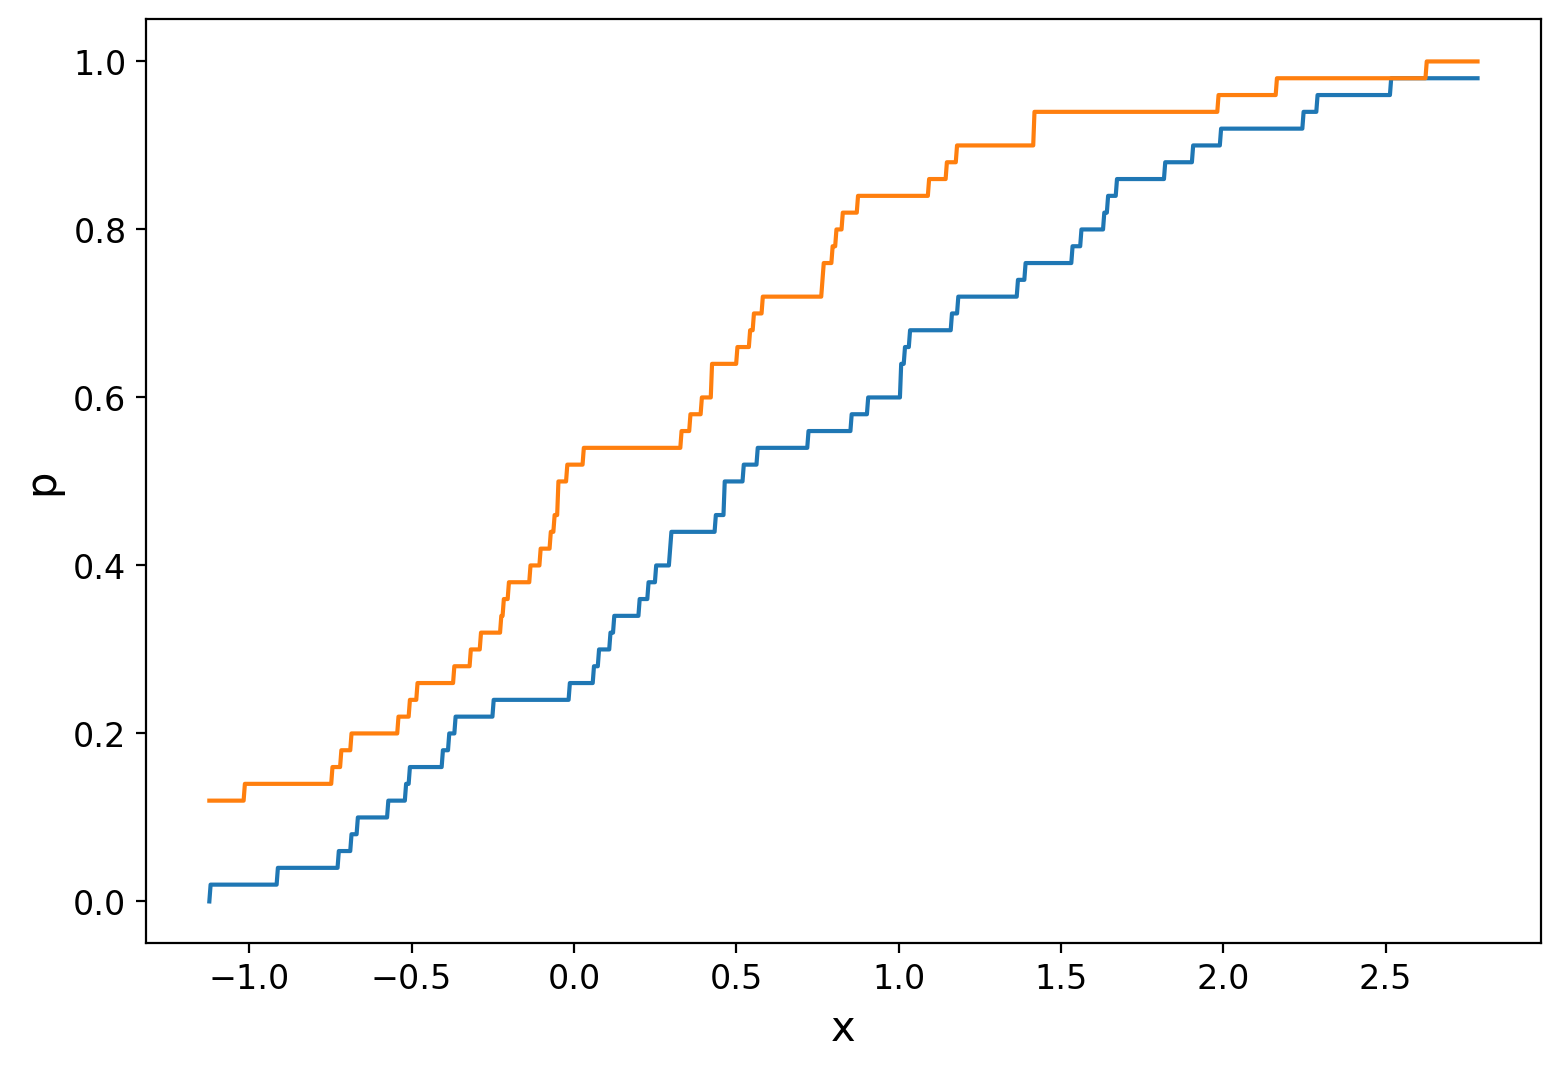

In [9]:
testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.5,1, 50)

def KStest(iSampleB,iSampleA,iPlot=False):
    #sort generated array
    sortSampleA = np.sort(iSampleA)
    sortSampleB = np.sort(iSampleB)    
    xrange=np.linspace(sortSampleA[0],sortSampleA[-1],1000)
    cdfA=np.array([])
    cdfB=np.array([])
    for x in xrange:
        cdfA = np.append(cdfA,len(sortSampleA[sortSampleA < x])/len(sortSampleA))
        cdfB = np.append(cdfB,len(sortSampleB[sortSampleB < x])/len(sortSampleB))
    if iPlot:
        plt.plot(xrange,cdfA)
        plt.plot(xrange,cdfB)
        plt.xlabel("x")
        plt.ylabel("p")
    ks=np.max(np.abs(cdfA-cdfB))
    return ks
print(KStest(testSamplesA,testSamplesB,iPlot=True))

While the KS test is a good way to test distributions, the way to evaluate how significant the KS test requires that we develop another technique. This techinque, we refer ot as **boostrapping**. 

In bootstrapping, what we do is instead of making deeper assumptions about how underlying distributions behave, we instead rely on the toys, or sometimes subsets of the dataset to understand how significant a deviation is from the the base. This is very similar to what we did above with the chi2 distribution, to understand the general shape of the trend. Let's try this out with the KSTest. 

What we are going to do is : 

0. Compute the KS test value from B to A
1. Generate a toy $A$ from one dataset
2. Generate a different toy $A$ from the same dataset
3. Reperate 2 many times
4. Calculate the number of events that a larger KS score than our sample $N_{pass}$
5. Our p-value is $N_{pass}/N_{total}$

Let's go ahead and write the code for this. 

KS Probability from Toys : 0.133


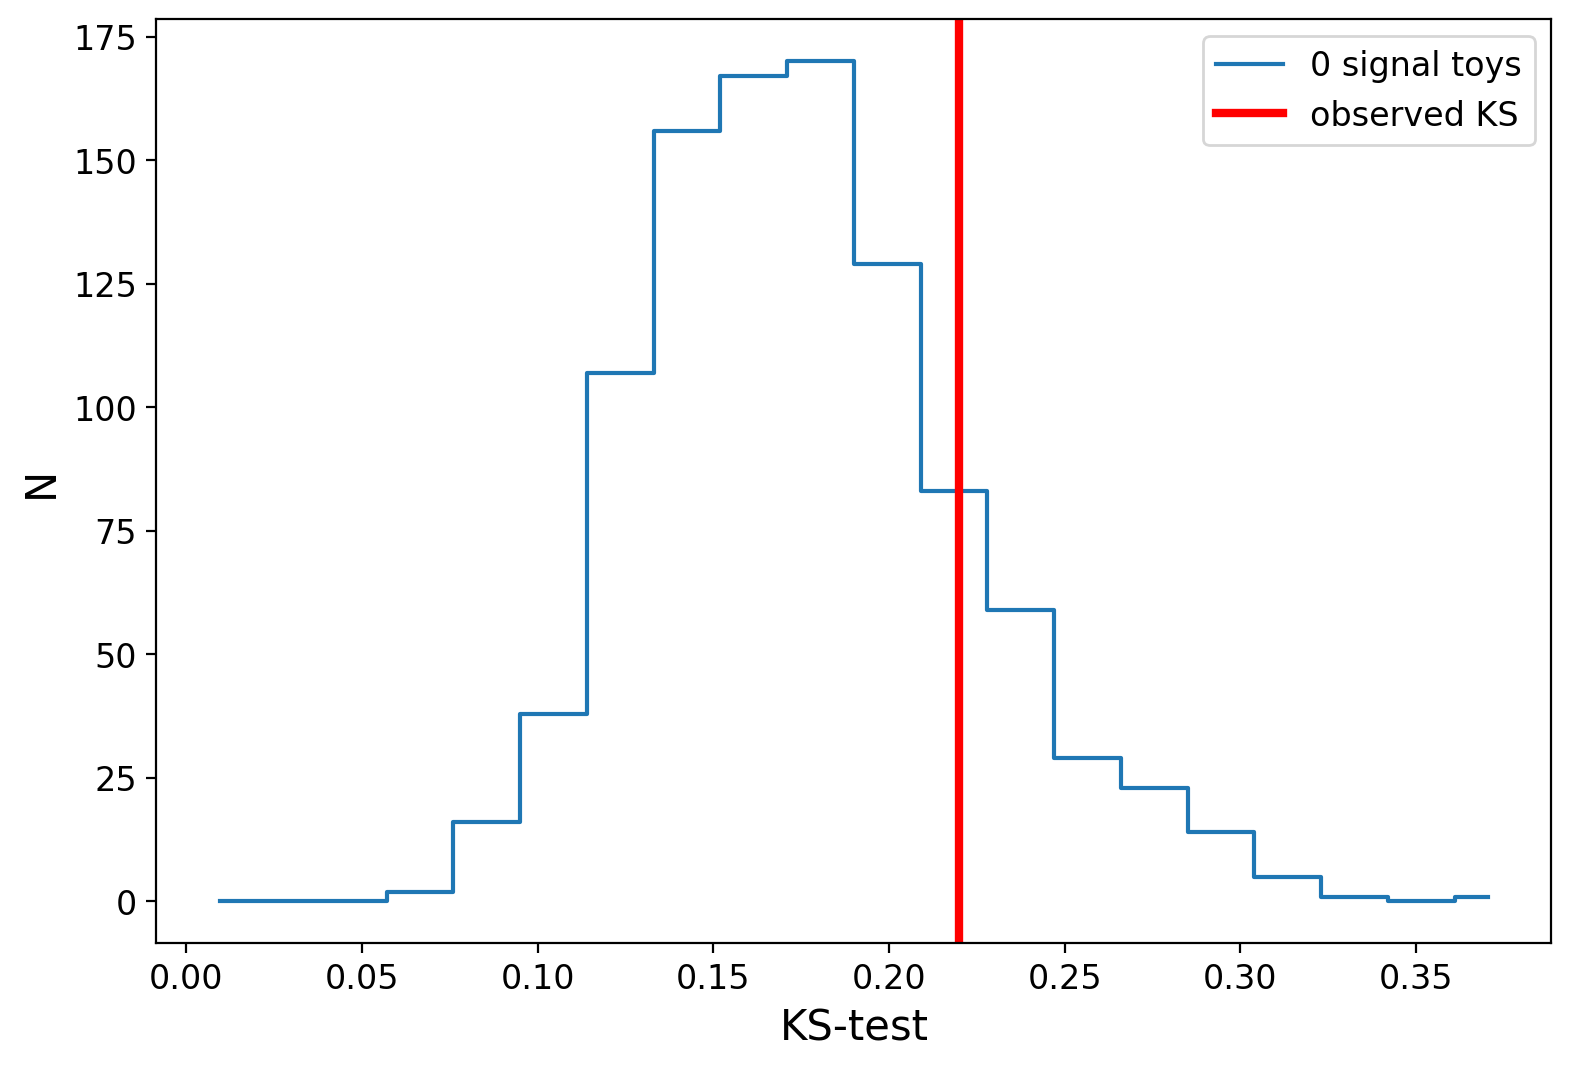

In [5]:
def runToys(iSample,ntoys=1000):
    toyKSArr=np.array([])
    for toy in range(ntoys):
        toySample=np.random.normal(0.,1, 50)
        toyKS=KStest(iSample,toySample)
        toyKSArr = np.append(toyKSArr,toyKS)
    return toyKSArr

def KSProb(iSampleA,iSampleB):
    KSActual = KStest(iSampleA,iSampleB)
    KSToys   = runToys(iSampleA)
    KSProb   = len(KSToys[KSToys > KSActual])/len(KSToys)
    print("KS Probability from Toys :",KSProb)

    maxKS    = np.max([np.max(KSToys),KSActual])
    nKS, bin_edges = np.histogram(KSToys, bins=20,range=(0,maxKS))
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    
    fig, ax = plt.subplots(figsize=(9,6))
    plt.plot(bin_centers,nKS,drawstyle = 'steps-mid',label='0 signal toys')
    ax.axvline(x=KSActual,linewidth=3,c='red',label="observed KS")
    plt.xlabel('KS-test')
    plt.ylabel('N')
    plt.legend()
    plt.show()
    
KSProb(testSamplesA,testSamplesB)

### Challenge question
Compute the ks test for two gaussian sampled distributions each with $\sigma=1$, one with mean $\mu=0$ and the other with mean $\mu=0.2$. 

0.13999999999999996
KS Probability from Toys : 0.736


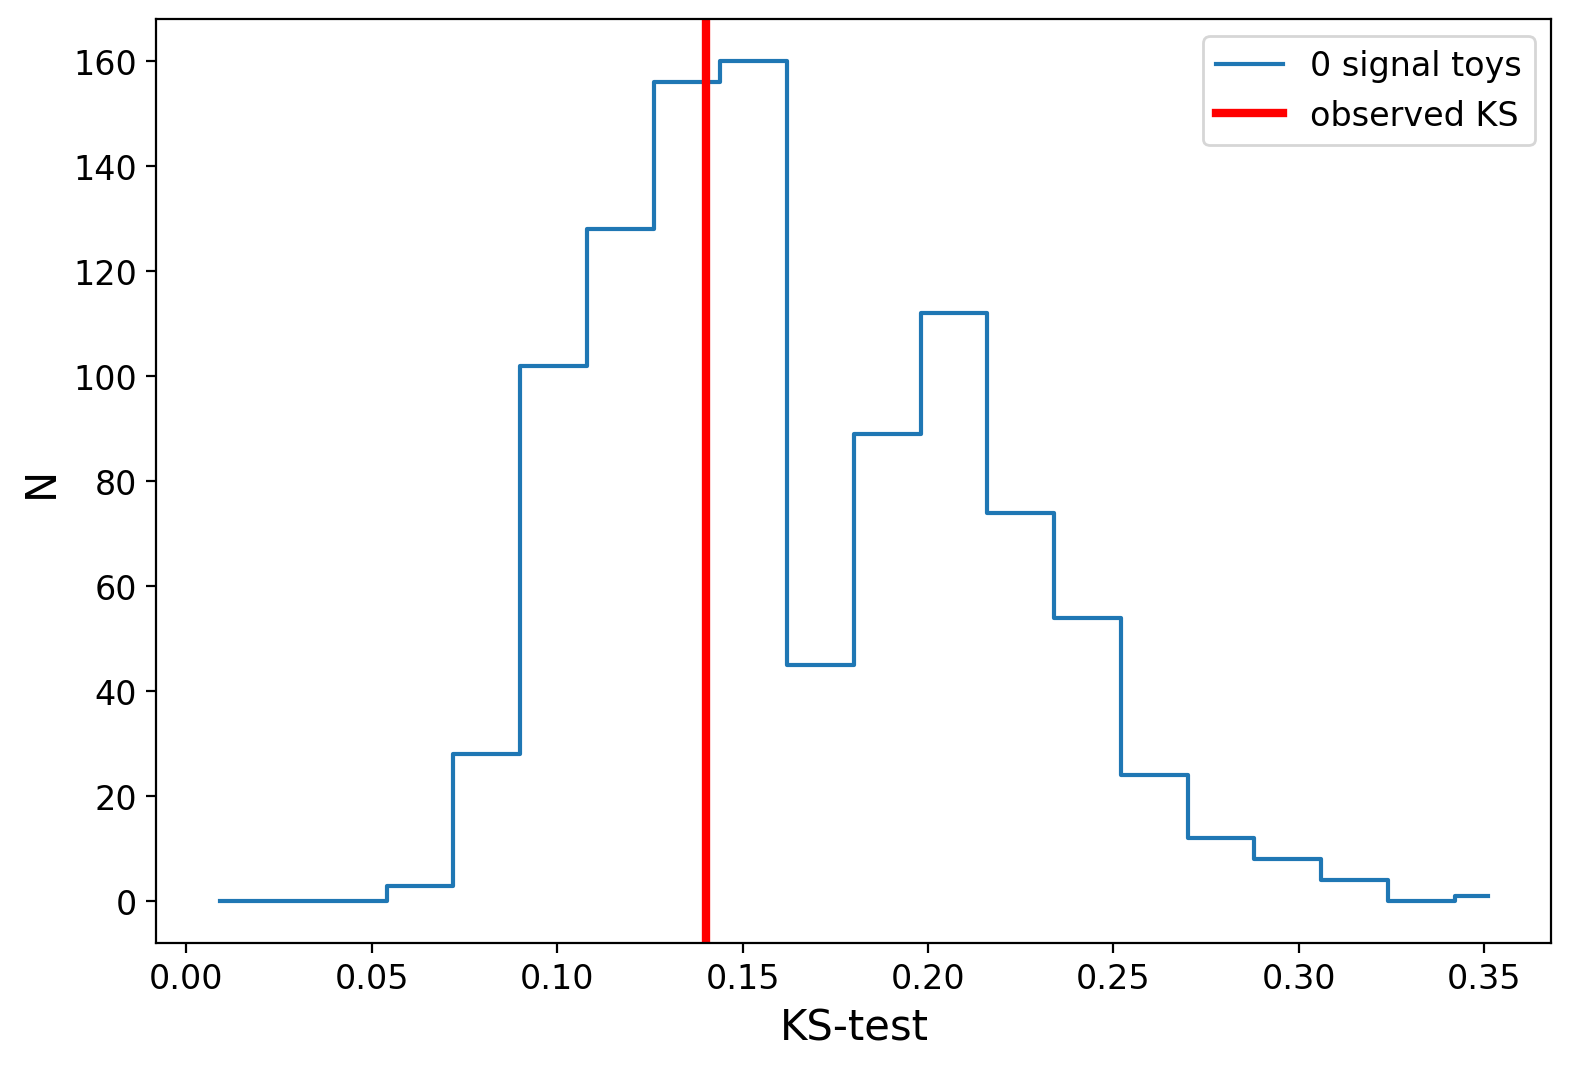

In [6]:
testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)
print(KStest(testSamplesB,testSamplesA))
KSProb(testSamplesA,testSamplesB)

<a name='section_11_1_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.1.1 Maximum Likelihood(Review)</h2>  

Lets say we have a sample that is Gaussian distributed, and we want to find the maximum likelhiood value of the mean and the resolution of this sample. 

For this sample, we can write, the likelhiood and log likelihood as:  

\begin{equation}
\mathcal{L}(x|\mu_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}
\end{equation}

To get get maximum value of $\mu$ we can write: 

\begin{eqnarray}
\frac{\partial}{\partial \mu}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \mu} \left( -\frac{n}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0\\
& = &  \left( \sum_{i=0}^{N} \frac{(x_{i}-\mu)}{\sigma^{2}} \right)  = 0\\
\sum_{i=0}^{N} (x_{i}-\hat{\mu}) & = & 0 \\
\sum_{i=0}^{N} x_{i} - N \hat{\mu} & = & 0 \\
\end{eqnarray}

This gives us a best fit for $\mu$, given by $\hat{\mu}$ of
\begin{eqnarray}
\hat{\mu} & = & \frac{1}{N} \sum_{i=0}^{N} x_{i}
\end{eqnarray}

Now for $\sigma^{2}$, we can do the same thing, and we get (for a best fit $\hat{\sigma}^{2}$:  

\begin{eqnarray}
\frac{\partial}{\partial \sigma^{2}}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \sigma^{2}} \left( -\frac{n}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0 \\
& = & \left( -\frac{n}{2\hat{\sigma}^{2}} +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\hat{\sigma}^{4}} \right) \\
0 & = & \left( -n +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{\hat{\sigma}^{2}}\right) \\
\hat{\sigma}^{2} & = & \frac{1}{n} \sum_{i=0}^{N}(x_{i}-\mu)^2  
\end{eqnarray}
 
Now none of this is a big surprise, the best fit for the mean and variance of a gaussian distribution is the mean and variance. However, this process shows you the thought process that is undergone when trying to construt a maximum likelihood estimator of a sample. 


<a name='section_11_1_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.1.2 Likelihood Ratio</h2>  


The most powerful way to compare two distributions is to compute the likelihood of each, and then take their ratio. By taking the $\log$ of this ratio, we end up with a robust way to define a hypothesis test. 
We define this as 
\begin{eqnarray}
\lambda & = & -2 \log\left(\frac{\mathcal{L_{\rm null}}}{\mathcal{L_{\rm alternative}}}\right) \\
        & = & -2 \log\left(\mathcal{L_{\rm null}}\right) + \log\left(\mathcal{L_{\rm alternative}}\right)  
\end{eqnarray}

This construction is often called the Neyman-Pearson lemma. 

Recall that the likelihood is just the probability of a specific thing happening. The likelihood ratio is just the ratio of the maximum probabilities of two hypotheses. Lets do an analytic example to start with. Imagine you have a set of points $x_{i}$, and you want to test the hypothesis that this sample has mean $\mu_{0}$ vs the alternative hypothesis that the mean is $\neq \mu_{0}$. Lets write out the likelihood for both scenarios. 

**Hypothesis $\mu_{0}$**

The likelihood is just written following the form below as: 
\begin{equation}
\mathcal{L}(\mu_{i}|x_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{0},\sigma_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}
\end{equation}

Now, since we are maximizing all of our parameters except for $\mu$. The parameter $\sigma$ will be maximized to be the optimized value of $\sigma$, we denote $\hat{\sigma}$.

\begin{eqnarray}
\hat{\sigma}_{\mu}^{2} & = & \frac{1}{n} \sum_{i=0}^{N}(x_{i}-\mu_{0})^2  
\end{eqnarray}

which means, we can write the above as
\begin{equation}
\log\left(\mathcal{L}(x|\mu_{0},\sigma_{i}) \right) =  -\frac{n}{2}\left(\log\left(2\pi\hat{\sigma}_{\mu}^{2}\right) + 1\right)
\end{equation}

Finally, one more relation that is useful is that if $\mu_{0}\neq\bar{x}$, we can write this as 

\begin{eqnarray}
\hat{\sigma}_{\mu}^{2} & = & \frac{1}{n} \sum_{i=0}^{N} \left(x_{i} - \bar{x} + \bar{x}-\mu_{0}\right)^{2} \\ 
                 & = & \frac{1}{n} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2} + 2(x_{i} - \bar{x})(\bar{x}-\mu_{0})\right) \\ 
                 & = & \frac{1}{n} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2}\right) \\
                 & = & \hat{\sigma}^{2}_{\mu-\rm{floating}} +  \left(\bar{x}-\mu_{0}\right)^{2}
\end{eqnarray}


**Alternative Hypothesis $\mu\neq\mu_{0}$**

In this scenario, we want to compute the maximum likelihood over *all parameters*, above we fixed $\mu$. This we can write, noting $\hat{\mu}_{max}=\bar{x}$.

\begin{equation}
\mathcal{L}(\mu_{i}\neq\mu_{0}|x_{i},\mu_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\hat{\sigma}^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{0},\hat{\sigma}_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\hat{\sigma}^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}} \\
\log\left(\mathcal{L}(x|\mu_{0},\hat{\sigma}_{i}) \right) =  -\frac{n}{2}\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right)
\end{equation}

The log likelihood ratio for these is 

\begin{eqnarray}
\lambda & = & -n\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right) + n\left(\log\left(2\pi\hat{\sigma}_{\mu}^{2}\right) + 1\right) \\
        & = & n \log\left(\frac{\hat{\sigma}^{2}_{\mu}}{\hat{\sigma}^{2}}\right) \\
        & = & n \log\left(\frac{\hat{\sigma}^{2} +  \left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & = & n \log\left(1+ \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & \approx & n \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^2} 
\end{eqnarray}
Where in the last step, we taylor expanded for small $|\mu_{0}-\bar{x}|$. Incidently, if we had done a $\chi^{2}$ test we would converge on the same thing:
\begin{eqnarray}
\lambda & = & \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{\hat{\sigma}^{2}} - \frac{(x_{i}-\bar{x})^2}{\hat{\sigma}^{2}} \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(x_{i}-\mu_{0}\right)^2 - \left(x_{i}-\bar{x}\right)^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} x^{2}_{i} - x^{2}_{i} - 2 x_{i}\left(\mu_{0}-\bar{x}\right) - \mu_{0}^2 -\bar{x}^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(\mu_{0}-\bar{x}\right)^{2} \\
        & = & \frac{n}{\hat{\sigma}^2} \left(\mu_{0}-\bar{x}\right)^{2}
\end{eqnarray}

For both cases, what we see is that in this scenario, we have that our likelihood ratio is exactly equivalent to a gaussian distribution about $\mu=\bar{x}$, with a variance given by $\hat{\sigma}^2/n$. 

Imagine now we had this for a few bins with mean in each of them given by $\bar{x}_{i}$, if we considered a few different samples (for example bins in a histogram), we can write this by just adding a summation: 
\begin{eqnarray}
\lambda & = & \sum_{i=0}^{N_{\rm bins}} \frac{n_{i}}{\hat{\sigma}_{i}^2} \left(\mu_{i}-\bar{x}_{i}\right)^{2}
\end{eqnarray}

This is very similar to a $\chi^{2}$ test.  More generally, this is a sum of gaussian variables $\mu_{i}$, which means that the variation of the log likelihood is going to follow a $\chi_{\nu}$ distribution with $\nu=N_{\rm bins}$ as the number of degrees of freedom. 

### Wilk's theorem
This yields Wilk's theorem again, which says that the likelihood ratio $\lambda\rightarrow\chi_{\nu}$ in the limit of $n\rightarrow\infty$. 

Let's show Wilk's theorem

18.337821574339443


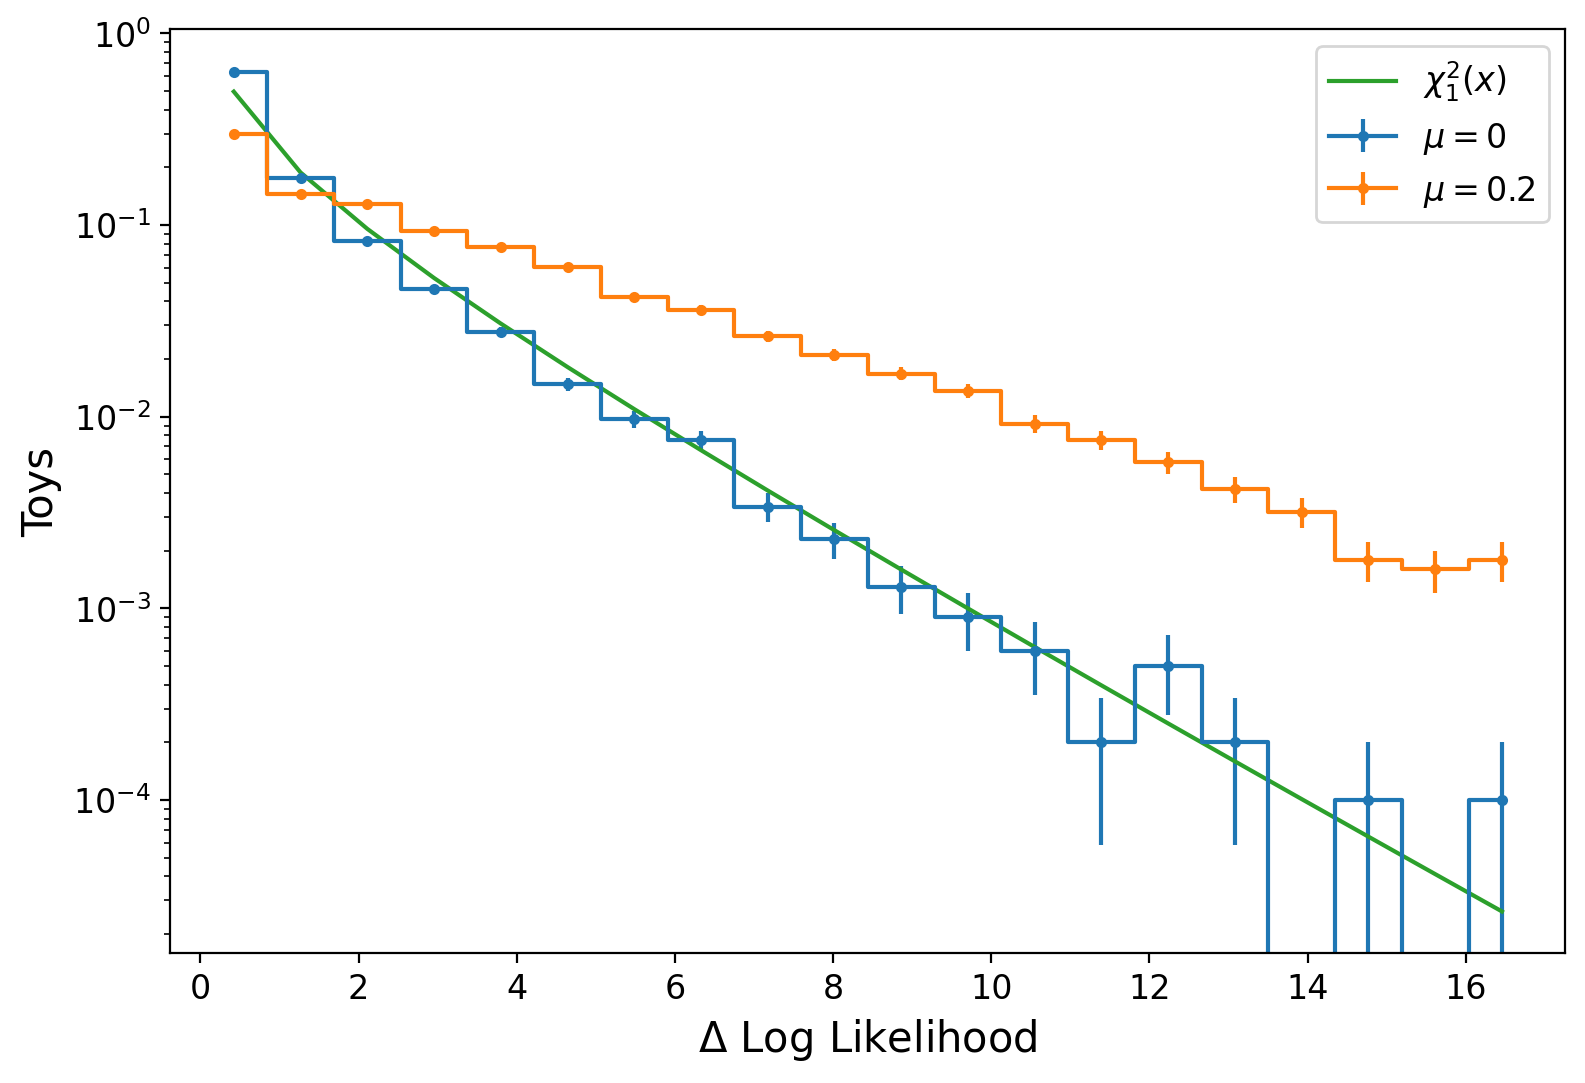

In [11]:
#Now lets run a simulation to see if Wilk's theorem is true
#Lets define the log likelihood is the simplest way possible (assume we don't know math)
#note we will use -1 to compute these on the fly
def loglikelihoodGaus(isample,mu0=-1,sigma0=-1):
    n=len(isample)
    if mu0 == -1:
        mu0=isample.mean()
    if sigma0 == -1:
        sigmahat2=(isample-mu0)**2/len(isample)
        sigmahat2=sum(sigmahat2)
    val=-n/2*(np.log(2*np.pi*sigmahat2)+1)
    return val

hypoth=loglikelihoodGaus(testSamplesB,0) #compute with a fixed mean of 0
null  =loglikelihoodGaus(testSamplesB) #compute with mean floating
val=-2*(hypoth-null)
print(val)

def sampleGaus(iMean,iNToy=10000):
    ntoys=iNToy
    deltaLL=[]
    for i0 in range(ntoys):
        testsamples1 = np.random.normal(iMean,1, 50)
        hypoth=loglikelihoodGaus(testsamples1,0) #compute with a fixed mean of 0
        null  =loglikelihoodGaus(testsamples1) #compute with mean floating
        val=hypoth-null
        deltaLL.append(-2*val)
    return deltaLL

deltaLL1 = sampleGaus(0)
deltaLL2 = sampleGaus(0.2)
    
y1, bin_edges = np.histogram(deltaLL1, bins=20)
y2, bin_edges = np.histogram(deltaLL2, bins=bin_edges)

#Now plot a chi2 with 1 dof
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
chi2 = []
for x in bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 1)
    chi2.append(chi2val)

#And Draw
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
plt.errorbar(bin_centers,y1/len(deltaLL1),yerr=y1**0.5/len(deltaLL1),marker='.',drawstyle = 'steps-mid',label='$\mu=0$')
plt.errorbar(bin_centers,y2/len(deltaLL2),yerr=y2**0.5/len(deltaLL2),marker='.',drawstyle = 'steps-mid',label='$\mu=0.2$')
plt.plot(bin_centers,chi2,label='$\chi^{2}_{1}(x)$')
plt.xlabel("$\Delta$ Log Likelihood")
plt.ylabel("Toys")
ax.set_yscale('log')
plt.legend()
plt.show()


Now lets consider doing our test with a more realistic example. What if we want to quote the significance of an excess on top of data. Lets take a look at what this would look like. Lets make some toy datat with an excess on top of it. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


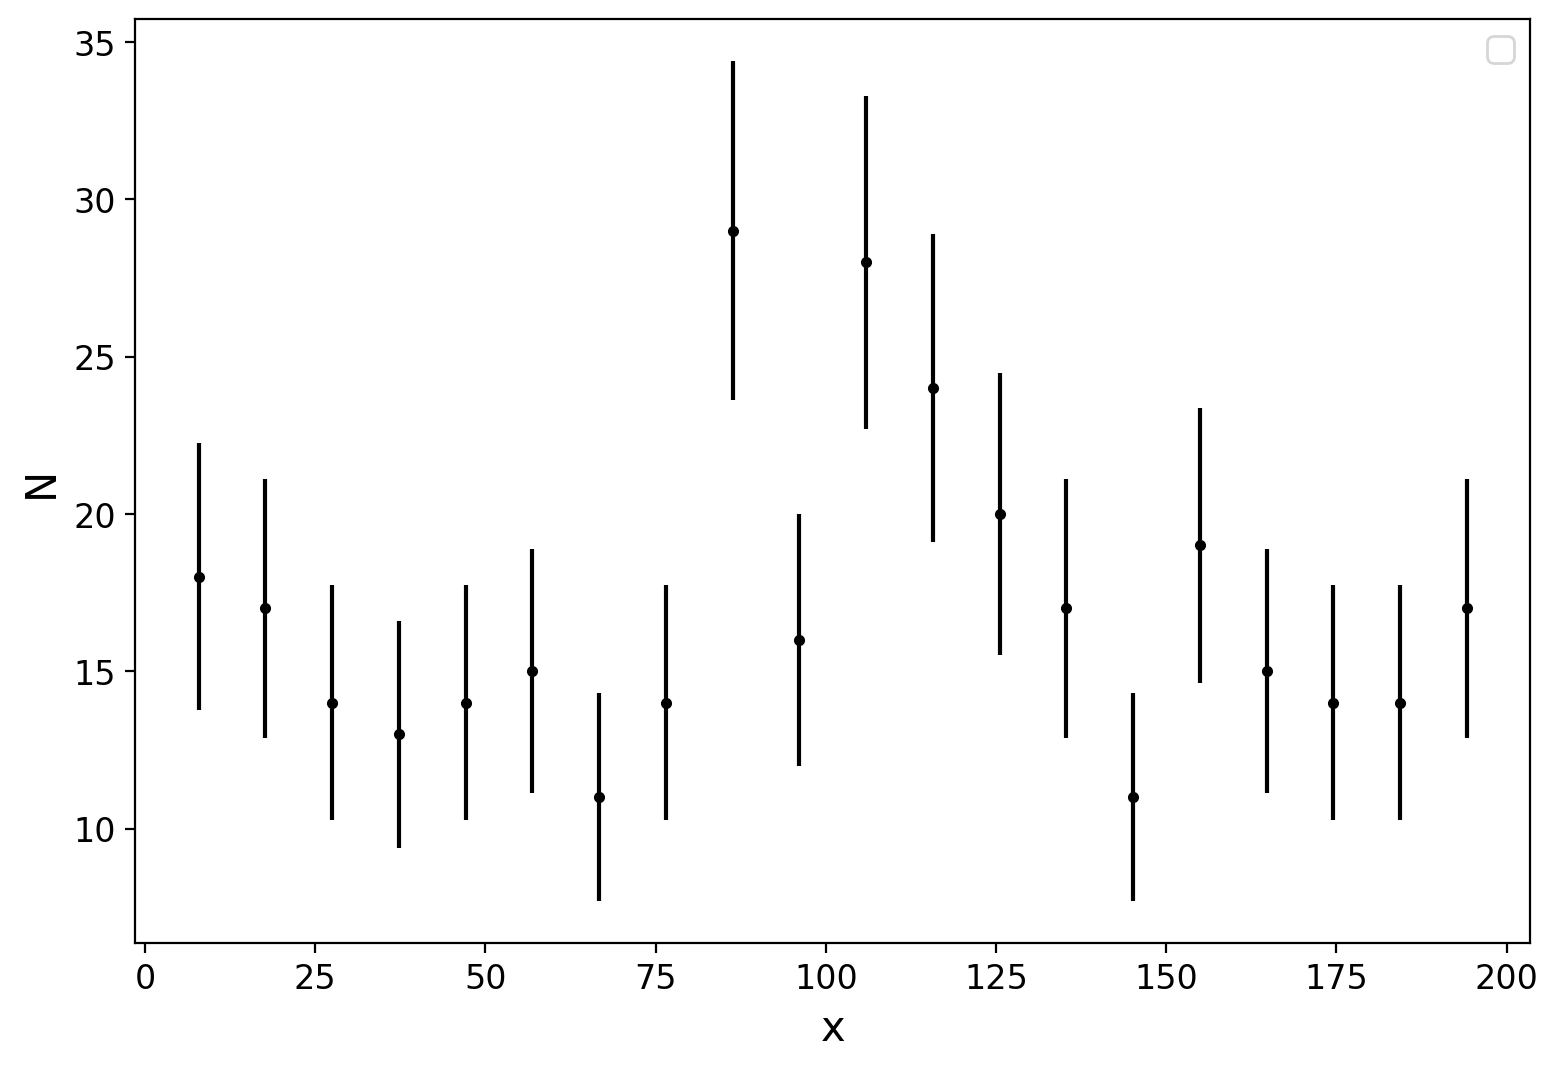

In [20]:
#First lets make a data sample and fit it
bkg = np.random.uniform(0,200, 300)
sig = np.random.normal (100,15,40)
data = np.append(sig,bkg)
y, bin_edges = np.histogram(data, bins=20)
ys, bin_edges = np.histogram(sig, bins=bin_edges)
yb, bin_edges = np.histogram(bkg, bins=bin_edges)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, y,yerr= y**0.5,marker='.',linestyle = 'None', color = 'black')
#plt.errorbar(bin_centers,yb,yerr=ys**0.5,marker='.',linestyle = '-', color = 'red',label='bkg')
#plt.errorbar(bin_centers,ys,yerr=yb**0.5,marker='.',linestyle = '-', color = 'blue',label='signal')
plt.xlabel("x")
plt.ylabel("N")
plt.legend()
plt.show()

Let's try to fitting our bump distribution. For this, we can define the two fit functions:

**Null hypothesis** Our fit function is just a flat constant with a gaussian signal on top.
\begin{equation}
f(x|C) = C 
\end{equation}

**Alternative hypothesis** Our fit function is just a flat constant
\begin{equation}
f(x|C,\mu\,\sigma) = C + \mathcal{N}(x,\mu,\sigma)
\end{equation}

For each of these we can define the likelihood by summing over our $N$ bins with value $x_{i}$ and number of events $y_{i}$ and treating each bin as a separate gaussian with uncertainty given by the $\sigma_{i}=\sqrt{y_{i}}$. We can write this as

\begin{eqnarray}
 \mathcal{L}(\theta_{i} | x_{i},y_{i}) & = & \prod_{i=0}^{N}\frac{1}{\sqrt{2\pi\sigma_{i}^{2}}}\exp\left(-\sum_{i=0}^{N} \frac{(y_{i}-f(x_{i})^2}{2\sigma_{i}^{2}}\right) \\
 \log\left(\mathcal{L}(\theta_{i} | x_{i},y_{i})\right) & = &  -\sum_{i=0}^{n}\log\left(2\pi\sigma_{i}^{2}\right) - \sum_{i=0}^{N} \frac{(y_{i}-f(x_{i}|\theta_{i}))^2}{2\sigma_{i}^{2}}
\end{eqnarray}

Our liklihood ratio is then just the difference where we replace $f(x)$ with the appropriate hypothesis. Lets write this all out in lmfit and do it. 


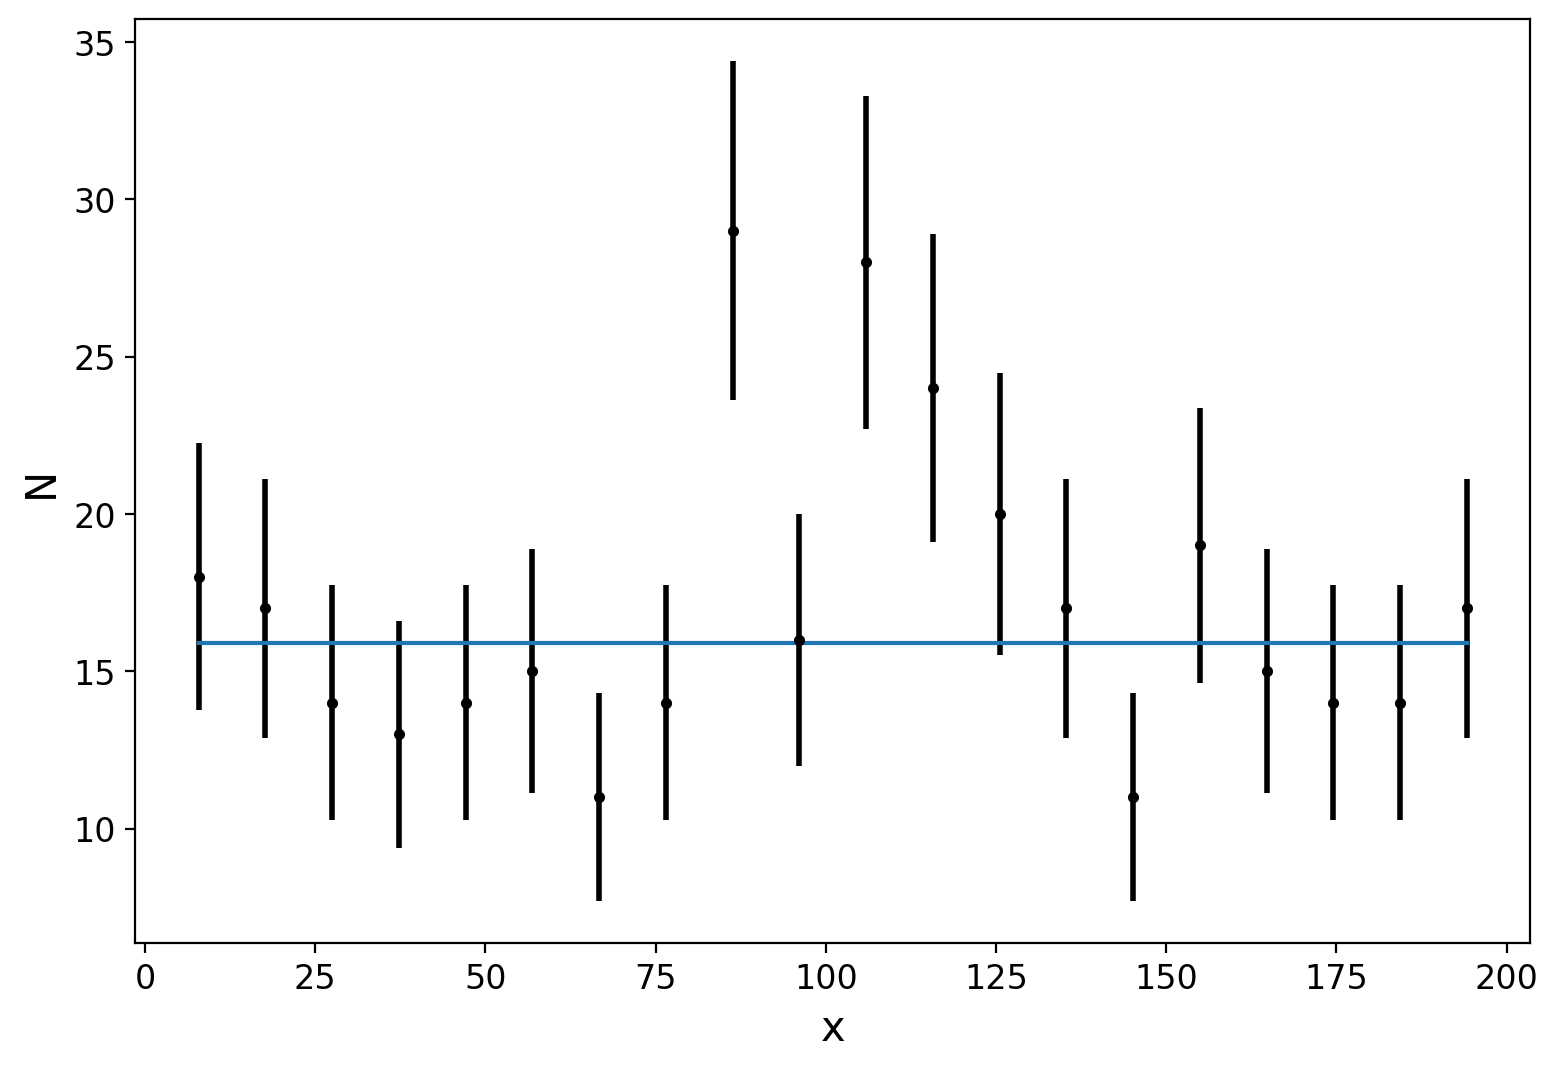

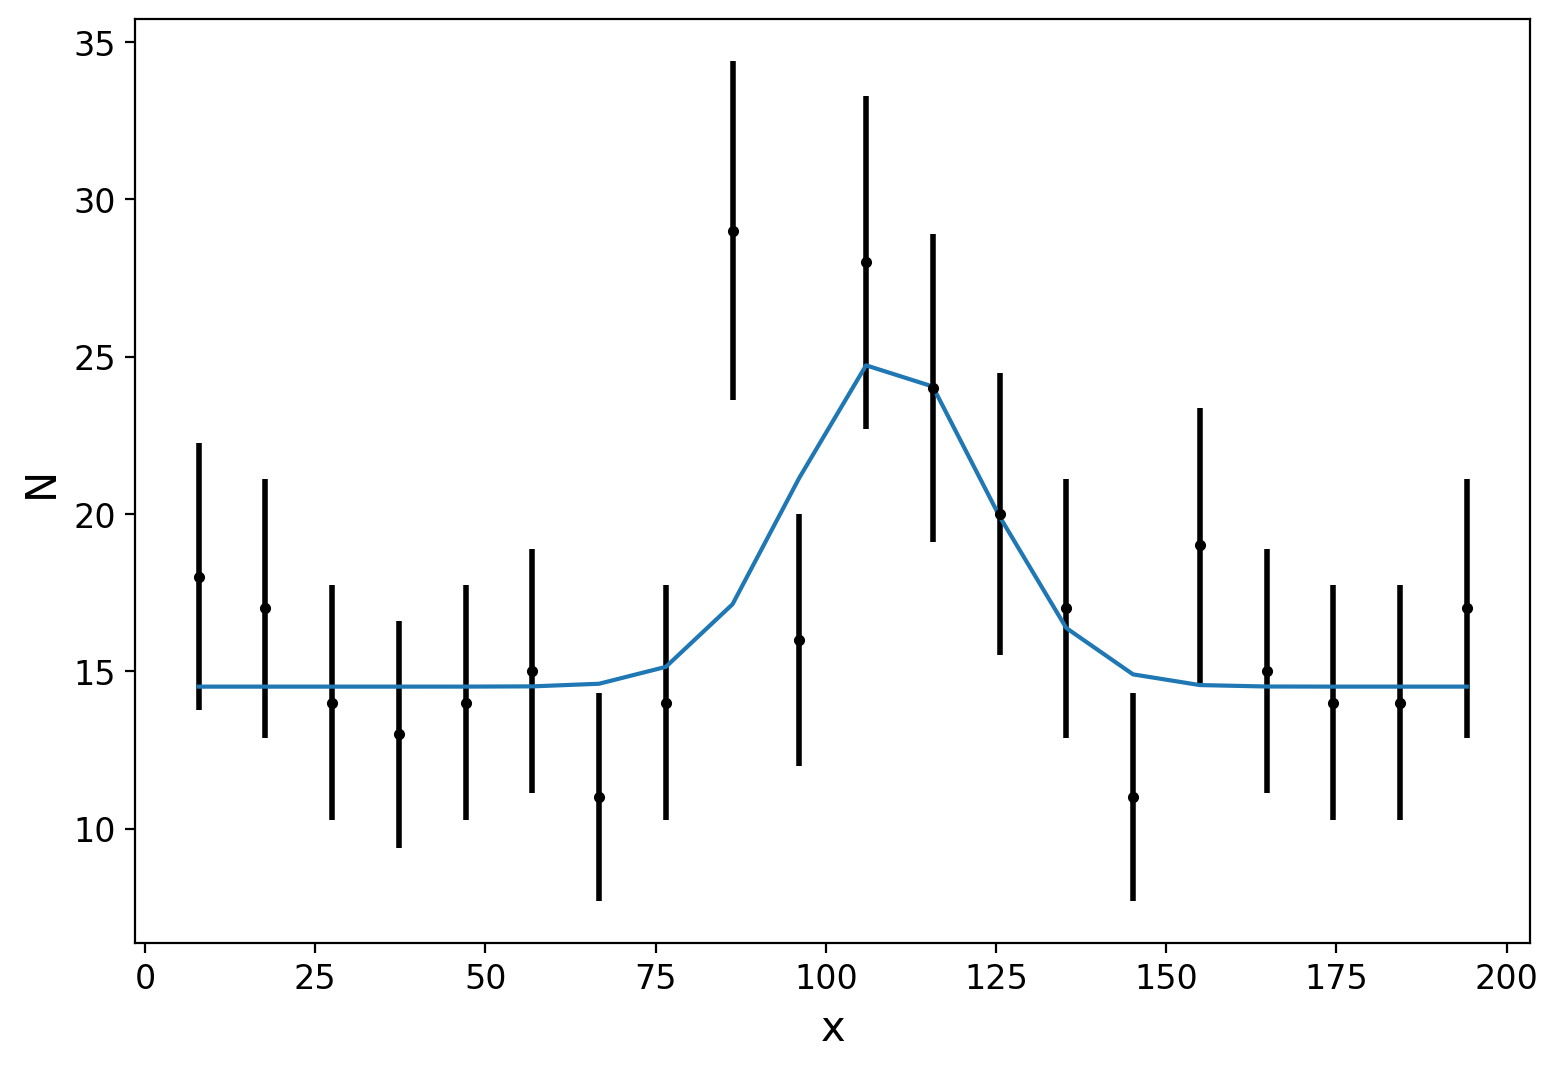

Delta negative Log Likelihood: 4.897103429988704


In [25]:
from scipy.stats import norm
import lmfit

def fNull(params,x):
    return params["c"]*(x+1)/(x+1) #hack to output array

def fAlt(params,x):
    val = norm.pdf(x,params["mu"],params["sigma"])
    return params["amp"]*val + params["c"]

def binnedNegLikelihood(params, x, ydata, weights, func):
    y_model= func(params,x)
    residarr = np.sqrt(((y_model - ydata)/(2*weights))**2 + np.log(2*np.pi*weights**2))
    return residarr

def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    result = lmfit.minimize(binnedNegLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it. 
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    NLLNull=fitData(x,y,fNull,iPlot)
    NLLAlt=fitData(x,y,fAlt,iPlot)
    return 2.*(np.sum(NLLNull*NLLNull)-np.sum(NLLAlt*NLLAlt))

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative Log Likelihood:",NLL)

Ok, so we got a big delta log likelihood. However, what is the significance of this? 

Well, this is where we can invoke Wilks' therorem. $\Delta \log(\mathcal{L})$ will be $\chi^{2}$ distributed if the null and alternative hypothesed are the same. In this case, the $\chi^{2}$ distribution will be with $n_{\rm params~Null}-n_{\rm params~Alt}$ degrees of freedom. For this case its $3$ (ie the 3 gaussian parameters. 

To see what this would look like if we just fit background, lets run the above computation for 1000 toys of just background data. 

Toy: 0  of  250
Toy: 50  of  250
Toy: 100  of  250
Toy: 150  of  250
Toy: 200  of  250
Significance with 3 floating 0.8205113343282276


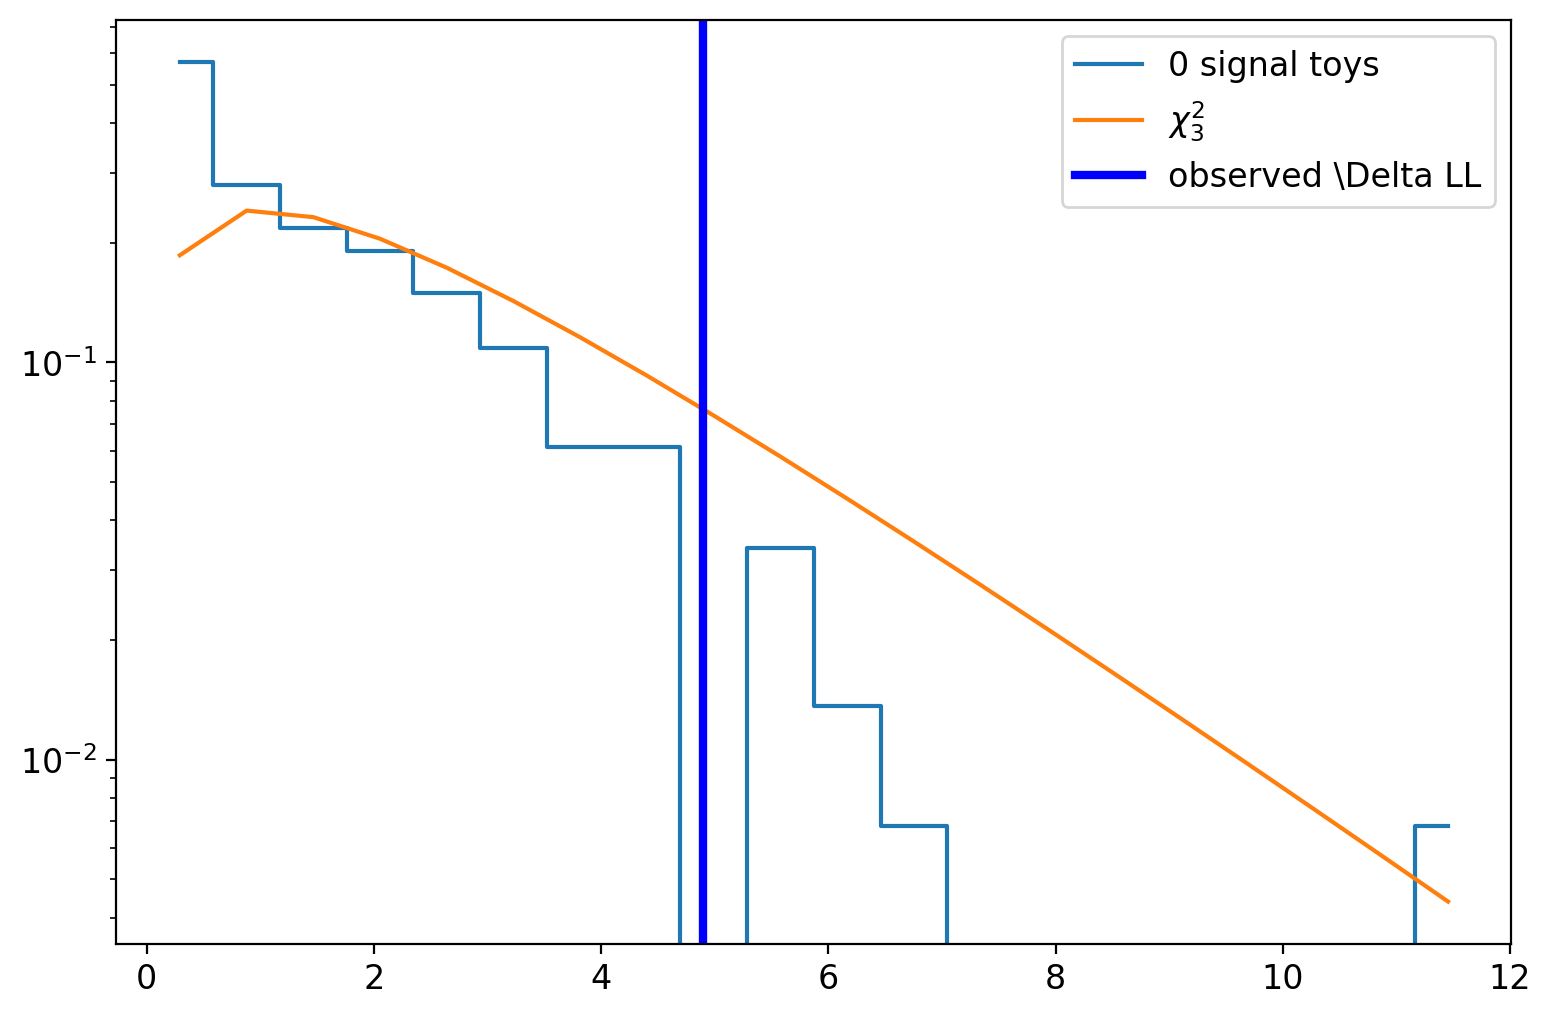

In [26]:
def toyNLL(iNEvents,iNToys,iBin_Edges):
    deltaNLLArr=np.array([])
    for i0 in range(iNToys):
        if i0 % 50 == 0:
            print("Toy:",i0," of ",iNToys)
        bkg = np.random.uniform(0,200, iNEvents)
        y, bin_edges = np.histogram(bkg, bins=iBin_Edges)
        x = 0.5*(bin_edges[1:] + bin_edges[:-1])
        nll = deltaNLL(x,y)
        deltaNLLArr=np.append(deltaNLLArr,nll)
    return deltaNLLArr

NLL1 = toyNLL(300,250,bin_edges)
ll1, ll_bin_edges = np.histogram(NLL1, bins=20,density=True)
ll_bin_centers = 0.5*(ll_bin_edges[1:] + ll_bin_edges[:-1])
chi21 = np.array([])
for x in ll_bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 3) #len is to normalize
    chi21 = np.append(chi21,chi2val)

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(ll_bin_centers,ll1,drawstyle = 'steps-mid',label='0 signal toys')
plt.plot(ll_bin_centers,chi21,label='$\chi^{2}_{3}$')
ax.axvline(x=NLL,linewidth=3,c='b',label="observed \Delta LL")
print("Significance with 3 floating",stats.chi2.cdf(NLL,3))
plt.legend()
plt.yscale('log')
plt.show()



In [27]:
print("Significance with 3 floating",stats.chi2.cdf(NLL,3),stats.norm.ppf(0.866748583192874))

Significance with 3 floating 0.8205113343282276 1.1111522198812382


### challenge question

Run the fit toys for the above distribution, fixing the mass of the gaussian in the fit. What $\chi^{2}$ distribution is run? 

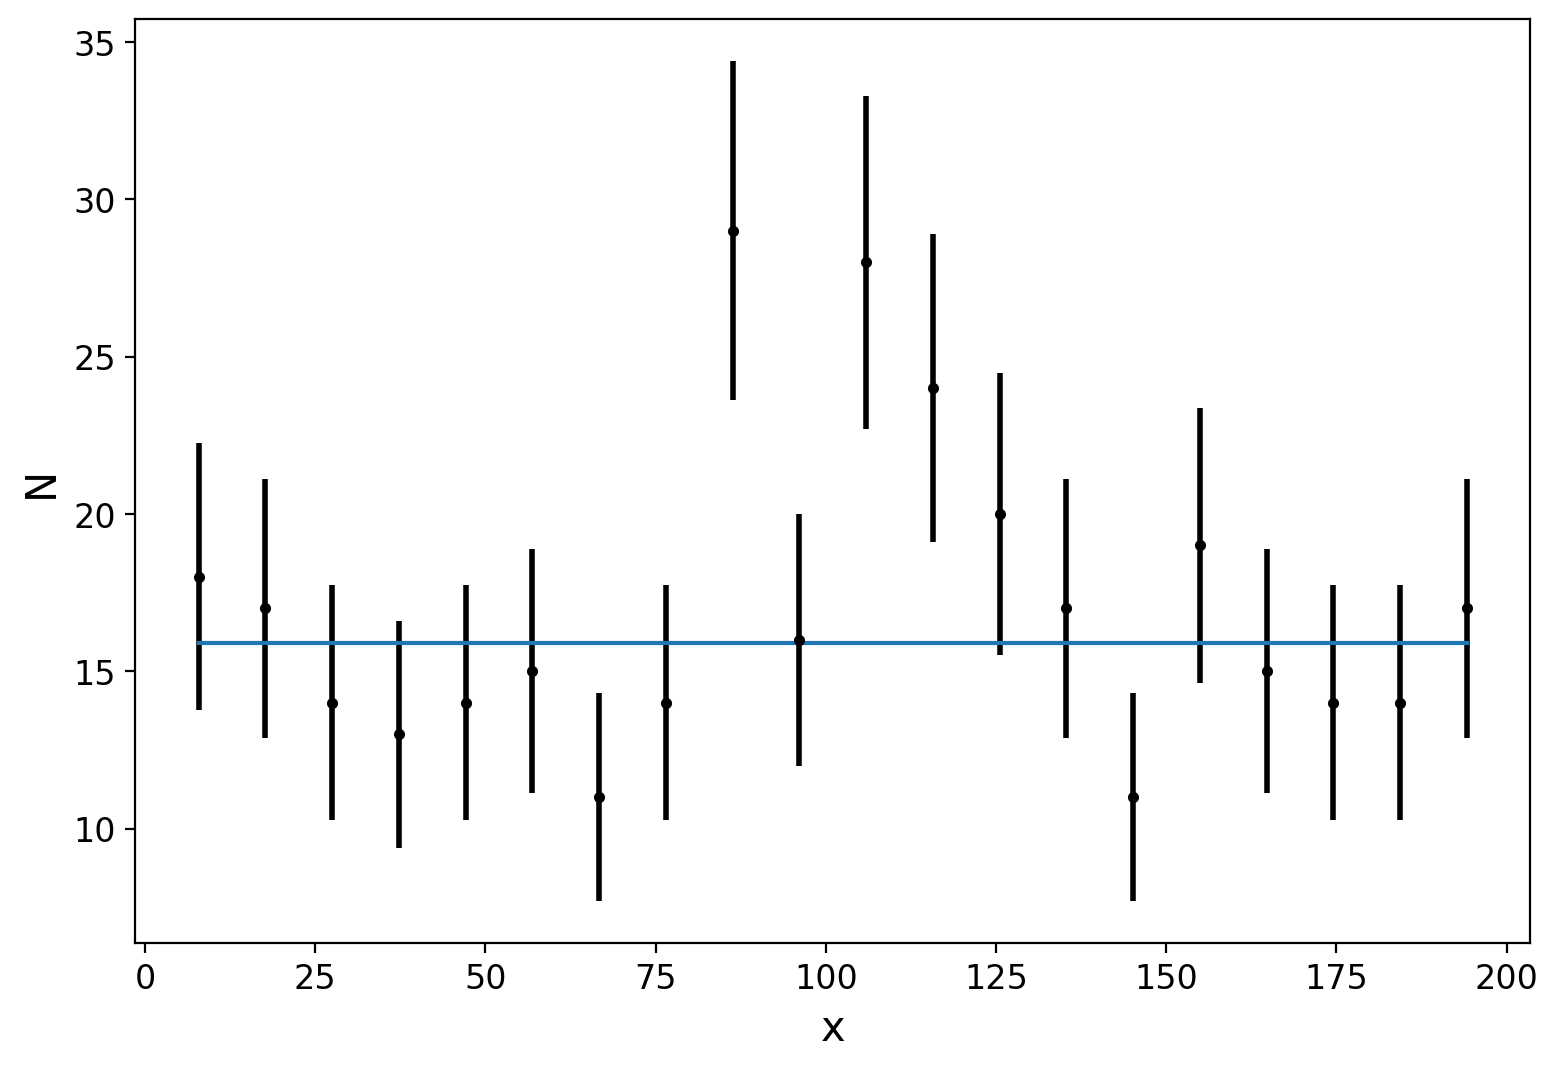

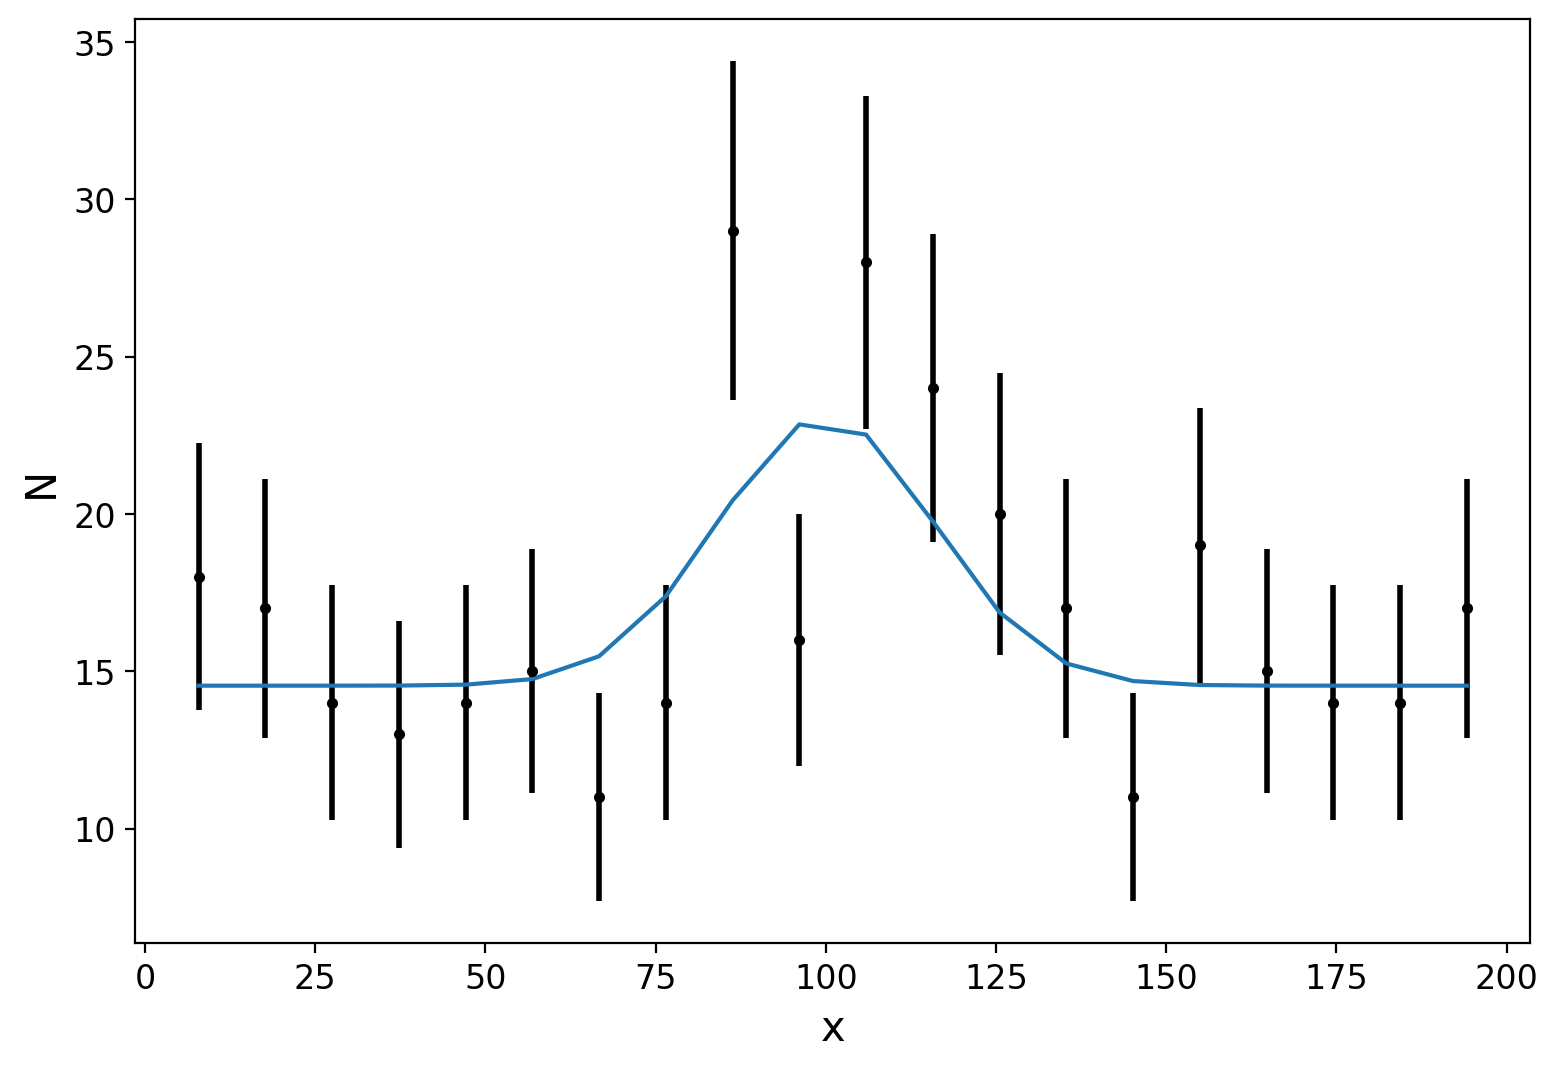

Delta negative Log Likelihood: -3.7835406875657895
Our Probability of this happening 1.0


In [28]:
def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params["mu"].vary = False
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it. 
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative Log Likelihood:",NLL)
stats.chi2.pdf(x, 3)

probability = 1-stats.chi2.cdf(NLL, 2)
print("Our Probability of this happening",probability)

Toy: 0  of  500
Toy: 50  of  500
Toy: 100  of  500
Toy: 150  of  500
Toy: 200  of  500
Toy: 250  of  500
Toy: 300  of  500
Toy: 350  of  500
Toy: 400  of  500
Toy: 450  of  500
Significance with 2 floating 0.0


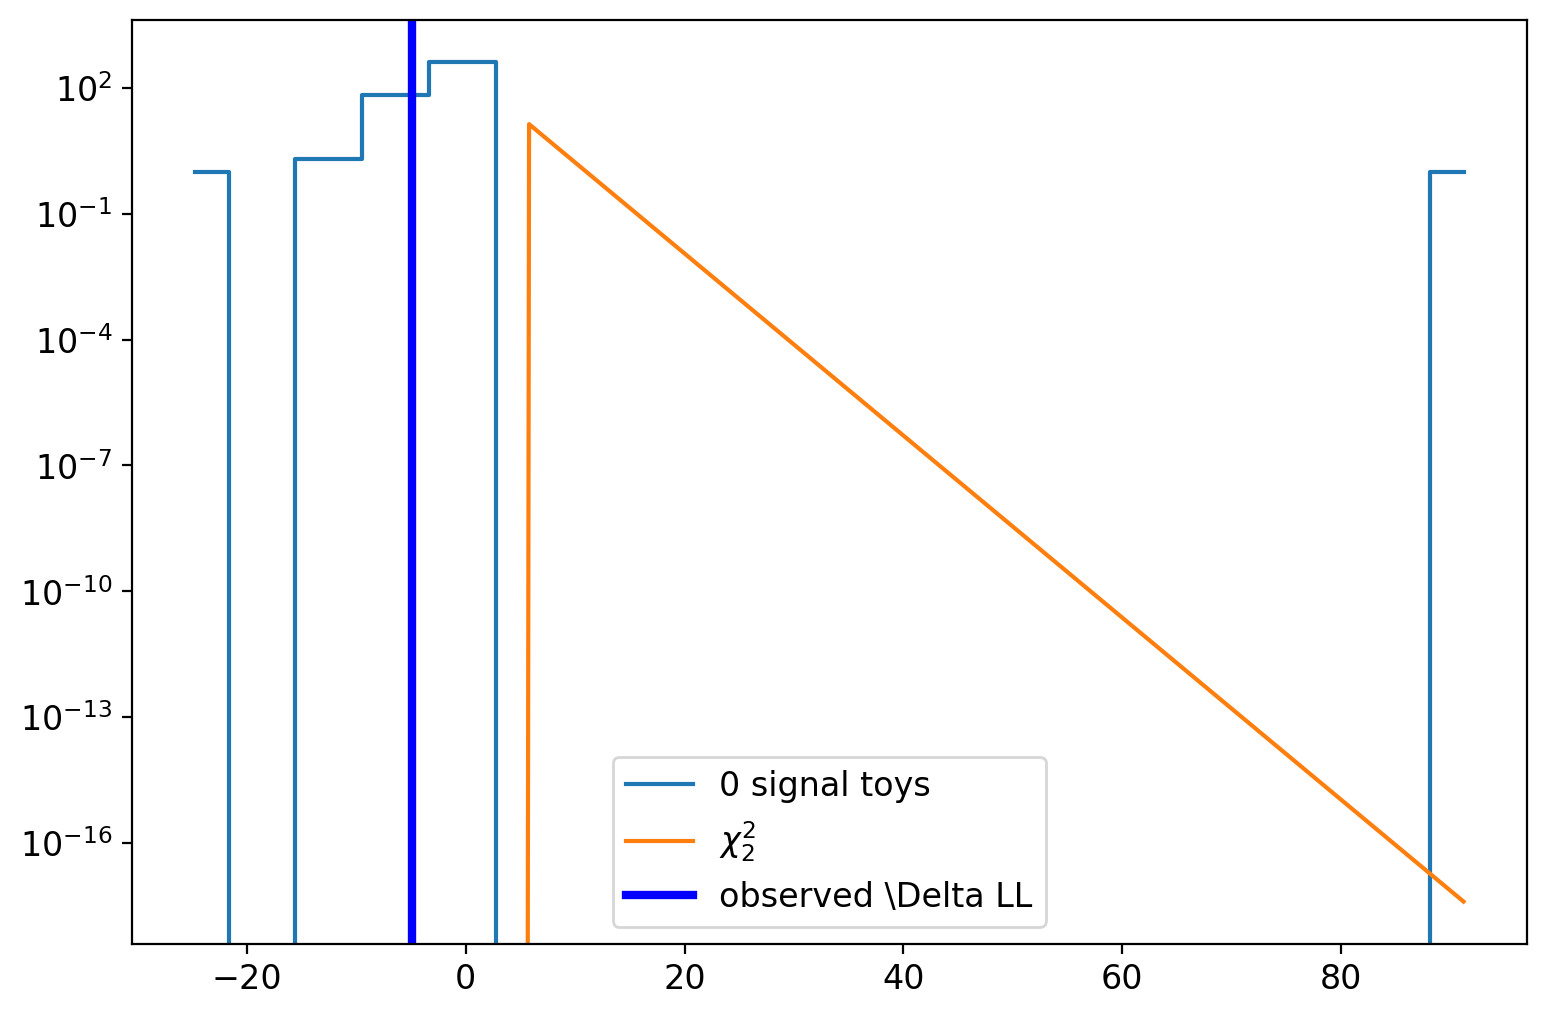

In [29]:
#answer
def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params['mu'].vary = True    ###############!!!! this is what we fix
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    return result.residual

NLL = deltaNLL(x,y,True)
NLL1 = toyNLL(300,500,bin_edges)
ll1, ll_bin_edges = np.histogram(NLL1, bins=20)
ll_bin_centers = 0.5*(ll_bin_edges[1:] + ll_bin_edges[:-1])
chi21 = np.array([])
for x in ll_bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 2)*len(NLL1) #len is to normalize
    chi21 = np.append(chi21,chi2val)

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(ll_bin_centers,ll1,drawstyle = 'steps-mid',label='0 signal toys')
plt.plot(ll_bin_centers,chi21,label='$\chi^{2}_{2}$')
ax.axvline(x=NLL,linewidth=3,c='b',label="observed \Delta LL")
print("Significance with 2 floating",stats.chi2.cdf(NLL,2))
plt.legend()
plt.yscale('log')


<a name='section_11_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.3 The f-test(Chow-test)</h2>  



In the interest of generalizing the t-test, the statistician Ronald Fisher developed the [f-test](https://en.wikipedia.org/wiki/F-test). This is really a generalization of t-test. This has become very useful in physics due to the work of Gregory Chow at MIT in the late 1950s. At that time, he developed the Chow test aimed at trying to come up with a way for how well a fit is behaving. To undersand the chow-test lets delve into the the f-test. 

The f-test is used when you want to compare a few distributions with each other. Imagine for example you have $N$ groups of data, each with $m$ points. If these samples are all from a Gaussian distribution of mean $\mu$ and variance $\sigma^{2}$, ie $\mathcal{N}(x,\mu,\sigma)$. Then we can define a new statistic defined conceptually as 
\begin{equation}
 f = \frac{\rm variance~across~samples}{\rm variance~within~each~sample}  
\end{equation}
which should be close to 1 if the samples are all from the same underlying distribution, but it should not be 1 if the samples are from different distributions. 

Lets say we have two distributions $a$ and $b$ each with number of degrees of freedom given by $n_{a}$ and $n_{b}$, we can then write the f-distribution as the ratio of their variances: 
\begin{equation}
 f = \frac{\frac{S^{2}_{a}}{n_{a}} }{ \frac{S^{2}_{b}}{n_{b}} }\\
\end{equation}

More generally, we can write the f-statistic as the variance of distinct samples over the average variance over the individual samples. For a total amount of $N$ samples with $K$ groups, each with $n_{i}$ events within and mean $\bar{x}_{i}$, we can write the f-statistic as 
\begin{equation}
 \sigma^{2}_{\rm group} = \frac{1}{K-1}\sum_{i=1}^{K} n_{i} \left(\bar{x}_{i}-\bar{x}\right)^2 \\
 \sigma^2 = \frac{1}{N-K}\sum_{i=1}^{K}\sum_{j=1}^{n_{i}}\left(x_{ij}-\bar{x}_{i}\right)^{2}\\ 
 f = \frac{  \sigma^{2}_{\rm group} }{\sigma^{2}}
\end{equation}
The idea is that the numerator and denominator are both $\chi^{2}$ distributed variables with $K-1$ degrees of freedom on top, and $N-K$ degrees of freedom on the bottom. This statistic is most powerful for checking if the variances are consistent with being from the same distribution or a different distribution. 

From the above formulas, it has been derived that the f-statistic follows [$f$-distribution](https://en.wikipedia.org/wiki/F-distribution), which has a very complex form that we will write here once for posterity. 
\begin{equation}
f(x,d_{1}=K-1,d_{2}=N-K) = \frac{1}{\beta\left(\frac{d_{1}}{2},\frac{d_{2}}{2}\right)}\left(\frac{d_{1}}{d_{2}}\right)^{\frac{d_{1}}{2}}x^{\frac{d_{1}}{2}-1}\left(1+\frac{d_{1}}{d_{2}}x\right)^{-\frac{d_{1}+d_{2}}{2}}\\
\end{equation}
where $\beta(x,y)$ is the [$\beta$-function](https://en.wikipedia.org/wiki/Beta_function).

So why do we care about the f-test? 

Recall, that to get a good fit you want the fit residuals to look like a gaussian distribution. Unfortunately, its often that case that the fit residuals are not gaussian. Lets say you fit a line to a distribution, and the fit is not good. 

Well then you can try fitting a more complicated function, how about a quadratic. The residuals seem better. 

What about a 3rd order polynomial? 

When do we know where to stop. That is where the f-statistic can help us. The idea is that we can compare the fit residuals from each function. If the fit residual ratio has a high likeilhood given an f-distribution, then we know that the additional polynomial is not needed. 

More generally, the f-distribution tells you how do you tell that fit is better? One ways is to see if the $\chi^{2}$ is better, but what if the $\chi^{2}$ is approximately the same? Moreover what if your $\chi^{2}$ was originally good, but not gaussian. Comparing the residuals of the two fits, can tell us if our new fit function is actually better. The f-test helps us quantify this. 


Well lets say we want to compare the variance of two fits. 
If they variances are from the same underlying distribution they will follow the f-statistic. This comes up when we are trying to figure out if our fit is actually working. 

To do that, lets try to fit some Higgs boson data, lets load 2011, Higgs boson to two photons. First lets look at the data. 


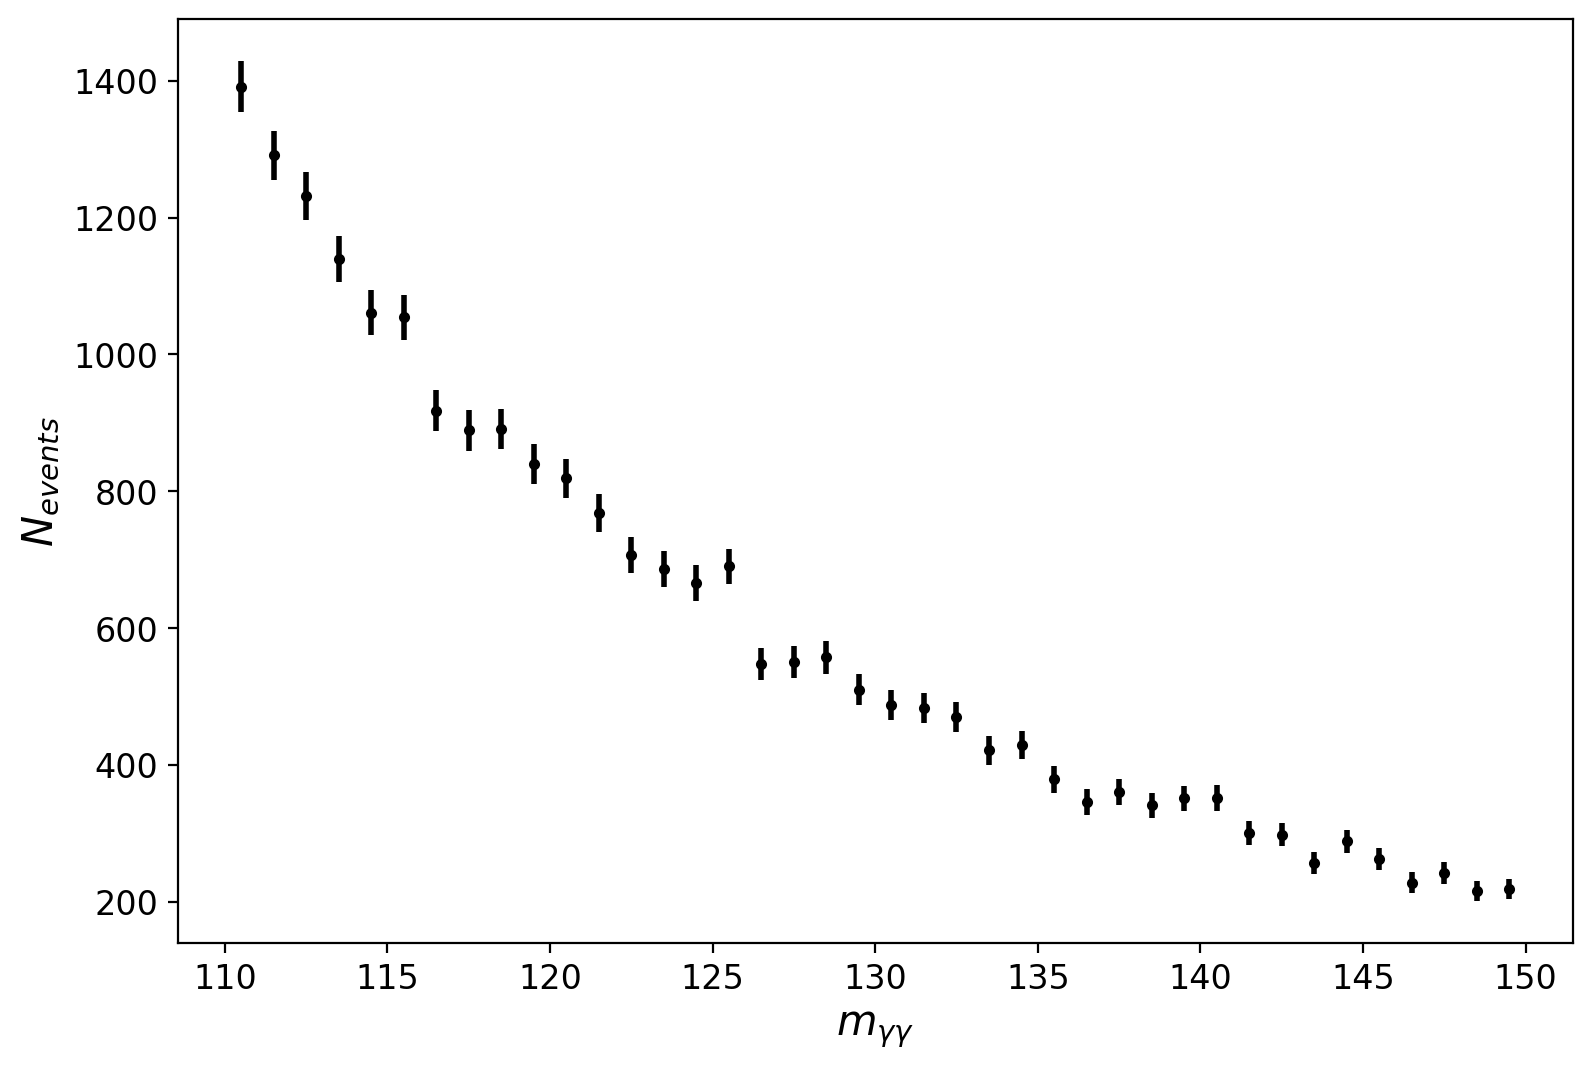

In [30]:
import numpy as np
import csv
import matplotlib.pyplot as plt

#Lets fit a bunch of polynomails with lmfit
x = []
y = []
y_err = []
label='data/out5.txt'
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        if float(row[1]) > 150 or float(row[1]) < 110:
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        #add poisson uncertainties                                                                                                 
        y_err.append(np.sqrt(float(row[2])))

weights = np.linspace(0.,len(y),num=len(y))
for i0 in range(len(y)):
    weights[i0] = float(1./y_err[i0])

#Now we plot it. 
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0)
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.show()

Ok, this is a falling distribution, its not obvious what to fit this with. Lets just fit it with a bunch of polynomial functions, and see how it works. 

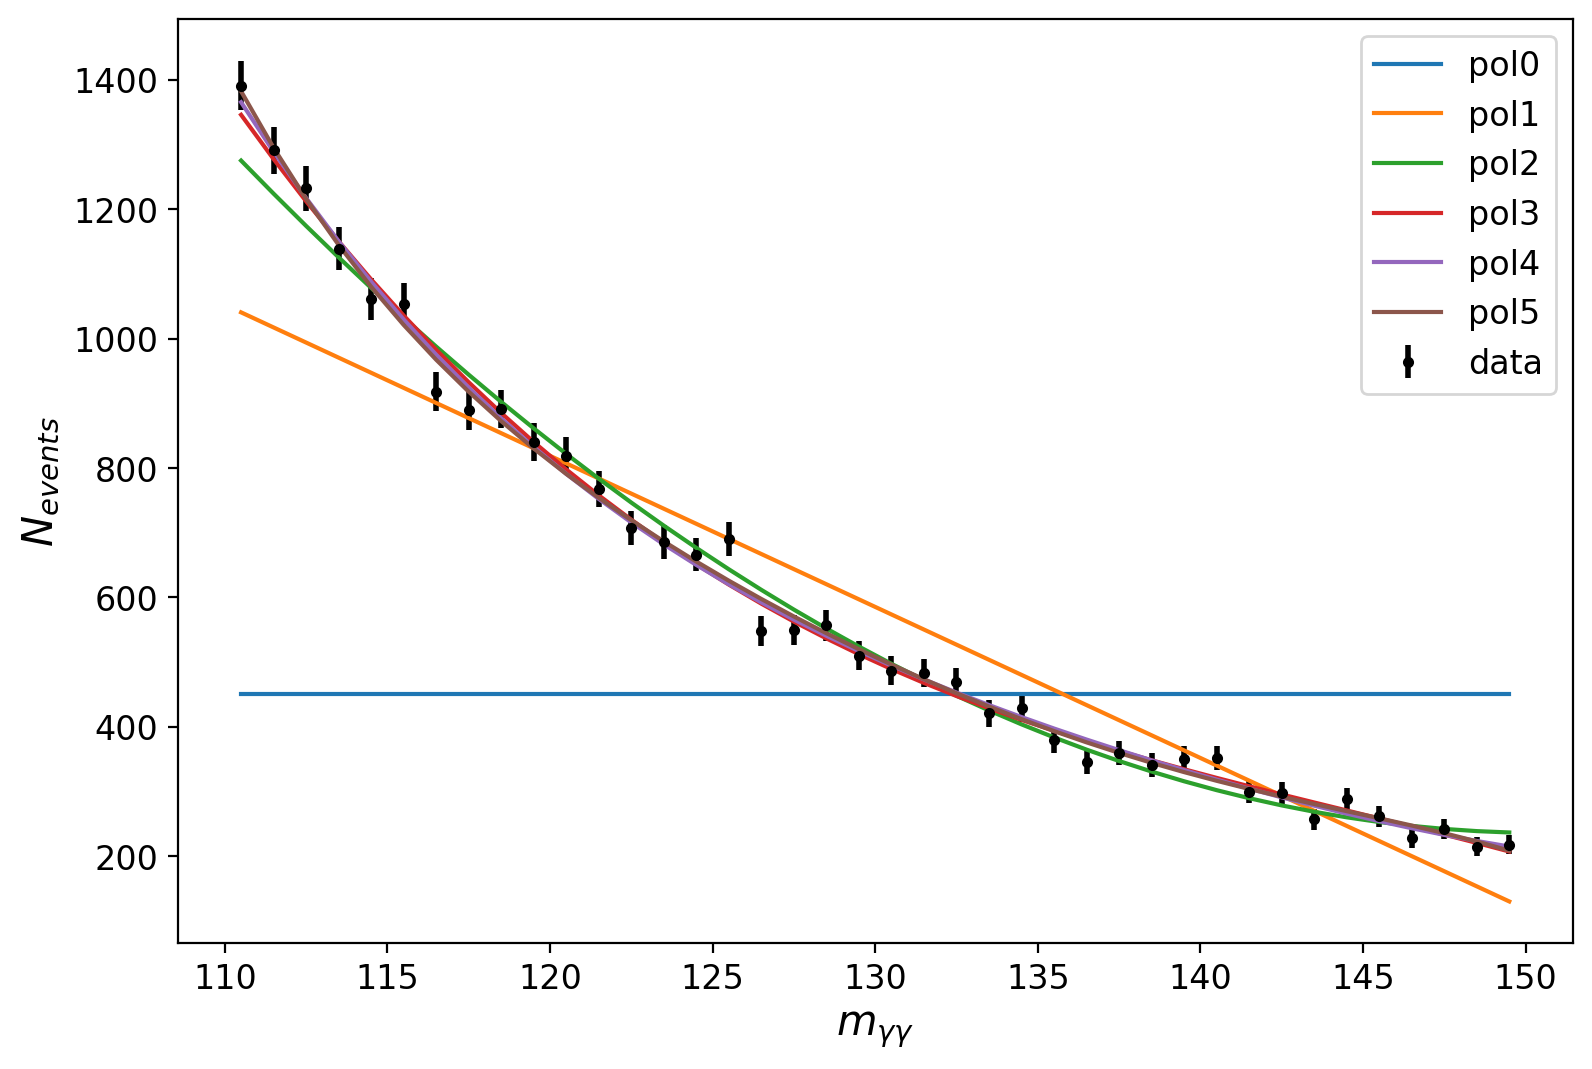

In [31]:
import lmfit 

def pol0(x,p0):
    pols=[p0]
    y = np.polyval(pols,x)
    return y

def pol1(x,p0,p1):
    pols=[p0,p1]
    y = np.polyval(pols,x)
    return y

def pol2(x, p0, p1,p2):
    pols=[p0,p1,p2]
    y = np.polyval(pols,x)
    return y

def pol3(x, p0, p1,p2,p3):
    pols=[p0,p1,p2,p3]
    y = np.polyval(pols,x)
    return y

def pol4(x, p0, p1,p2,p3,p4):
    pols=[p0,p1,p2,p3,p4]
    y = np.polyval(pols,x)
    return y

def pol5(x, p0, p1,p2,p3,p4,p5):
    pols=[p0,p1,p2,p3,p4,p5]
    y = np.polyval(pols,x)
    return y

def fitModel(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0)
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    #result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    output = model.eval(params=result.params,x=iX)
    return output

result0 = fitModel(x,y,weights,pol0)
result1 = fitModel(x,y,weights,pol1)
result2 = fitModel(x,y,weights,pol2)
result3 = fitModel(x,y,weights,pol3)
result4 = fitModel(x,y,weights,pol4)
result5 = fitModel(x,y,weights,pol5)

plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result0,label="pol0")
plt.plot(x,result1,label="pol1")
plt.plot(x,result2,label="pol2")
plt.plot(x,result3,label="pol3")
plt.plot(x,result4,label="pol4")
plt.plot(x,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

#res0.plot()
#result1.plot()
#result2.plot()
#result3.plot()
#result4.plot()
#result5.plot()

Let's look at one of the higher order polynomials. 

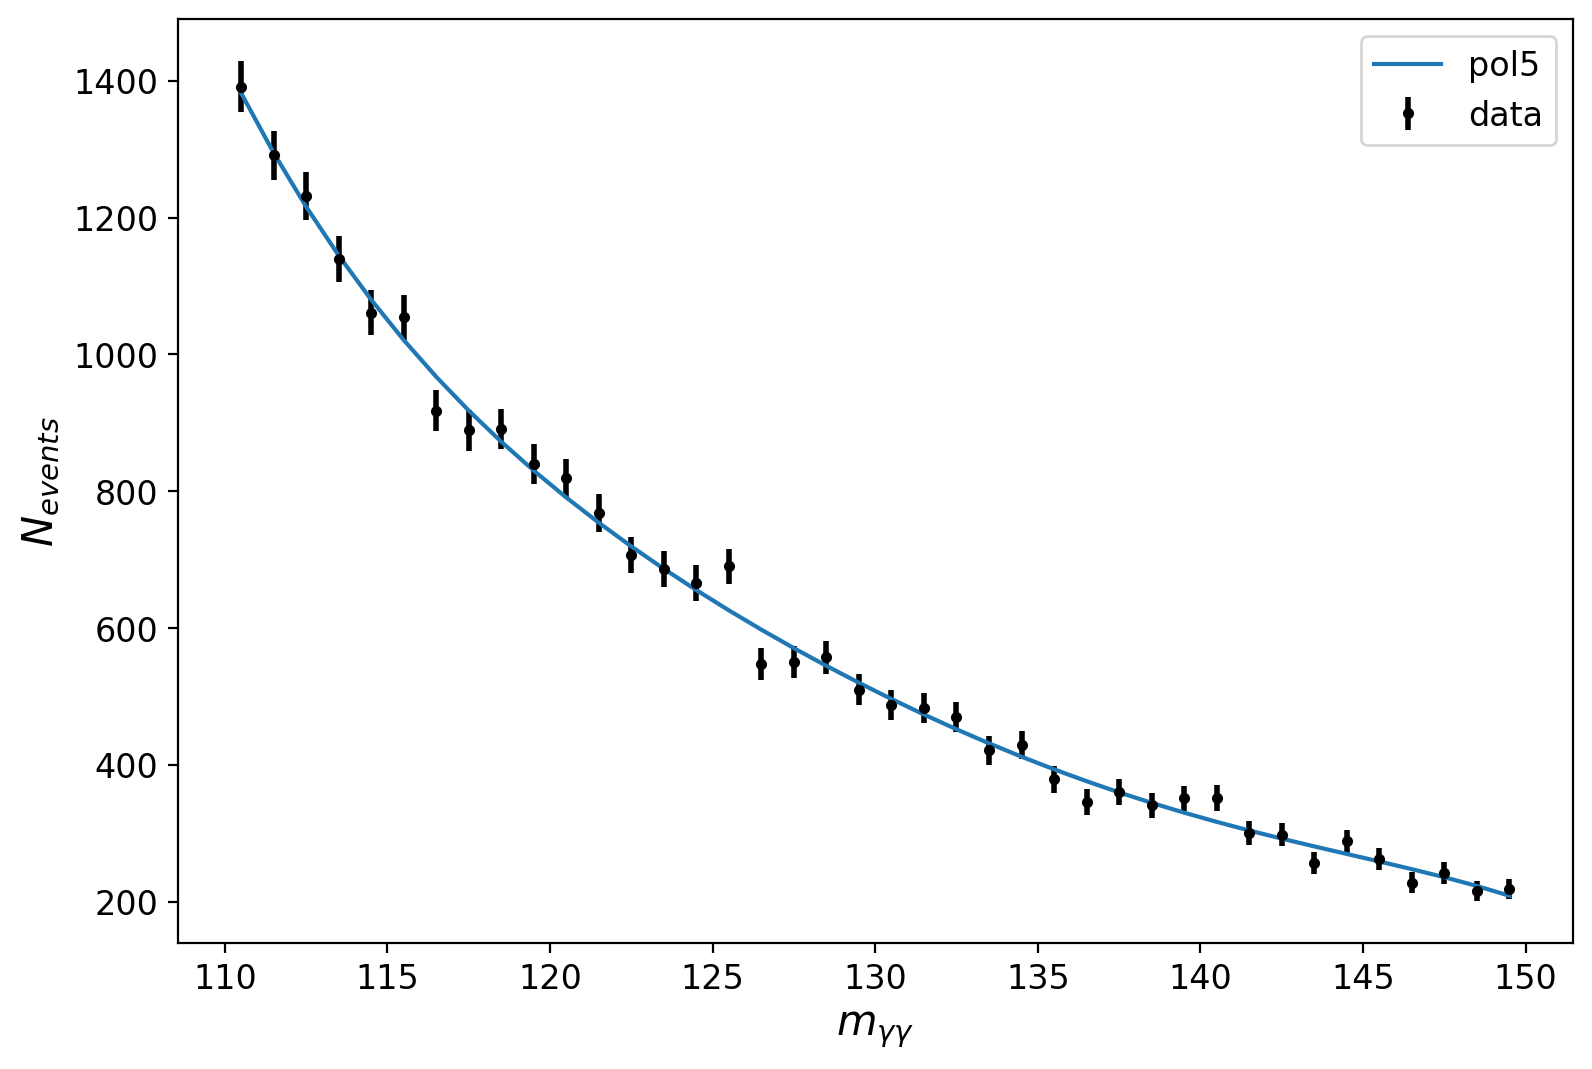

In [36]:
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

You can see its starting to pick up the fluctuations, if add even higher order polynomials, it will pick up even more fluctations. The f-test can tell us when we are adding too many polynomials. To see this, lets look at the residuals. 

Mean: 3.0953151007712 	STD: 11.77356739324426
Mean: 0.16270250218844964 	STD: 3.591162076611733
Mean: 0.020073638302971375 	STD: 0.937024291806045


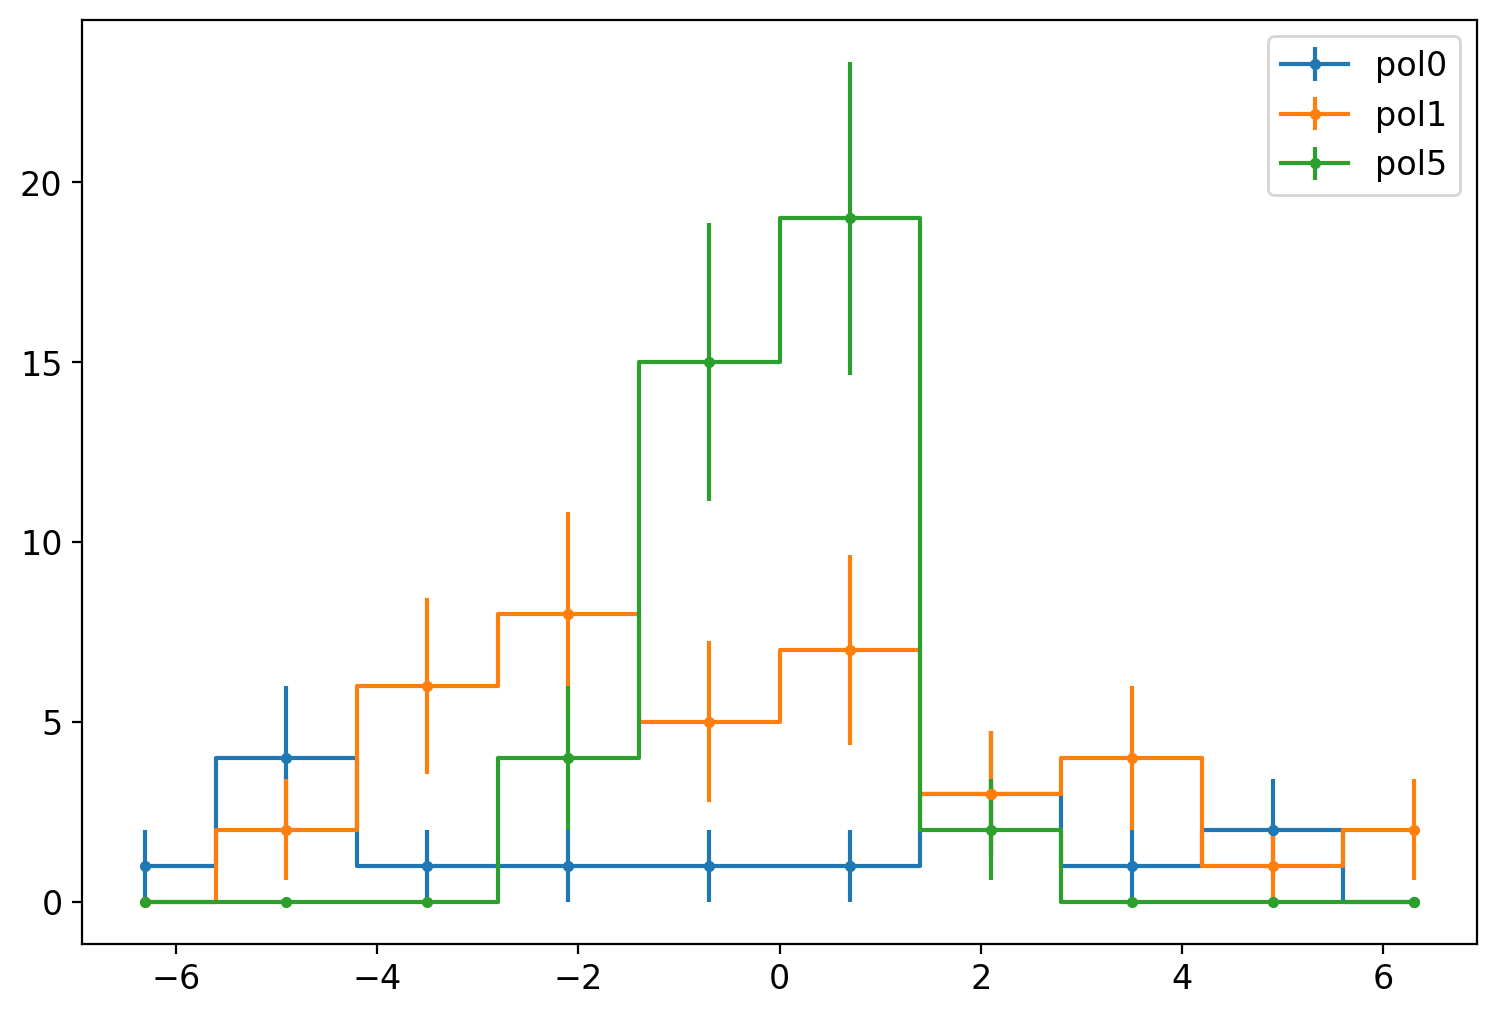

In [40]:
def residual(iY,iFunc,iYErr):
    resid = (iY-iFunc)/iYErr
    tmp_vals, tmp_bin_edges = np.histogram(resid, bins=10,range=[-7,7])
    tmp_bin_centers = 0.5*(tmp_bin_edges[1:] + tmp_bin_edges[:-1])
    print("Mean:",resid.mean(),"\tSTD:",resid.std())
    return tmp_bin_centers,tmp_vals

delta_p0,delta_y0 = residual(y,result0,y_err)
delta_p1,delta_y1 = residual(y,result1,y_err)
delta_p5,delta_y5 = residual(y,result5,y_err)
plt.errorbar(delta_p0,delta_y0,yerr=delta_y0**0.5,label="pol0",marker='.',drawstyle = 'steps-mid')
plt.errorbar(delta_p1,delta_y1,yerr=delta_y1**0.5,label="pol1",marker='.',drawstyle = 'steps-mid')
plt.errorbar(delta_p5,delta_y5,yerr=delta_y5**0.5,label="pol5",marker='.',drawstyle = 'steps-mid')
plt.legend()
plt.show()

So as we go to a higher order polynomial,we get to progressively smaller standard deviation. The issue is when do we stop. Lets now compute the f-statistic and compare it to our samples.  The f-statistic is defined at the ratio of the RMS distributions, we can write this as: 

\begin{equation}
 f = \frac{  \sigma^{2}_{\rm group} }{\sigma^{2}} \\
 \sigma^{2}_{\rm group} = \frac{ -\sum_{i=1}^{N} \left(y_{i}-f_{2}(x_{i})\right)^{2} + \sum_{i=1}^{N} \left(y_{i}- f_{1}(x_{i})\right)^{2}}{\Delta^{2\rightarrow 1}_{\rm dof}} \\
 \sigma^{2} = \frac{1}{N - n_{\rm f_{2}~dof} }\sum_{i=1}^{N} \left(y_{i}- f_{1}(x_{i})\right)^{2}
\end{equation}

or in other words the variation from a higher order polynomial to a lower order polynomial, should be smaller than the average variation of the residuals. This is the f-statistic. Let's compute the f-statistic for a few instances.

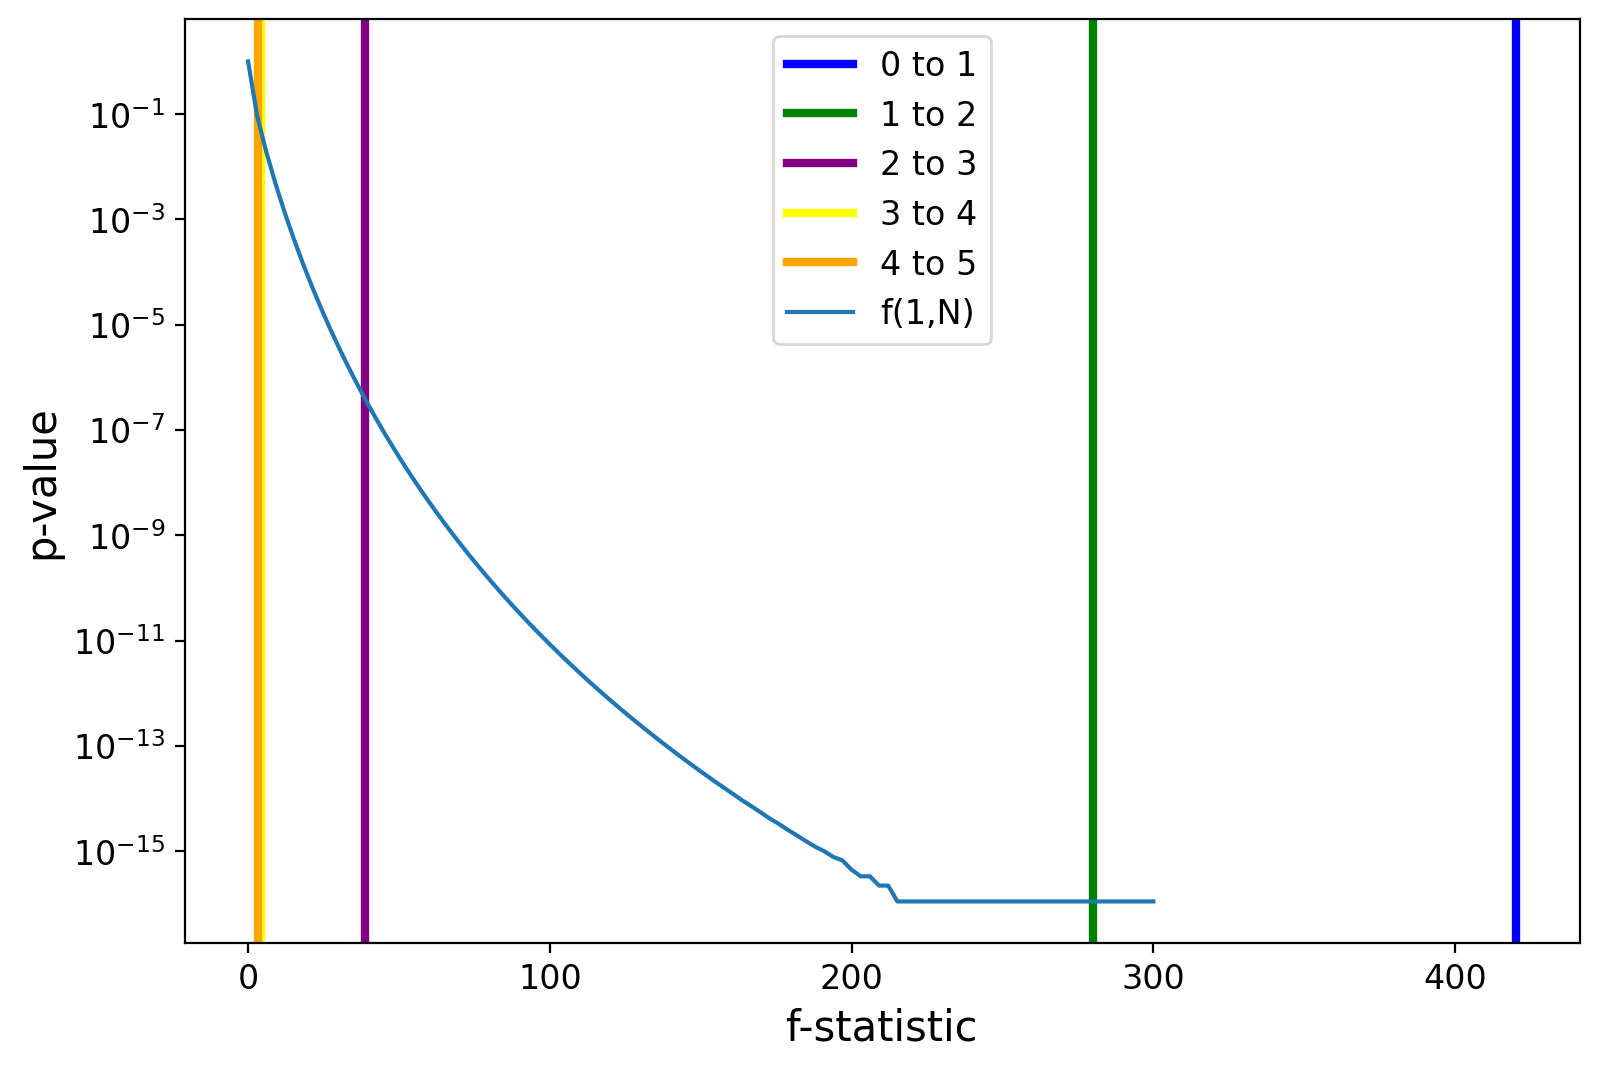

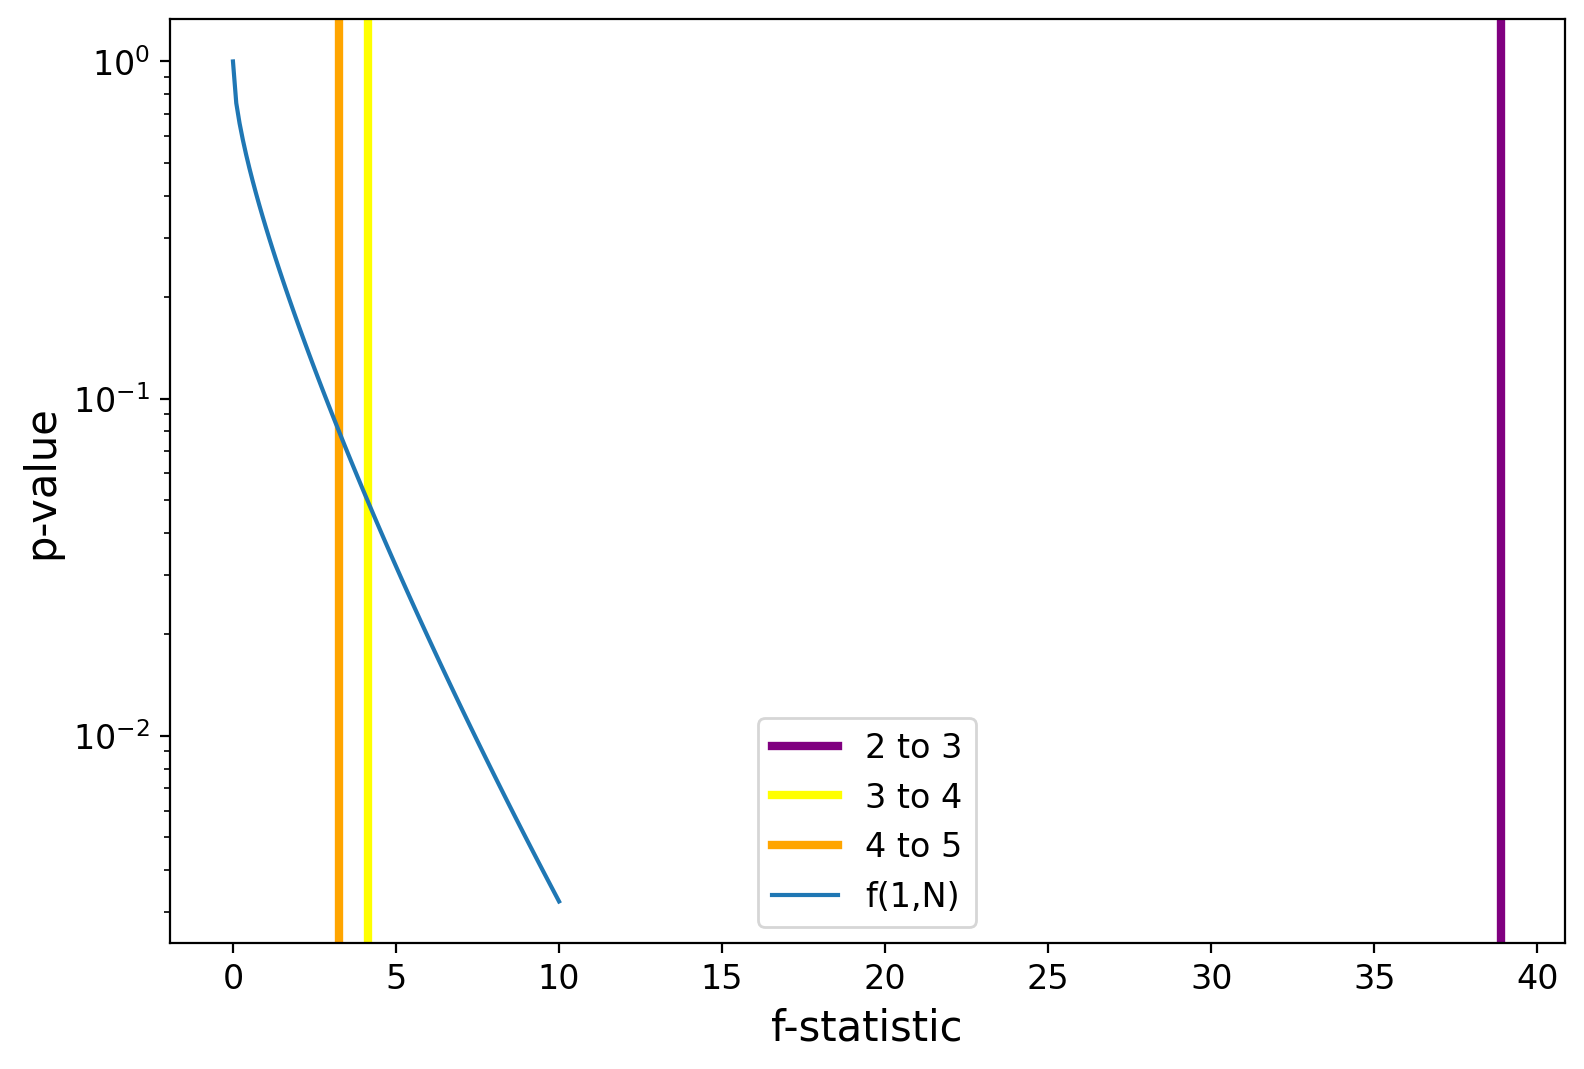

In [47]:
import scipy.stats as stats 

def residual2(iY,iFunc,iYErr):
    residval = (iY-iFunc)
    return np.sum(residval**2)
    
def ftest(iY,iYerr,f1,f2,ndof1,ndof2):
    r1=residual2(iY,f1,iYerr)
    r2=residual2(iY,f2,iYerr)
    sigma2group=(r1-r2)/(ndof2-ndof1)
    sigma2=r2/(len(y)-ndof2)
    return sigma2group/sigma2

f10=ftest(y,y_err,result0,result1,1,2)
f21=ftest(y,y_err,result1,result2,2,3)
f32=ftest(y,y_err,result2,result3,3,4)
f43=ftest(y,y_err,result3,result4,4,5)
f54=ftest(y,y_err,result4,result5,5,6)

xrange=np.linspace(0,300,100)
farr=1-stats.f.cdf(xrange,1,len(y)-5) #number of bins - 5 floating parameters
fig, ax = plt.subplots(figsize=(9,6))

ax.axvline(x=f10,linewidth=3,c='b',label='0 to 1')
ax.axvline(x=f21,linewidth=3,c='g',label='1 to 2')
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')

ax.set_yscale('log')
plt.plot(xrange,farr,label='f(1,N)')
plt.legend()
plt.xlabel('f-statistic')
plt.ylabel('p-value')
plt.show()

xrange=np.linspace(0,10,100)
farr=1-stats.f.cdf(xrange,1,len(y)-5) 
fig, ax = plt.subplots(figsize=(9,6))
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')
ax.set_yscale('log')
plt.xlabel('f-statistic')
plt.plot(xrange,farr,label='f(1,N)')
plt.ylabel('p-value')
plt.legend()
plt.show()

So, we see that large probabilities are present already in the 2 to 3 transition, which means that we likely only need a 2nd order polynomial. Let's check the $\chi^{2}$ value as well. 

Mean: 0.020867804142021183 	STD: 0.9834617013749073 chi2 prob: 0.3925898354958113
Normalized chi2: 1.046089063049662


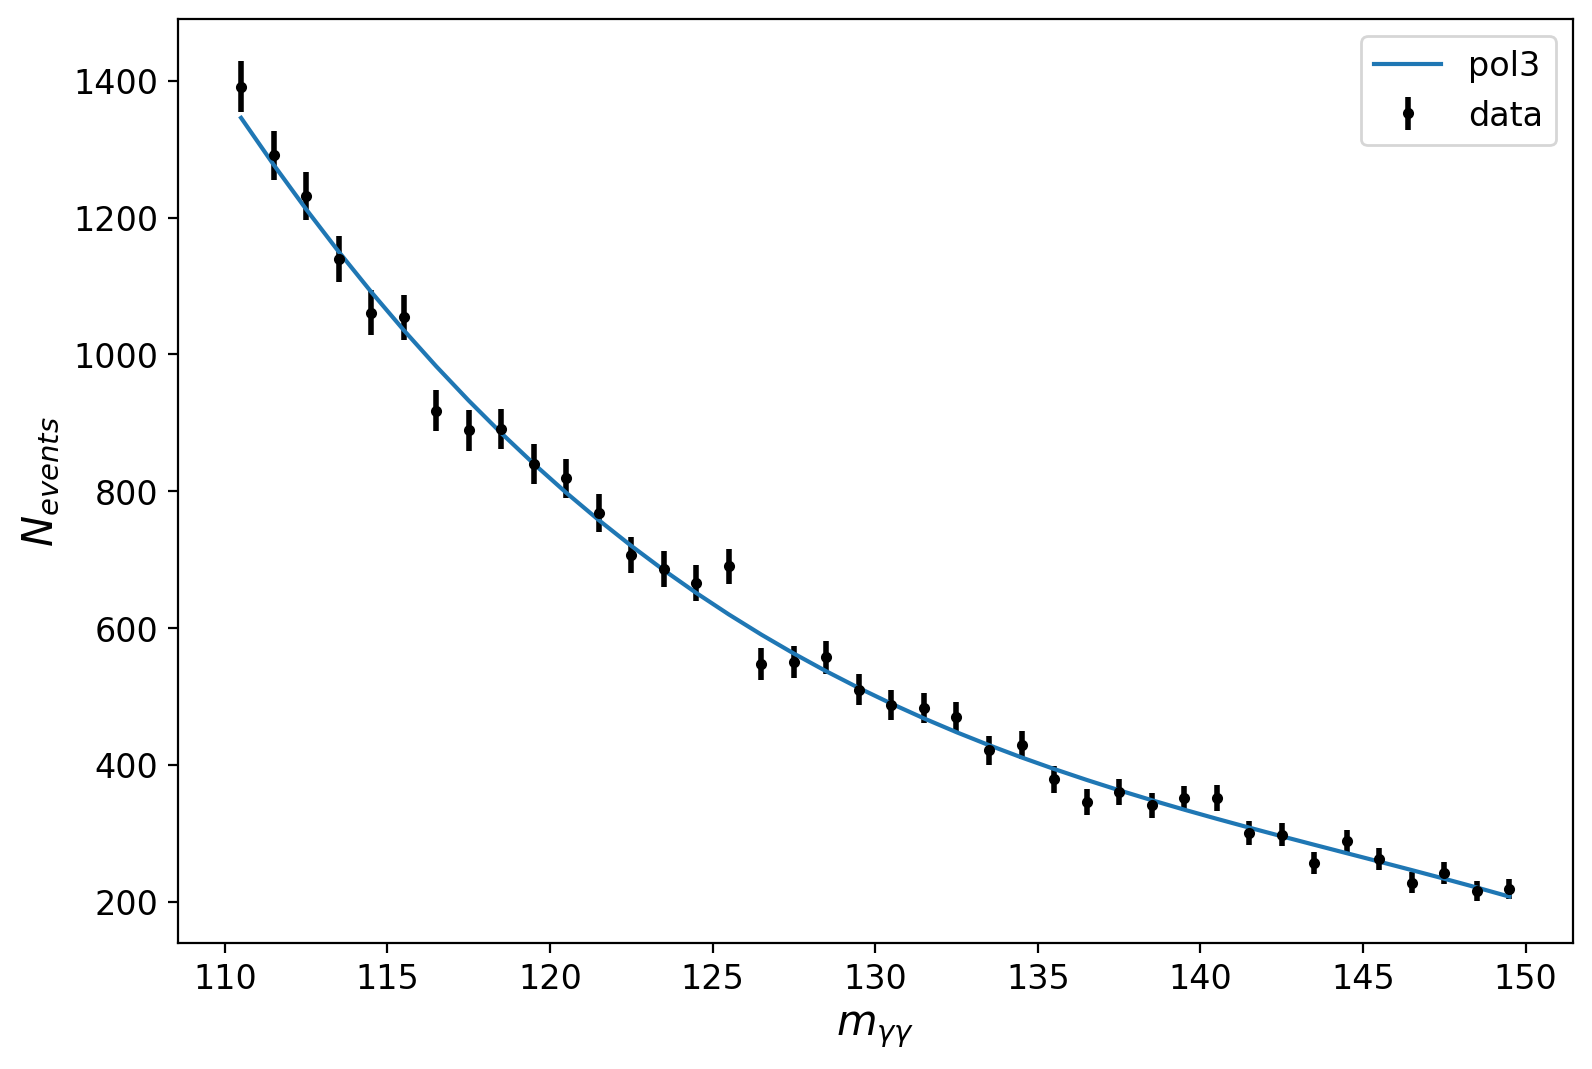

In [48]:
def chi2(iY,iFunc,iYErr,iNDOF):
    resid = (iY-iFunc)/iYErr
    chi2value = np.sum(resid**2)
    chi2prob=1-stats.chi2.cdf(chi2value,len(iY)-iNDOF)
    print("Mean:",resid.mean(),"\tSTD:",resid.std(),"chi2 prob:",chi2prob)
    return chi2value/(len(iY)-iNDOF)

chi2value=chi2(y,result3,y_err,3)
print("Normalized chi2:",chi2value)
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result3,label="pol3")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

Overall, this show the signs of a good fit.



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.3.1 </span>

Compare the $\chi^{2}$ probabilities of the fit? Could we have just done this with a $\chi^{2}$ test? 



In [ ]:
##answer

In [49]:
chi2(y,result1,y_err,2)
chi2(y,result2,y_err,3)
chi2(y,result3,y_err,4)

Mean: 0.16270250218844964 	STD: 3.591162076611733 chi2 prob: 0.0
Mean: 0.028406011251648666 	STD: 1.311884071233582 chi2 prob: 0.0011302772391219573
Mean: 0.020867804142021183 	STD: 0.9834617013749073 chi2 prob: 0.3485047645975501


1.0751470925788194

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
chi2 is 0.22
</pre>
        
**EXPLANATION:**
    
Yes, in this instance, we see a pretty dramatic jump in the chi2 distribution of the data. However, we ahve to be careful, the f-test is testing something differnt, it is not testing when the chi2 agrees, its testing when adding more polynomials doesn't gain you any more info.    
</div>



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.3.2 </span>

Fit a gaussian distribution to a polynomial when does the f-test tell you to stop?


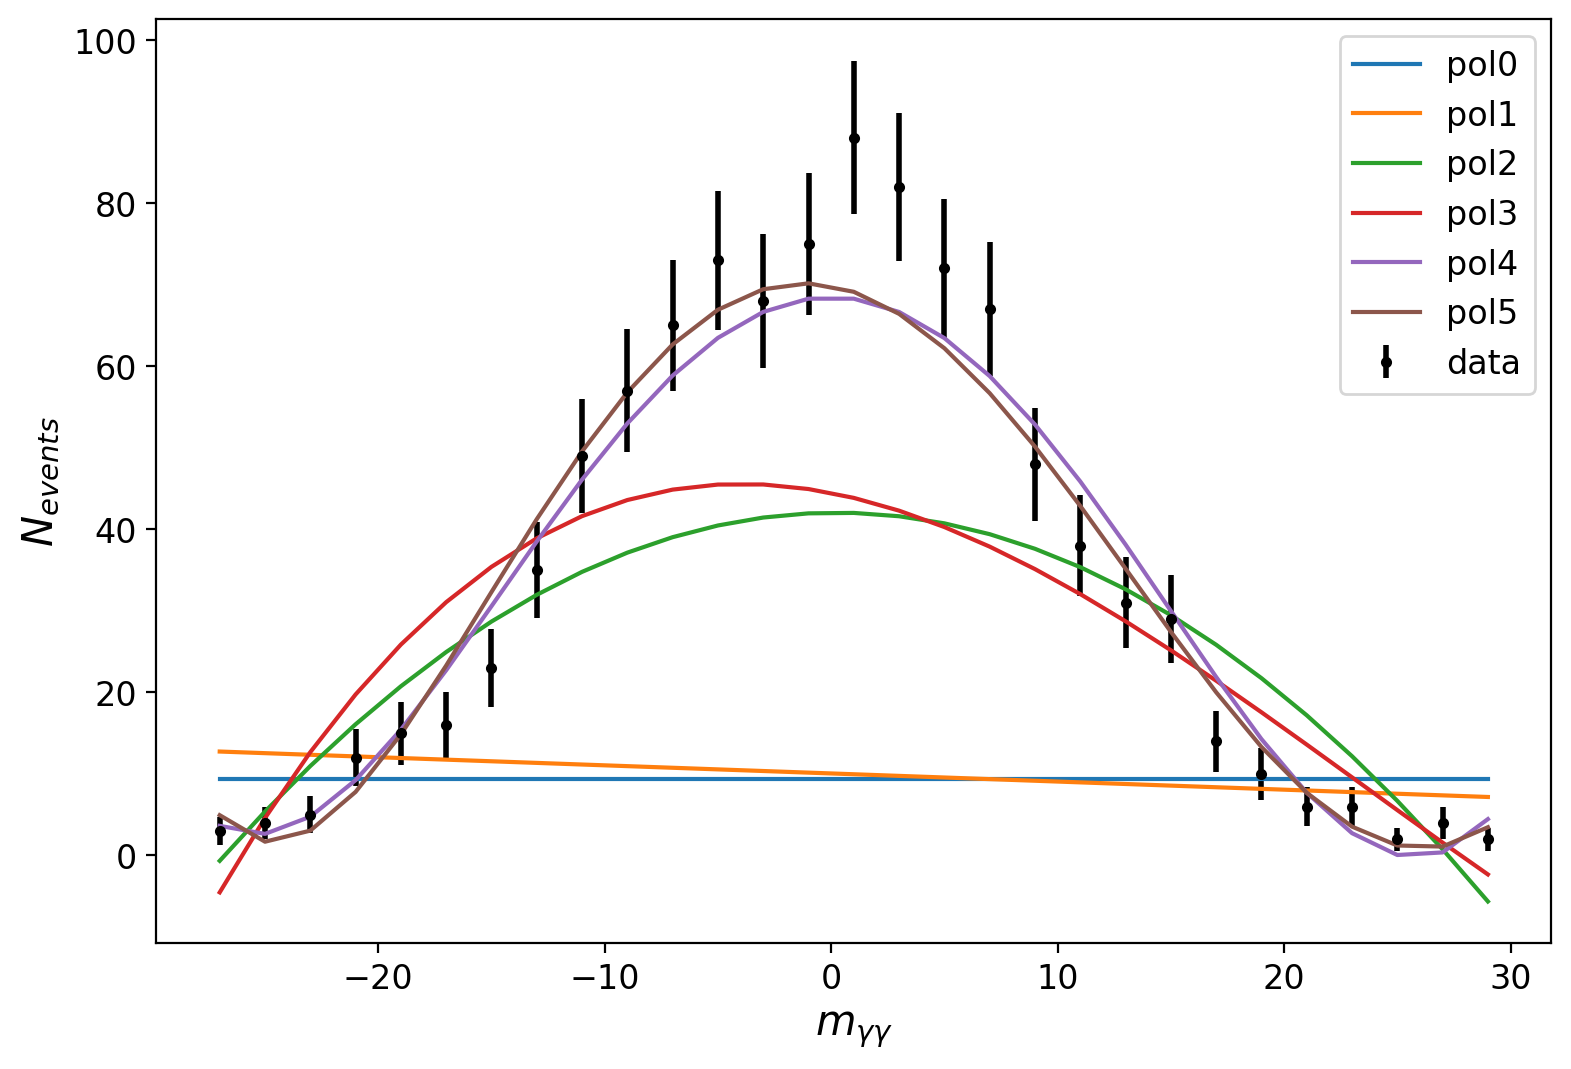

In [50]:
gausrandom = np.random.normal(0,10,1000)
y_test,bin_edges = np.histogram(gausrandom,bins=30,range=(-30,30))
x_test = 0.5*(bin_edges[1:] + bin_edges[:-1])

x_test = x_test[y_test > 0]
y_test = y_test[y_test > 0]
y_test_err = np.sqrt(y_test)
weights_test = 1./np.sqrt(y_test)

result0 = fitModel(x_test,y_test,weights_test,pol0)
result1 = fitModel(x_test,y_test,weights_test,pol1)
result2 = fitModel(x_test,y_test,weights_test,pol2)
result3 = fitModel(x_test,y_test,weights_test,pol3)
result4 = fitModel(x_test,y_test,weights_test,pol4)
result5 = fitModel(x_test,y_test,weights_test,pol5)

plt.errorbar(x_test,y_test,y_test_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x_test,result0,label="pol0")
plt.plot(x_test,result1,label="pol1")
plt.plot(x_test,result2,label="pol2")
plt.plot(x_test,result3,label="pol3")
plt.plot(x_test,result4,label="pol4")
plt.plot(x_test,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

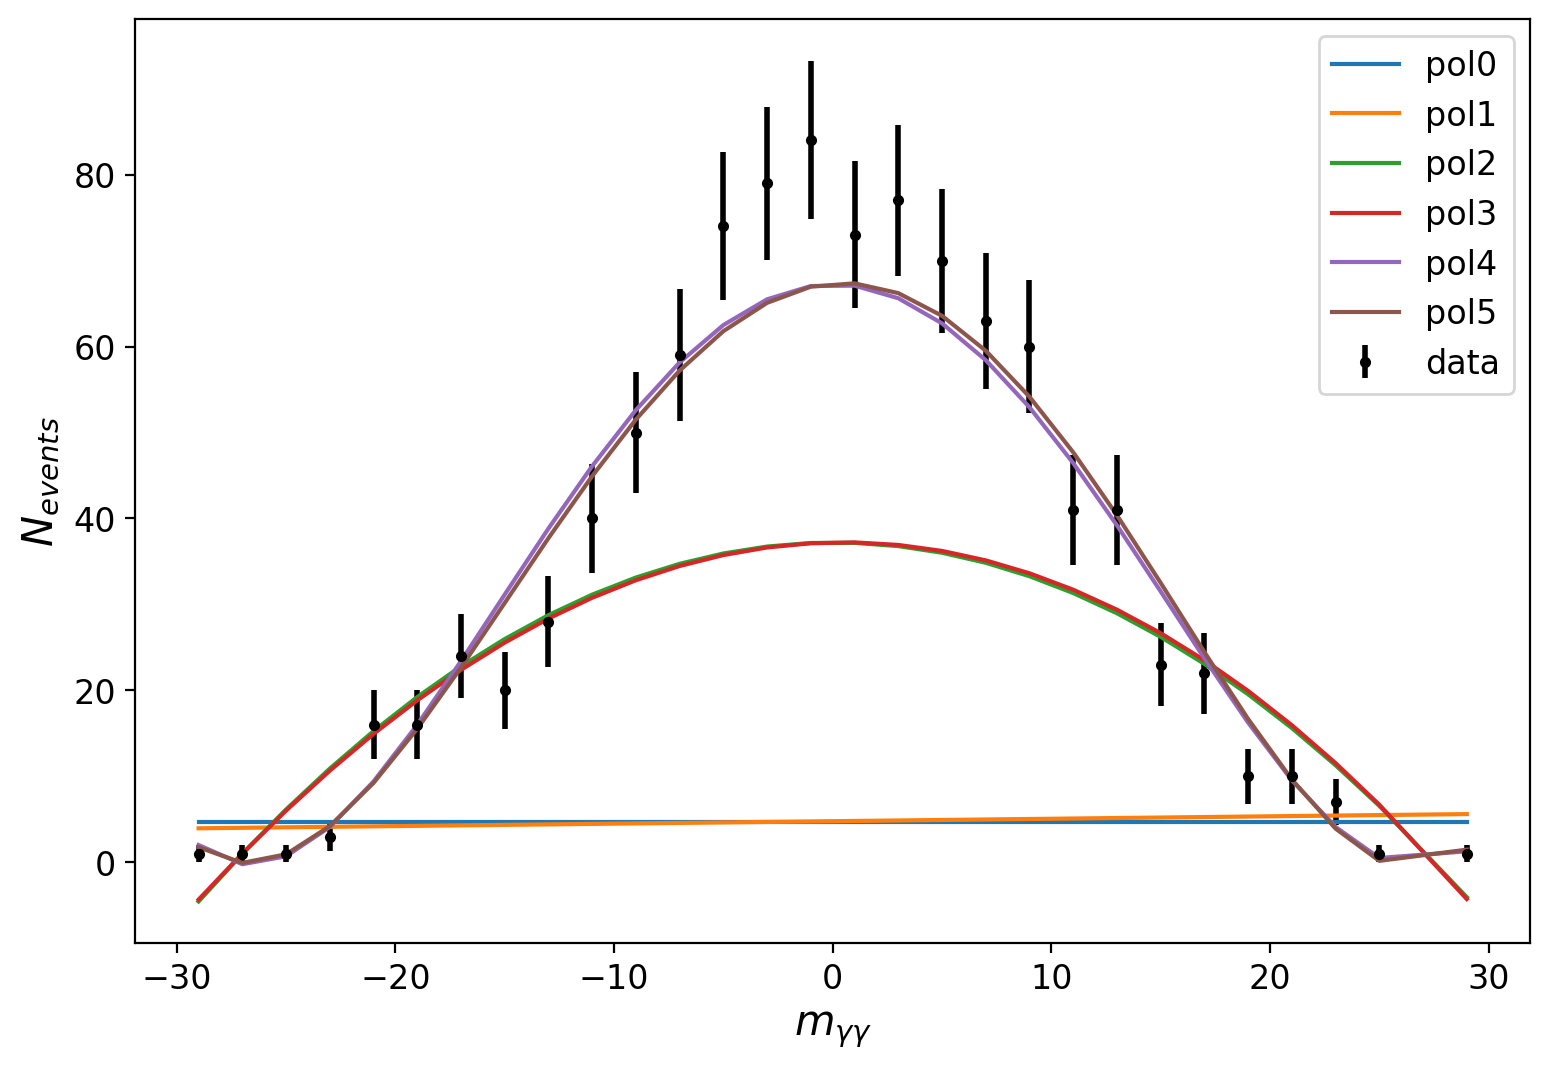

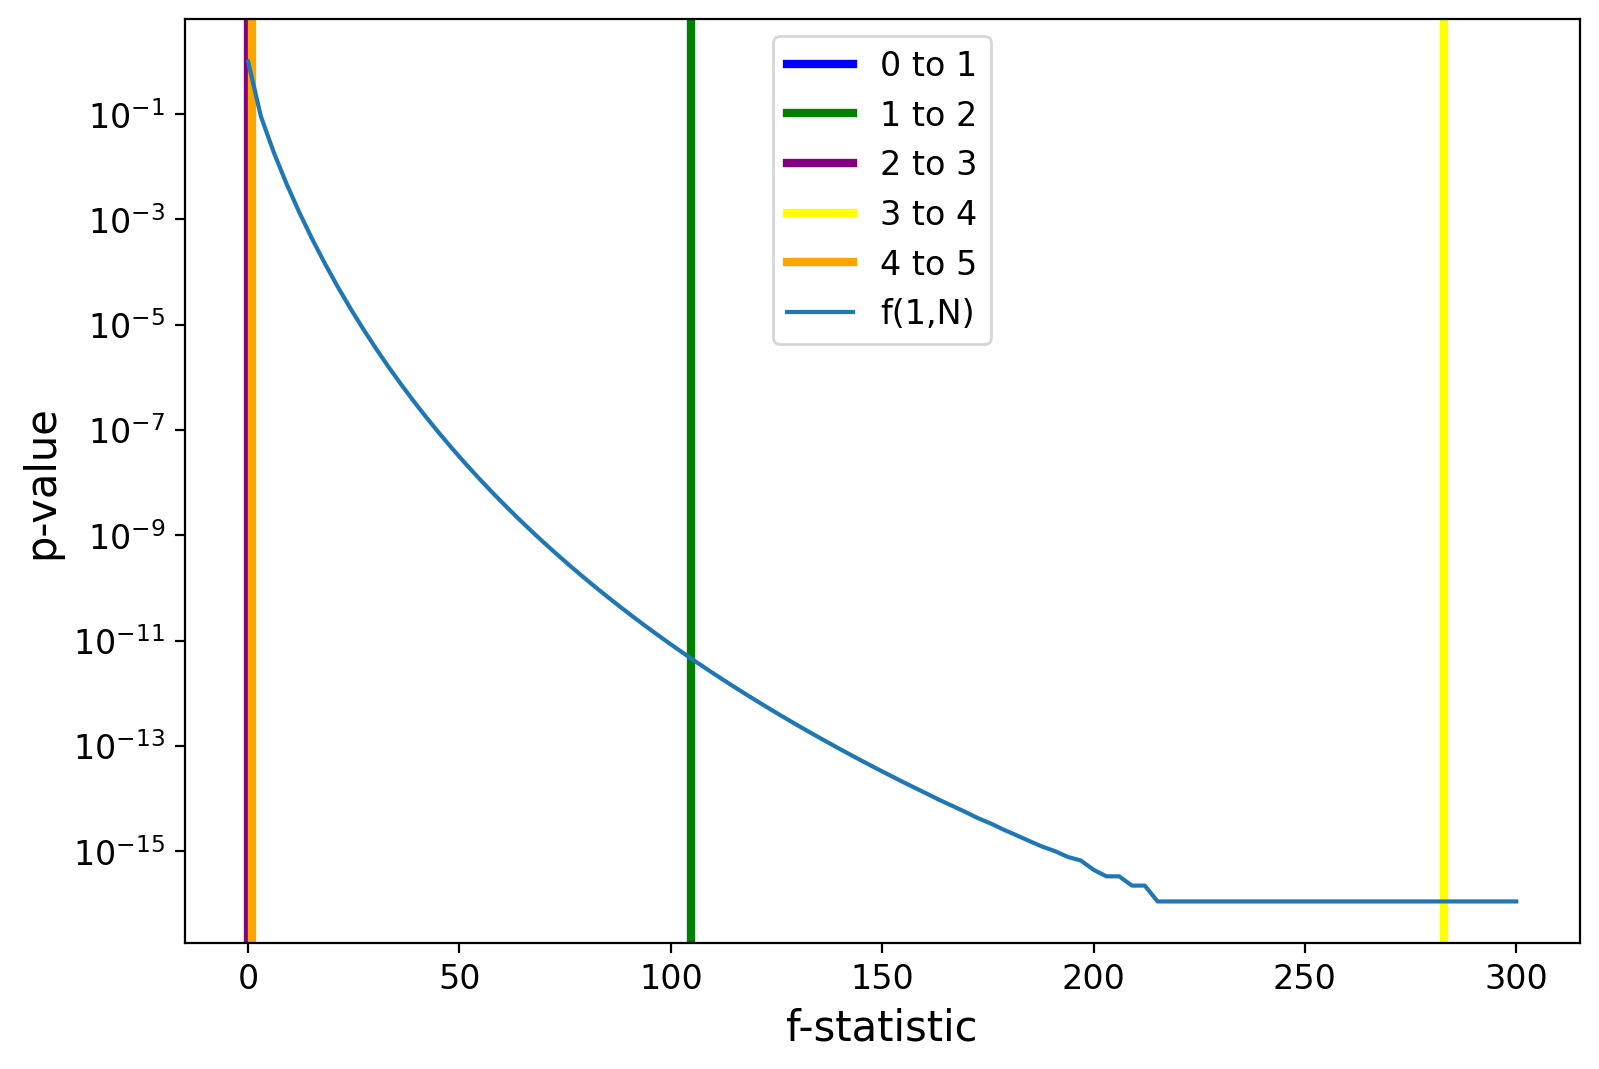

In [51]:
gausrandom = np.random.normal(0,10,1000)
y_test,bin_edges = np.histogram(gausrandom,bins=30,range=(-30,30))
x_test = 0.5*(bin_edges[1:] + bin_edges[:-1])

x_test = x_test[y_test > 0]
y_test = y_test[y_test > 0]
y_test_err = np.sqrt(y_test)
weights_test = 1./np.sqrt(y_test)

result0 = fitModel(x_test,y_test,weights_test,pol0)
result1 = fitModel(x_test,y_test,weights_test,pol1)
result2 = fitModel(x_test,y_test,weights_test,pol2)
result3 = fitModel(x_test,y_test,weights_test,pol3)
result4 = fitModel(x_test,y_test,weights_test,pol4)
result5 = fitModel(x_test,y_test,weights_test,pol5)

plt.errorbar(x_test,y_test,y_test_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x_test,result0,label="pol0")
plt.plot(x_test,result1,label="pol1")
plt.plot(x_test,result2,label="pol2")
plt.plot(x_test,result3,label="pol3")
plt.plot(x_test,result4,label="pol4")
plt.plot(x_test,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()


f10=ftest(y_test,y_err,result0,result1,1,2)
f21=ftest(y_test,y_test_err,result1,result2,2,3)
f32=ftest(y_test,y_test_err,result2,result3,3,4)
f43=ftest(y_test,y_test_err,result3,result4,4,5)
f54=ftest(y_test,y_test_err,result4,result5,5,6)

xrange=np.linspace(0,300,100)
farr=1-stats.f.cdf(xrange,1,len(y)-5) 
fig, ax = plt.subplots(figsize=(9,6))

ax.axvline(x=f10,linewidth=3,c='b',label='0 to 1')
ax.axvline(x=f21,linewidth=3,c='g',label='1 to 2')
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')

ax.set_yscale('log')
plt.plot(xrange,farr,label='f(1,N)')
plt.legend()
plt.xlabel('f-statistic')
plt.ylabel('p-value')
plt.show()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
2 to 3
</pre>
        
**EXPLANATION:**
The lowest one where the f-distribution is basically the same is the 2 to 3, you can see this in the fits. This very much seems fishy, do the next question. 
    
</div>



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.3.3 </span>

Now compute the $\chi^{2}$ of all of your fits, what do you conclude? 


In [52]:
###Now we test the chi2
chi2(y_test,result2,y_test_err,3)
chi2(y_test,result3,y_test_err,4)
chi2(y_test,result4,y_test_err,5)
chi2(y_test,result5,y_test_err,6)

Mean: 1.0554874163387309 	STD: 3.171423217280933 chi2 prob: 0.0
Mean: 1.0542681652037398 	STD: 3.170471441284461 chi2 prob: 0.0
Mean: 0.058279762478681836 	STD: 1.1487949673225049 chi2 prob: 0.03175799677569524
Mean: 0.0570863968931382 	STD: 1.1378448396027405 chi2 prob: 0.02782640839543249


1.6365453189523476

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
None of them are good
</pre>
        
**EXPLANATION:**
This is an improtant issue with the f-test. A lot of people like to automate this. However, this is not a replacement for the best fit likelihood or chi$^{2}$ distribution in the data. You need to stay alive for that. 
    
</div>



<a name='section_11_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.4 Fitting for the Higgs boson signal Background </h2>  



With all of these pieces together, I would like to compute the significance of the Higgs boson discovery in one of its main channels. To do this, we are going to use all of the tools that we have been going over. Let's first look at the data. For the Higgs boson data, there are 2 years of data each with 5 categories. Here is what all of them look like. 

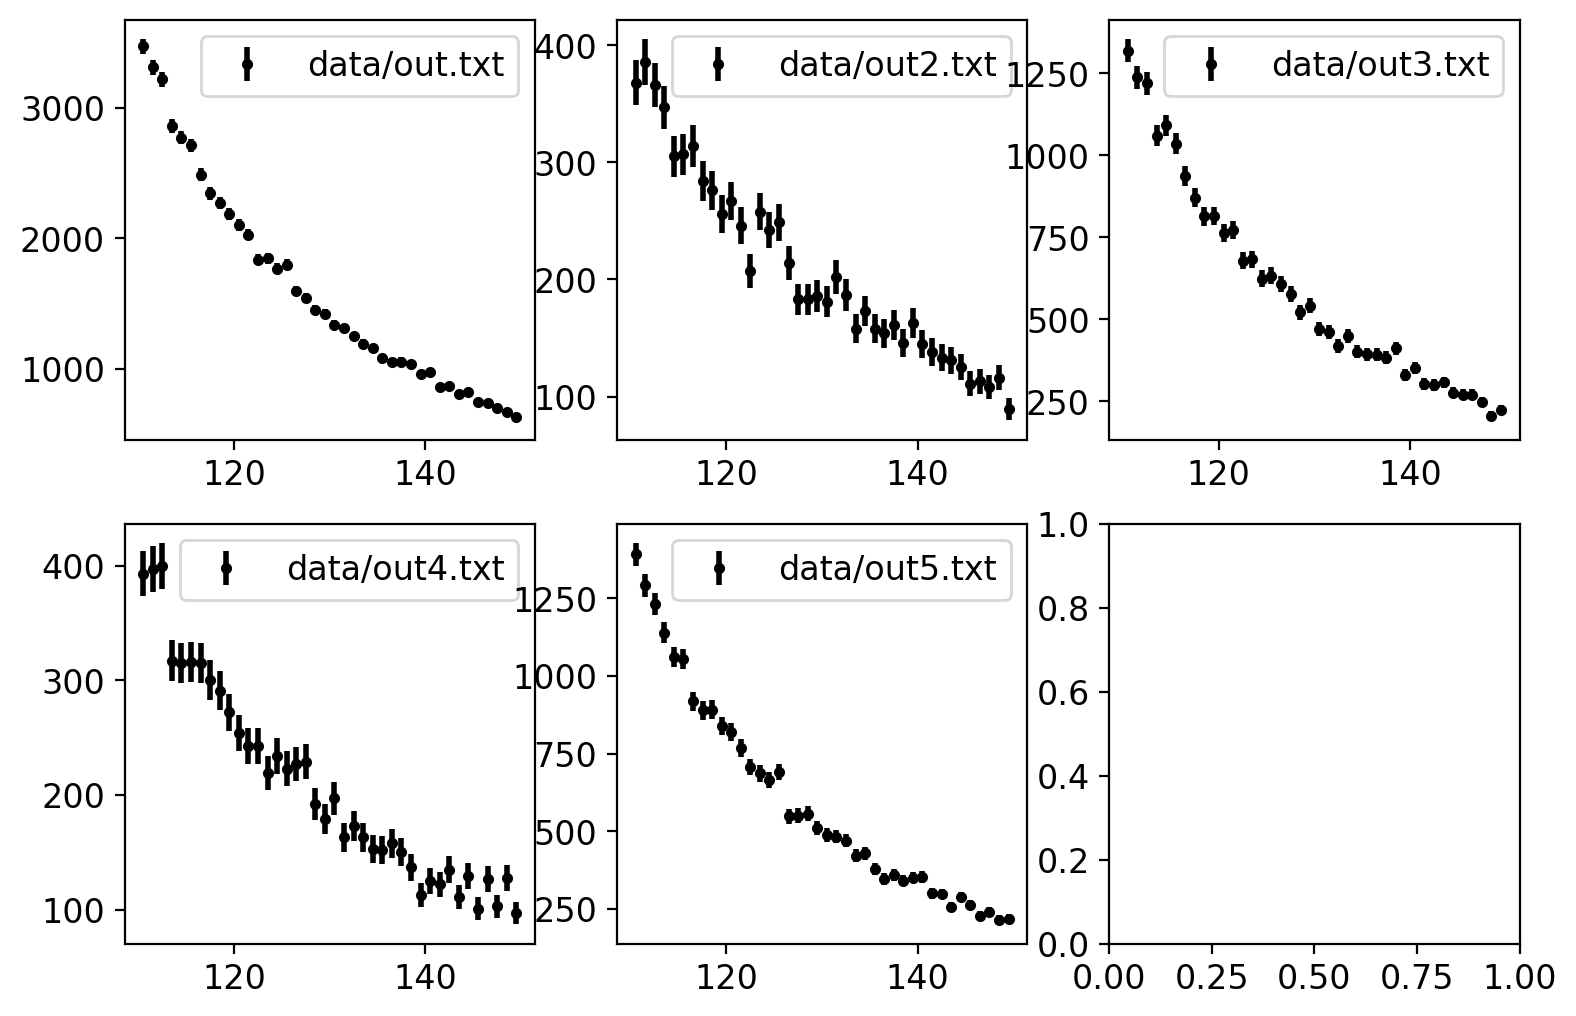

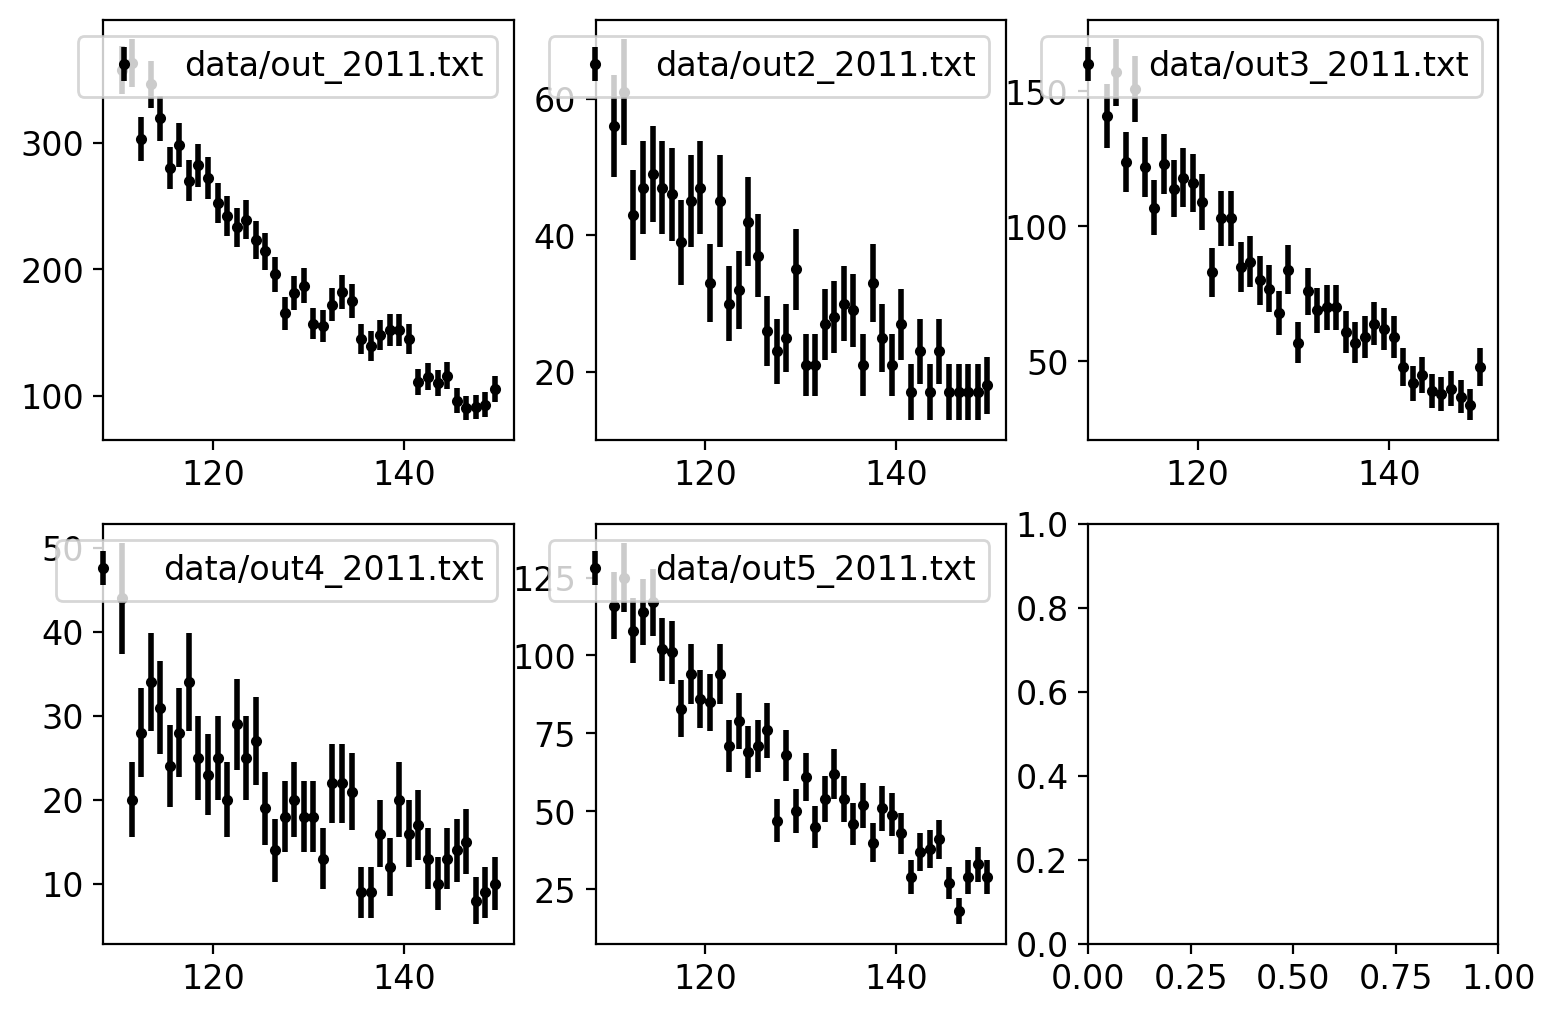

In [53]:
def load(iLabel,iRange=False):
    x = np.array([])
    y = np.array([])
    label=iLabel
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=' ')
        for row in plots:
            if not iRange and (float(row[1]) > 150 or float(row[1]) < 110):
                continue
            x = np.append(x,float(row[1]))
            y = np.append(y,float(row[2]))
            #add poisson uncertainties                                                                                                 
    weights = 1./y**0.5 
    return x,y,y**0.5,weights

def plot(ax,iLabel):
    x,y,y_err,weights=load(iLabel)
    #Now we plot it. 
    ax.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label=iLabel)
    #ax.x_label("$m_{\gamma\gamma}$")
    #ax.y_label("$N_{events}$")
    ax.legend()
    #ax.show()
    
fig, axs = plt.subplots(2, 3)
#2012 data    
plot(axs[0,0],"data/out.txt")
plot(axs[0,1],"data/out2.txt")
plot(axs[0,2],"data/out3.txt")
plot(axs[1,0],"data/out4.txt")
plot(axs[1,1],"data/out5.txt")
plt.show()

fig, axs = plt.subplots(2, 3)
#2011 data    
plot(axs[0,0],"data/out_2011.txt")
plot(axs[0,1],"data/out2_2011.txt")
plot(axs[0,2],"data/out3_2011.txt")
plot(axs[1,0],"data/out4_2011.txt")
plot(axs[1,1],"data/out5_2011.txt")

As you can see, from the above plots, there are way more points in the 2012 data. Lets take the category with the largest number of points, and perform an f-test on it, we can neglect the signal for now, but we will get back to that in a sec.  

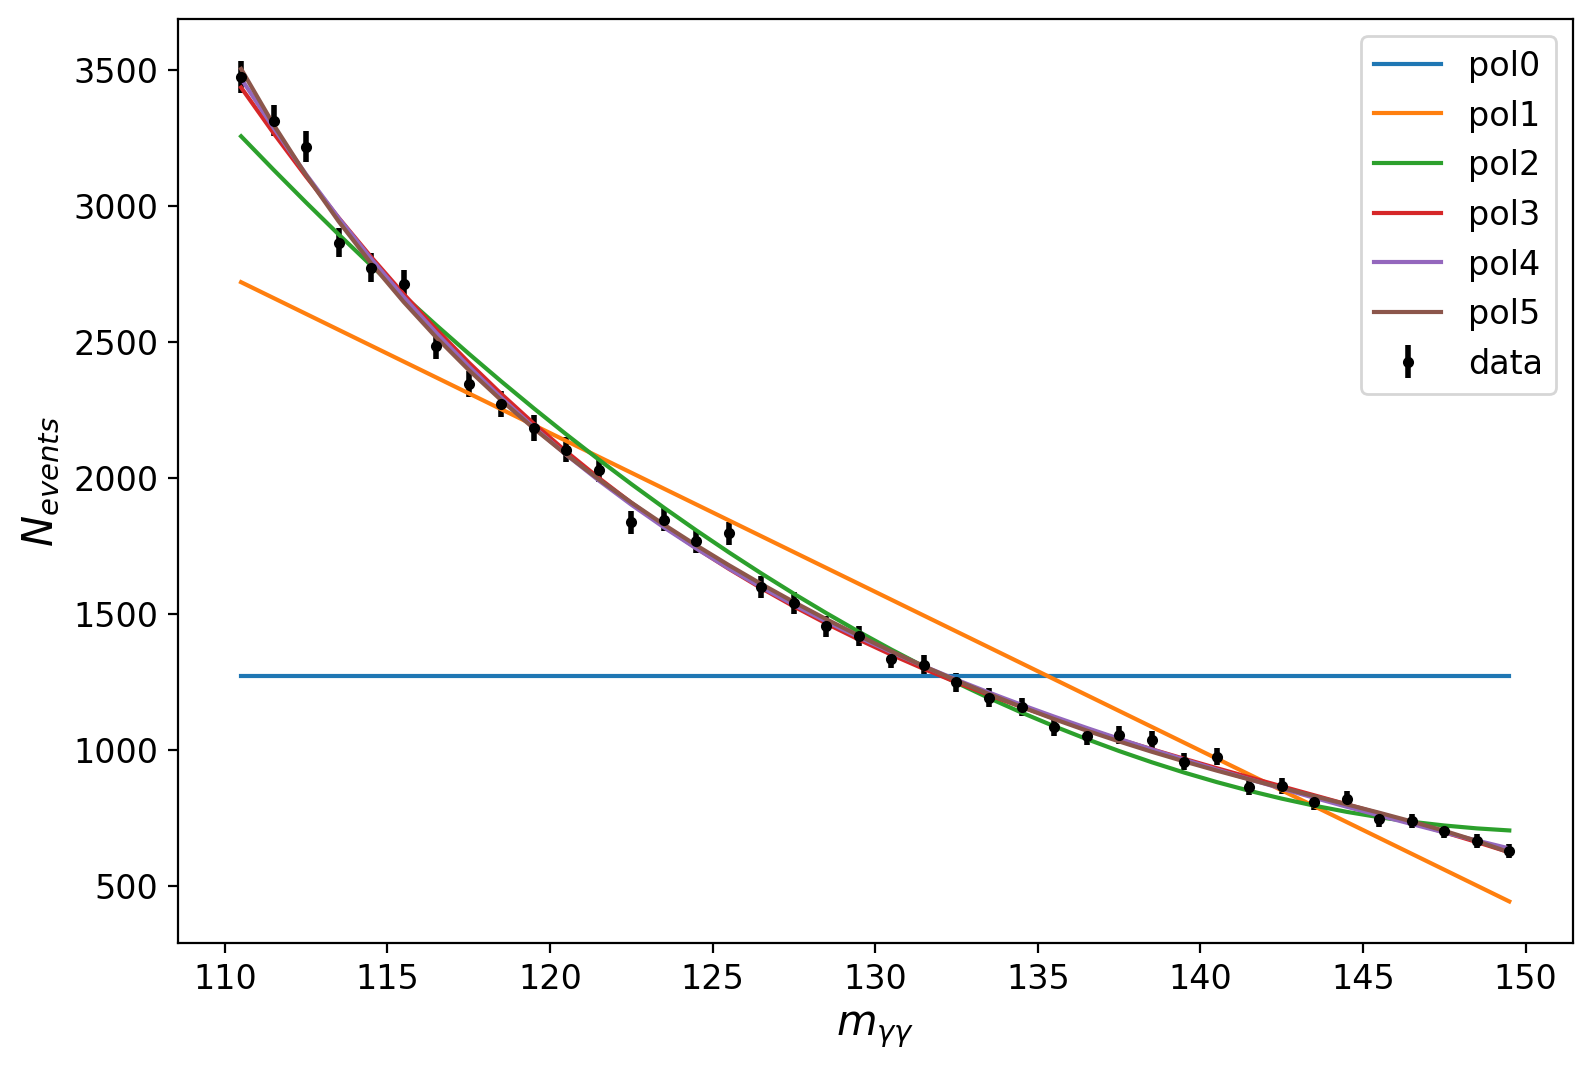

f 1 to 0: 1.1102230246251565e-16
f 2 to 1: 1.1102230246251565e-16
f 3 to 2: 1.0090073221391549e-10
f 4 to 3: 0.04897029186418689
f 5 to 4: 0.07572119267959476


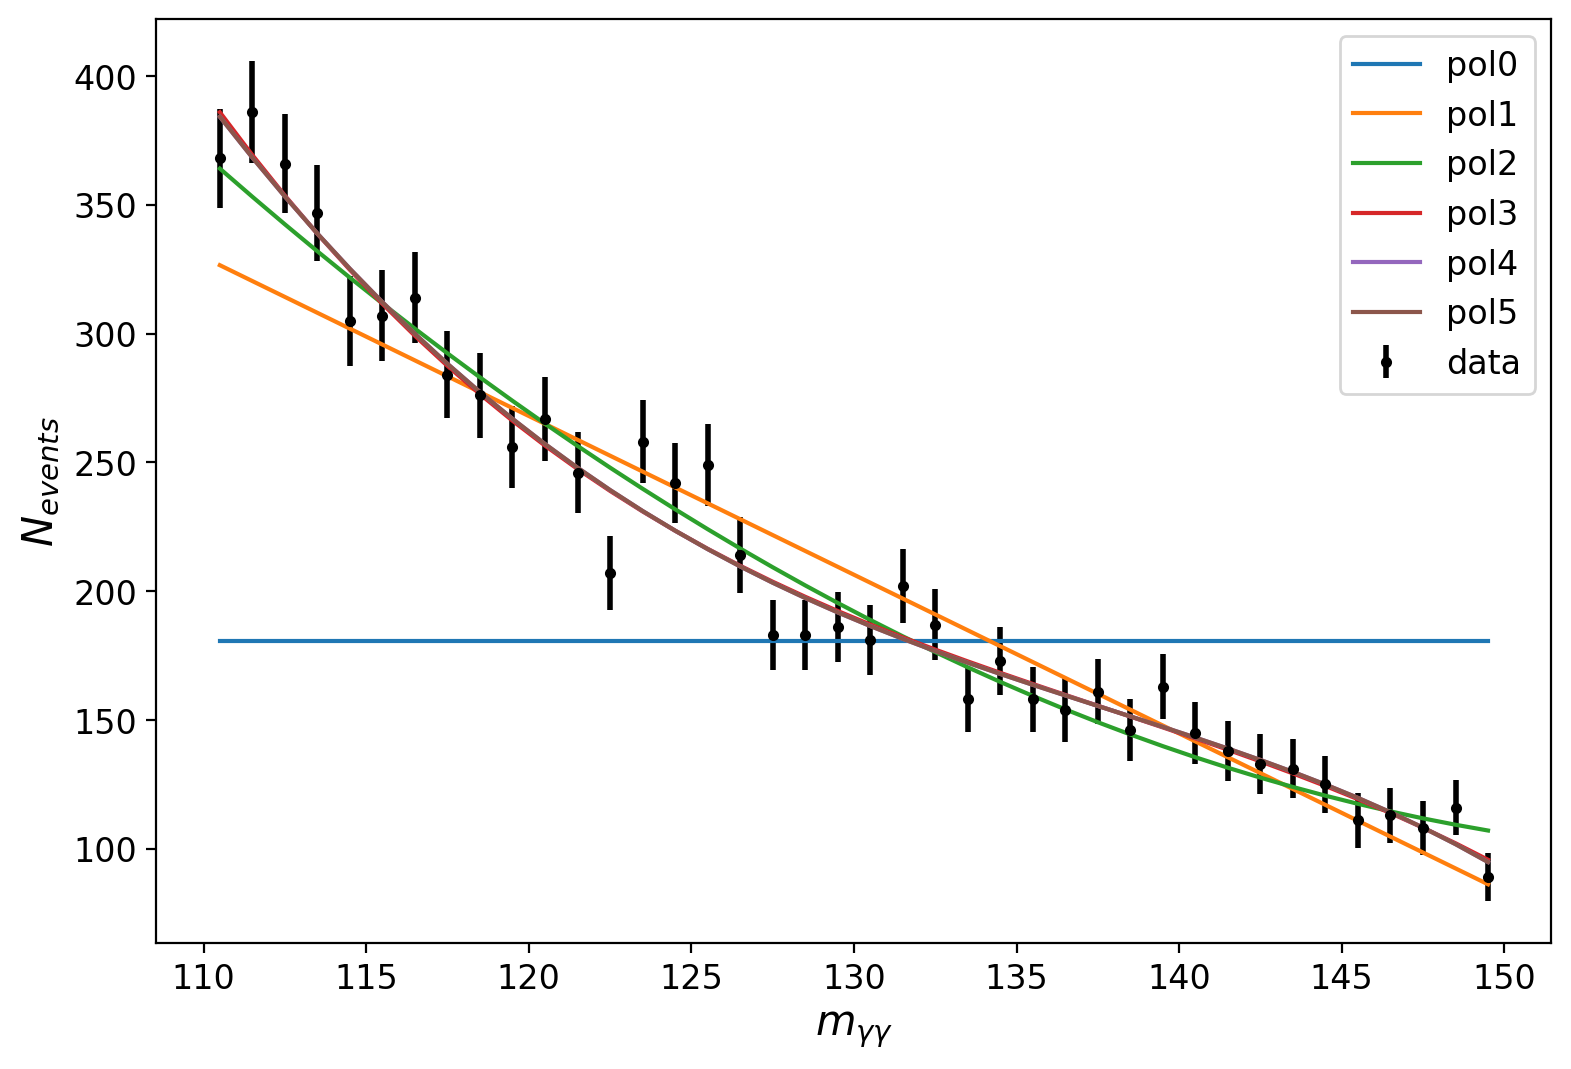

f 1 to 0: 1.1102230246251565e-16
f 2 to 1: 4.9372434141048416e-08
f 3 to 2: 0.0035138407452814935
f 4 to 3: 0.8546368491590365
f 5 to 4: 0.9746177621262444


In [54]:
def fitAll(iLabel,iPlot=False):
    x,y,y_err,weights=load(iLabel)
    result0 = fitModel(x,y,weights,pol0)
    result1 = fitModel(x,y,weights,pol1)
    result2 = fitModel(x,y,weights,pol2)
    result3 = fitModel(x,y,weights,pol3)
    result4 = fitModel(x,y,weights,pol4)
    result5 = fitModel(x,y,weights,pol5)

    if iPlot:
        plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
        plt.plot(x,result0,label="pol0")
        plt.plot(x,result1,label="pol1")
        plt.plot(x,result2,label="pol2")
        plt.plot(x,result3,label="pol3")
        plt.plot(x,result4,label="pol4")
        plt.plot(x,result5,label="pol5")
        plt.xlabel("$m_{\gamma\gamma}$")
        plt.ylabel("$N_{events}$")
        plt.legend()
        plt.show()
    return x,y,y_err,result0,result1,result2,result3,result4,result5

def ftestAll(iLabel):
    x,y,y_err,result0,result1,result2,result3,result4,result5=fitAll(iLabel)
    f10=ftest(y,y_err,result0,result1,1,2)
    f21=ftest(y,y_err,result1,result2,2,3)
    f32=ftest(y,y_err,result2,result3,3,4)
    f43=ftest(y,y_err,result3,result4,4,5)
    f54=ftest(y,y_err,result4,result5,4,5)
    print("f 1 to 0:",1-stats.f.cdf(f10,1,len(y)-1))
    print("f 2 to 1:",1-stats.f.cdf(f21,1,len(y)-2))
    print("f 3 to 2:",1-stats.f.cdf(f32,1,len(y)-3))
    print("f 4 to 3:",1-stats.f.cdf(f43,1,len(y)-4))
    print("f 5 to 4:",1-stats.f.cdf(f54,1,len(y)-5))
    
fitAll("data/out.txt",True)
ftestAll("data/out.txt")

fitAll("data/out2.txt",True)
ftestAll("data/out2.txt")

So from this looks like a 4th order polynomial gives an f-test above roughly 5% for both the category with the largest yield and the second largest yield. This seems reaonsable for us to use as our background function. Let's proceed with a signal function. 

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.4.1 </span>

When we searched for the Higgs boson, we did this blind. What that means is we did look at the plots of the fits. However, we did do f-tests, and even $\chi^{2}$ goodness of fit tests. Knowing f-tests are good compute the $\chi^{2}$ of the best fit for the above. 



In [ ]:
def chi2testAll(iLabel):
    x,y,y_err,result0,result1,result2,result3,result4,result5=fitAll(iLabel)
    ###Now we test the chi2
    chi2(y,result0,y_err,1)


In [55]:

def chi2testAll(iLabel):
    x,y,y_err,result0,result1,result2,result3,result4,result5=fitAll(iLabel)
    ###Now we test the chi2
    chi2(y,result0,y_err,1)
    chi2(y,result1,y_err,2)
    chi2(y,result2,y_err,3)
    chi2(y,result3,y_err,4)
    chi2(y,result4,y_err,5)
    chi2(y,result5,y_err,6)

chi2testAll("data/out.txt")

Mean: 4.21387638786741 	STD: 17.765714486207152 chi2 prob: 0.0
Mean: 0.1917170321272086 	STD: 5.043617204965229 chi2 prob: 0.0
Mean: 0.024312853377889687 	STD: 1.6740897250876112 chi2 prob: 1.7216746917014802e-09
Mean: 0.010249522177507103 	STD: 0.9495802617148658 chi2 prob: 0.46526713803735364
Mean: 0.010299433815906766 	STD: 0.9184503662653373 chi2 prob: 0.5285587877741877
Mean: 0.009600357697371192 	STD: 0.8817918186256064 chi2 prob: 0.6102212328809923


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
The chi2 is already good 
</pre>
        
**EXPLANATION:**
These sort of fits, we call **background only** all have a good quality of fit, and the f-test gives us different information. For signals like this where the background fraction is small, these sort of tests can be done by just looking to see if the chi2 background only fit is good. 
    
</div>



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.4.2</span>

If the signal is large why would this be a form of unblinding (ie a seeing about our signal signfiicance before we look at the data)?


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Yes
</pre>
        
**EXPLANATION:**
When you are looking for a large signal with high purity, and you are doing a blind analysis, you have to be careful to only look at the signal region or any indicator like the $\chi^{2}$ goodness of fit when you are read to start looking at the signal. 
    
</div>



<a name='section_11_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.5 Fitting for the Higgs boson signal Background </h2>  



Now, to fit a Higgs signal, what we want to do is a hypothesis test like we did above. Except now, we will cast our hypothesis, slightly differently to before. 

**Null Hypothesis** The Higgs signal is not there. 


**Alternative Hypothesis** The Higgs signal has a mass of $m_{\gamma\gamma}$ at a specific $m_{0}$, and a fixed width 1.2 GeV. 

The reason for the fixed width is that we know the Higgs width from our prediction of the Higgs (is 4 MeV), we also know the detector resolution by measuring photons in the experiment at other regions. In this case, we actually use $Z\rightarrow ee$ where the electrons are treated as photons. 

Also, in this case, we are going to fix the mass at 125 GeV, that way the only variable we are floating is the amplitude, and the significance we can quote by taking 2 $\Delta\log(\mathcal{L})$ and noting this should follow a $\chi^{2}_{1}$ distribution with 1 degree of freedom.

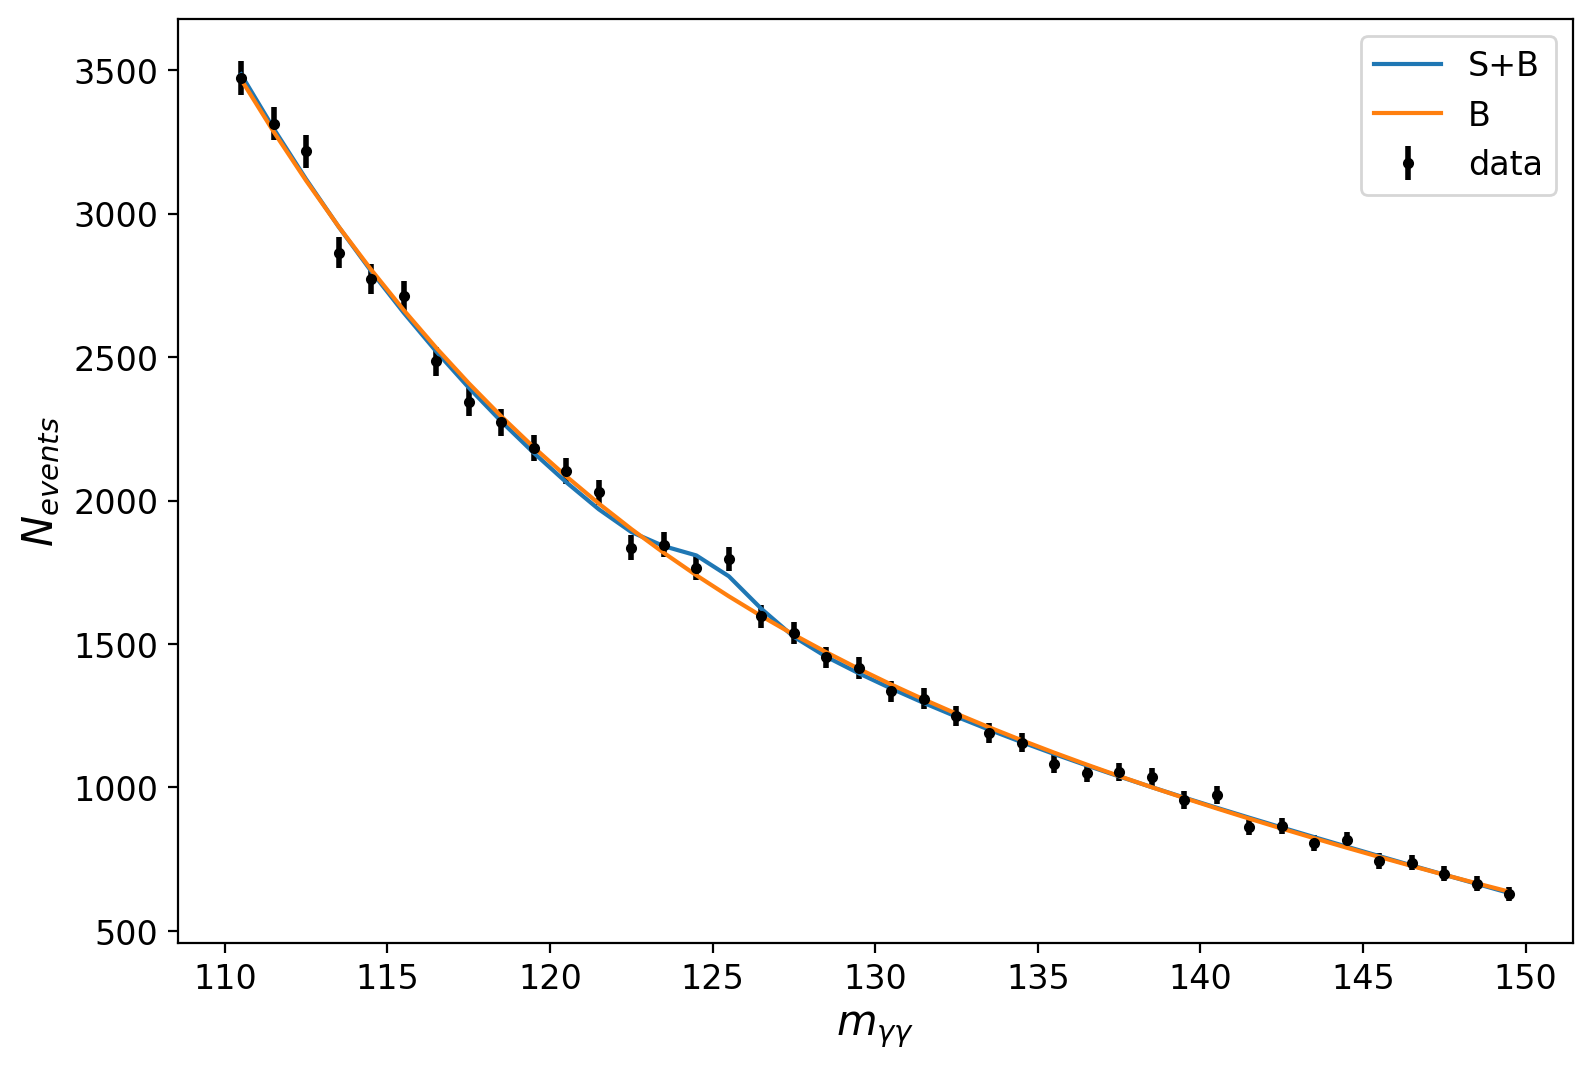

2NLL: 8.213184358916976 p-value 0.004158710550913658


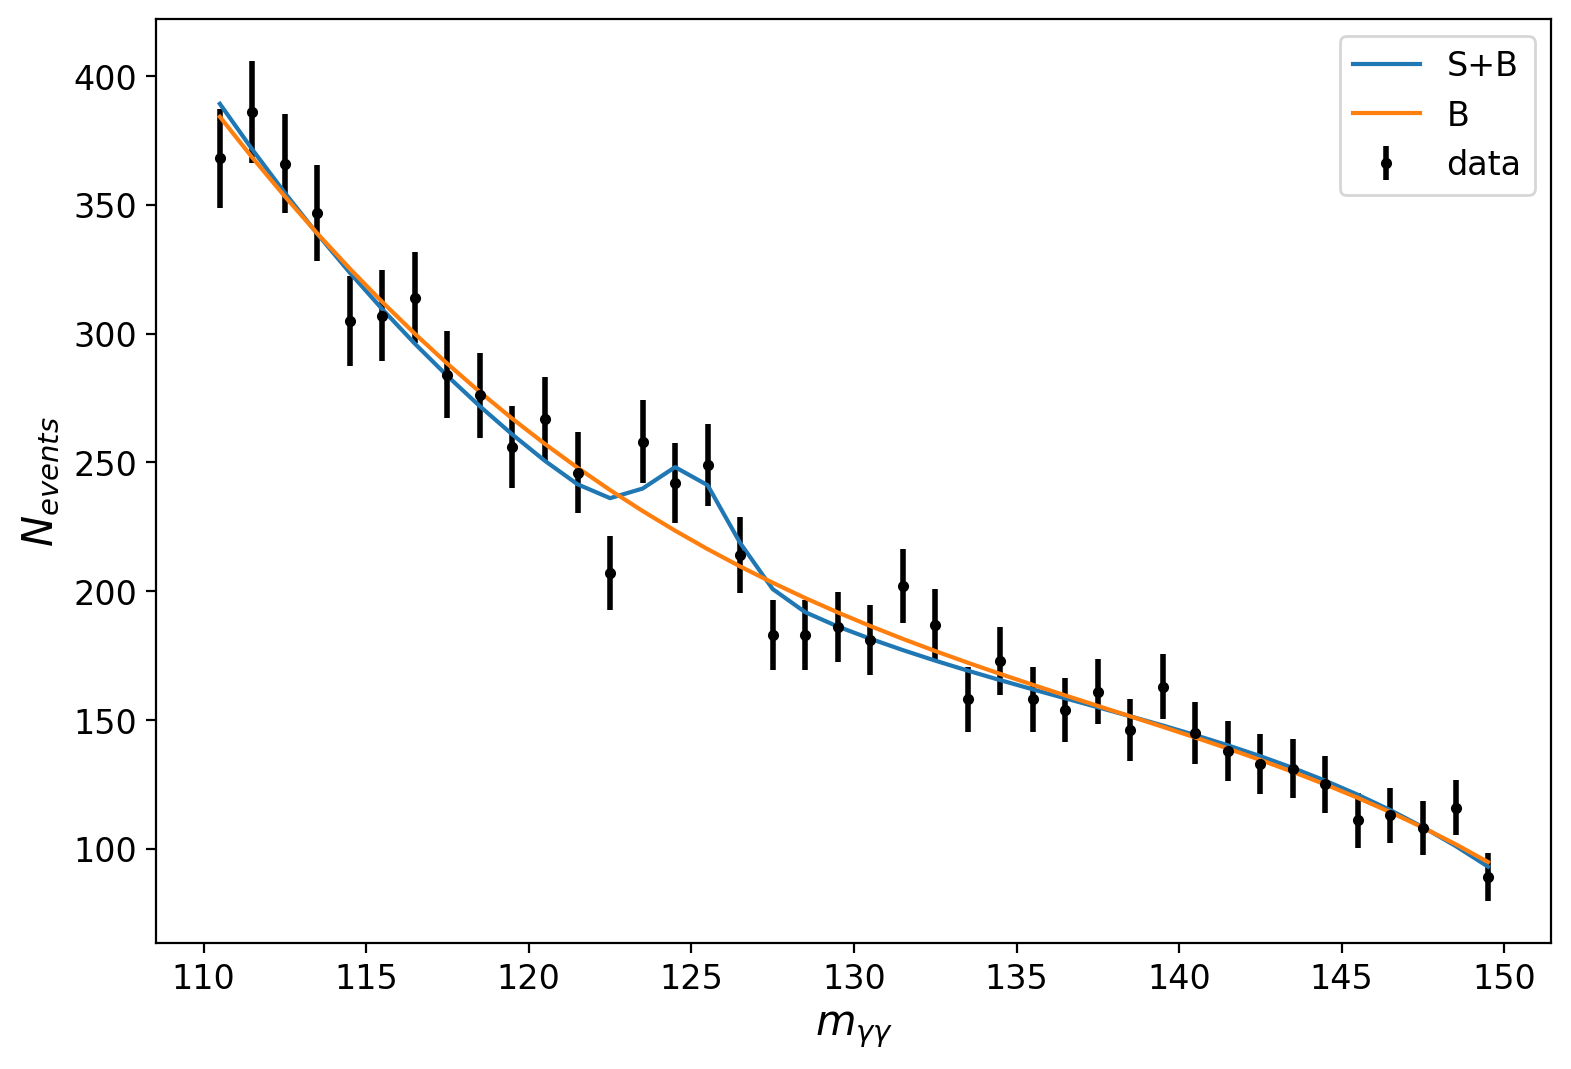

2NLL: 7.483846869878974 p-value 0.006225492453245107


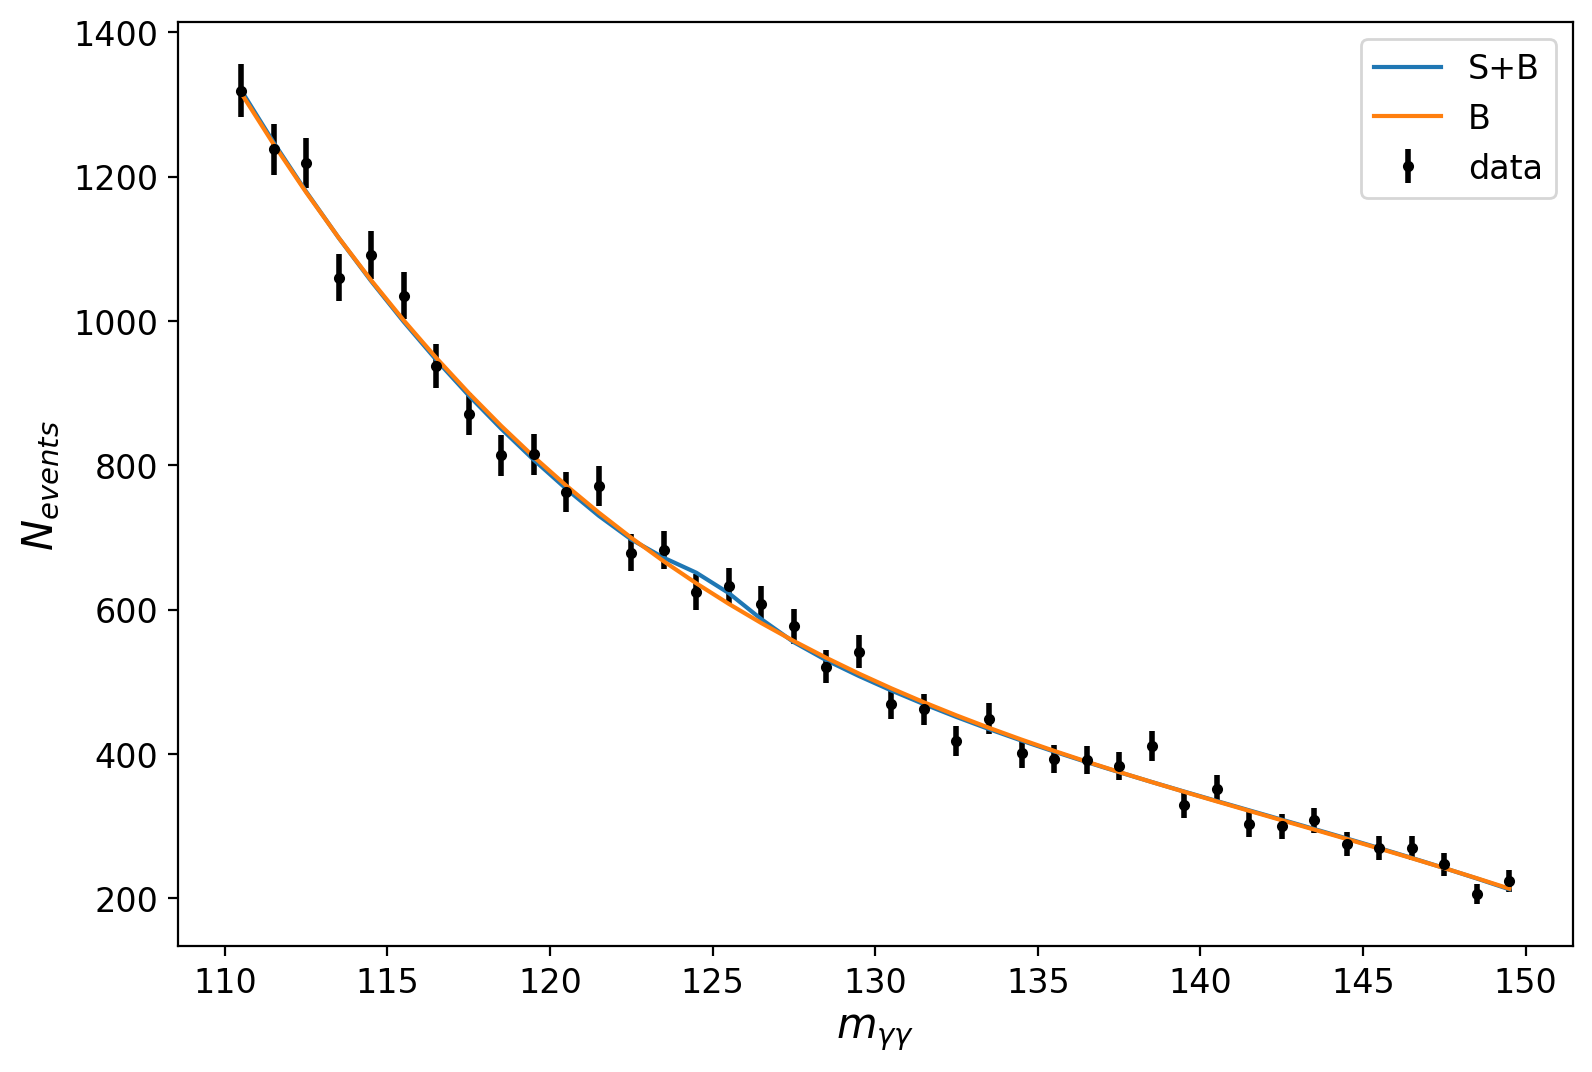

2NLL: 1.0484335987044346 p-value 0.30586811912214484


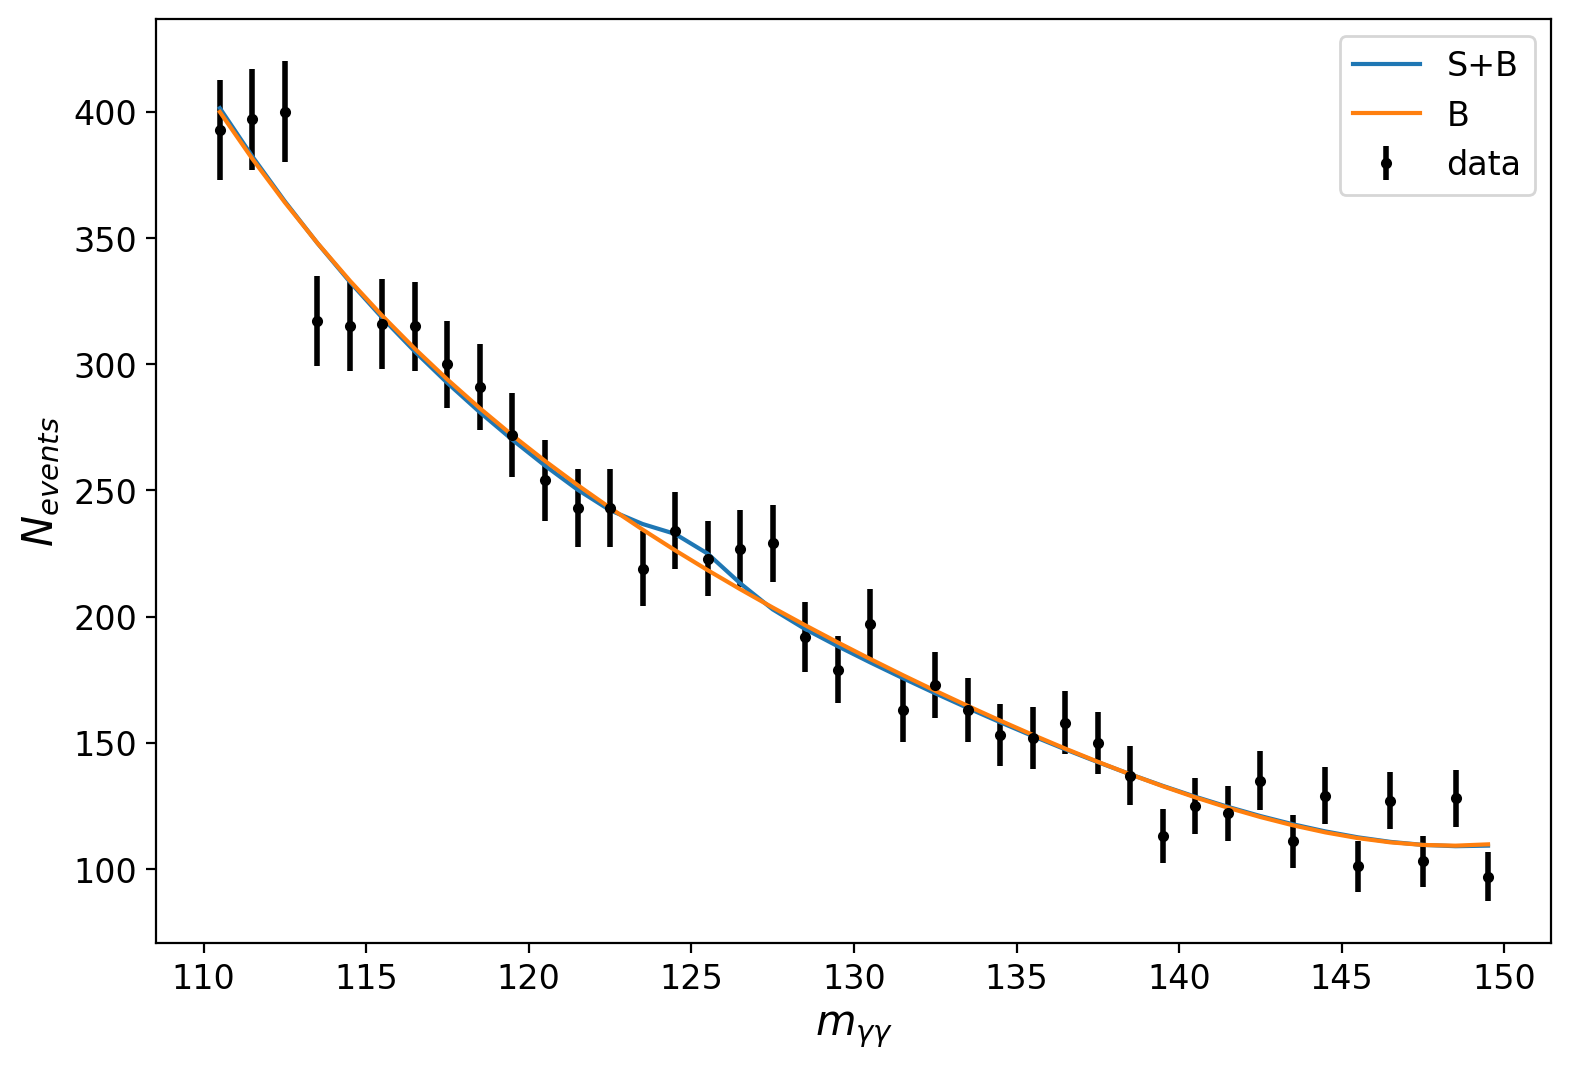

2NLL: 0.5629803445190475 p-value 0.45306190277594016


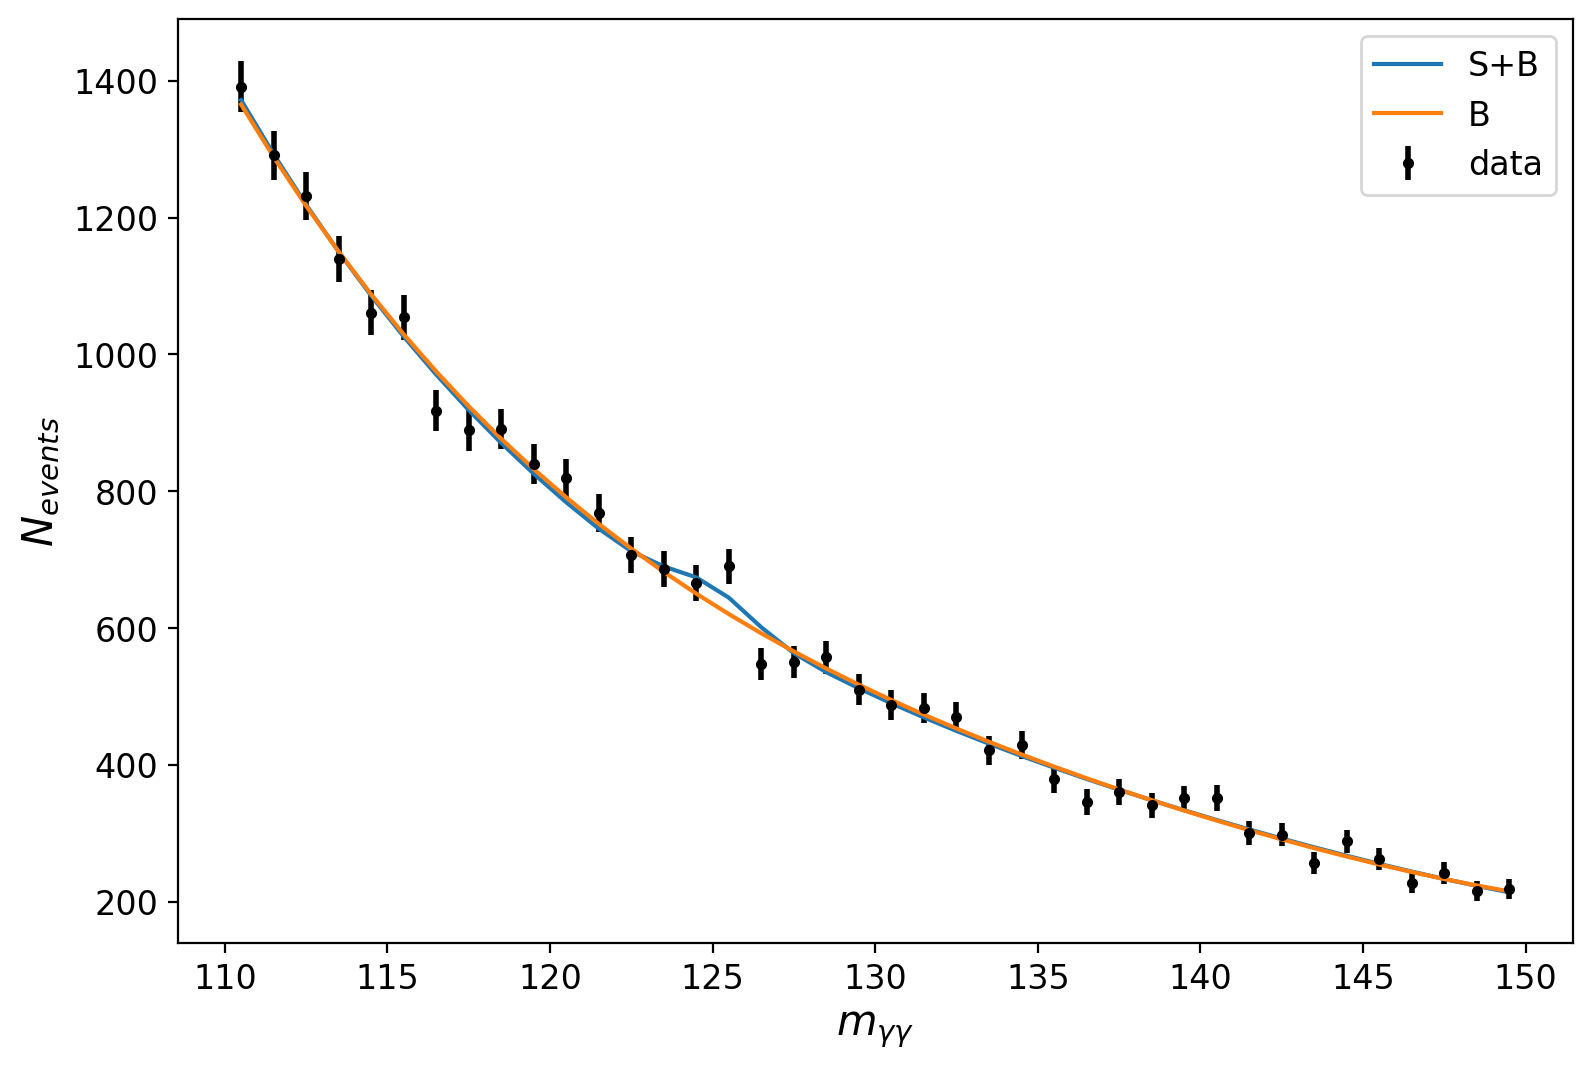

2NLL: 2.5781255552211704 p-value 0.10834989967480646


In [57]:
def sigpol4(x,p0,p1,p2,p3,p4,amp,mass,sigma):
    bkg=pol4(x,p0,p1,p2,p3,p4)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

def sigpol3(x,p0,p1,p2,p3,p4,amp,mass,sigma):
    bkg=pol3(x,p0,p1,p2,p3)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

def sigpol5(x,p0,p1,p2,p3,p4,p5,amp,mass,sigma):
    bkg=pol5(x,p0,p1,p2,p3,p4,p5)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

def fitModel(iX,iY,iWeights,iM,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0,amp=0,mass=iM,sigma=1.2)
    try:
        p["mass"].vary=False
        p["sigma"].vary=False
    except:
      a=1
      #print("Mass and Sigma not in fit")
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    output = model.eval(params=result.params,x=iX)
    return output,result.residual

def fitSig(iLabel,iM,SBfunc,Bfunc,iPlot=False):
    x,y,y_err,weights=load(iLabel)
    resultSB,likeSB=fitModel(x,y,weights,iM,SBfunc)
    resultB, likeB =fitModel(x,y,weights,iM,Bfunc)
    if iPlot:
        plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
        plt.plot(x,resultSB,label="S+B")
        plt.plot(x,resultB, label="B")
        plt.xlabel("$m_{\gamma\gamma}$")
        plt.ylabel("$N_{events}$")
        plt.legend()
        plt.show()
    return np.sum(likeB**2)-np.sum(likeSB**2)

NLL=fitSig("data/out.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out2.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out3.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out4.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out5.txt",125,sigpol4,pol4,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

Wow, we see a fairly significant Higgs bump at 125, but lets scan the mass and make the so called p-value plot. This is just a plot of the significance as a function of mass. What we will do is move the mass distribution peform the same p-value calculation with the fixed signal, and we will make the plot. 

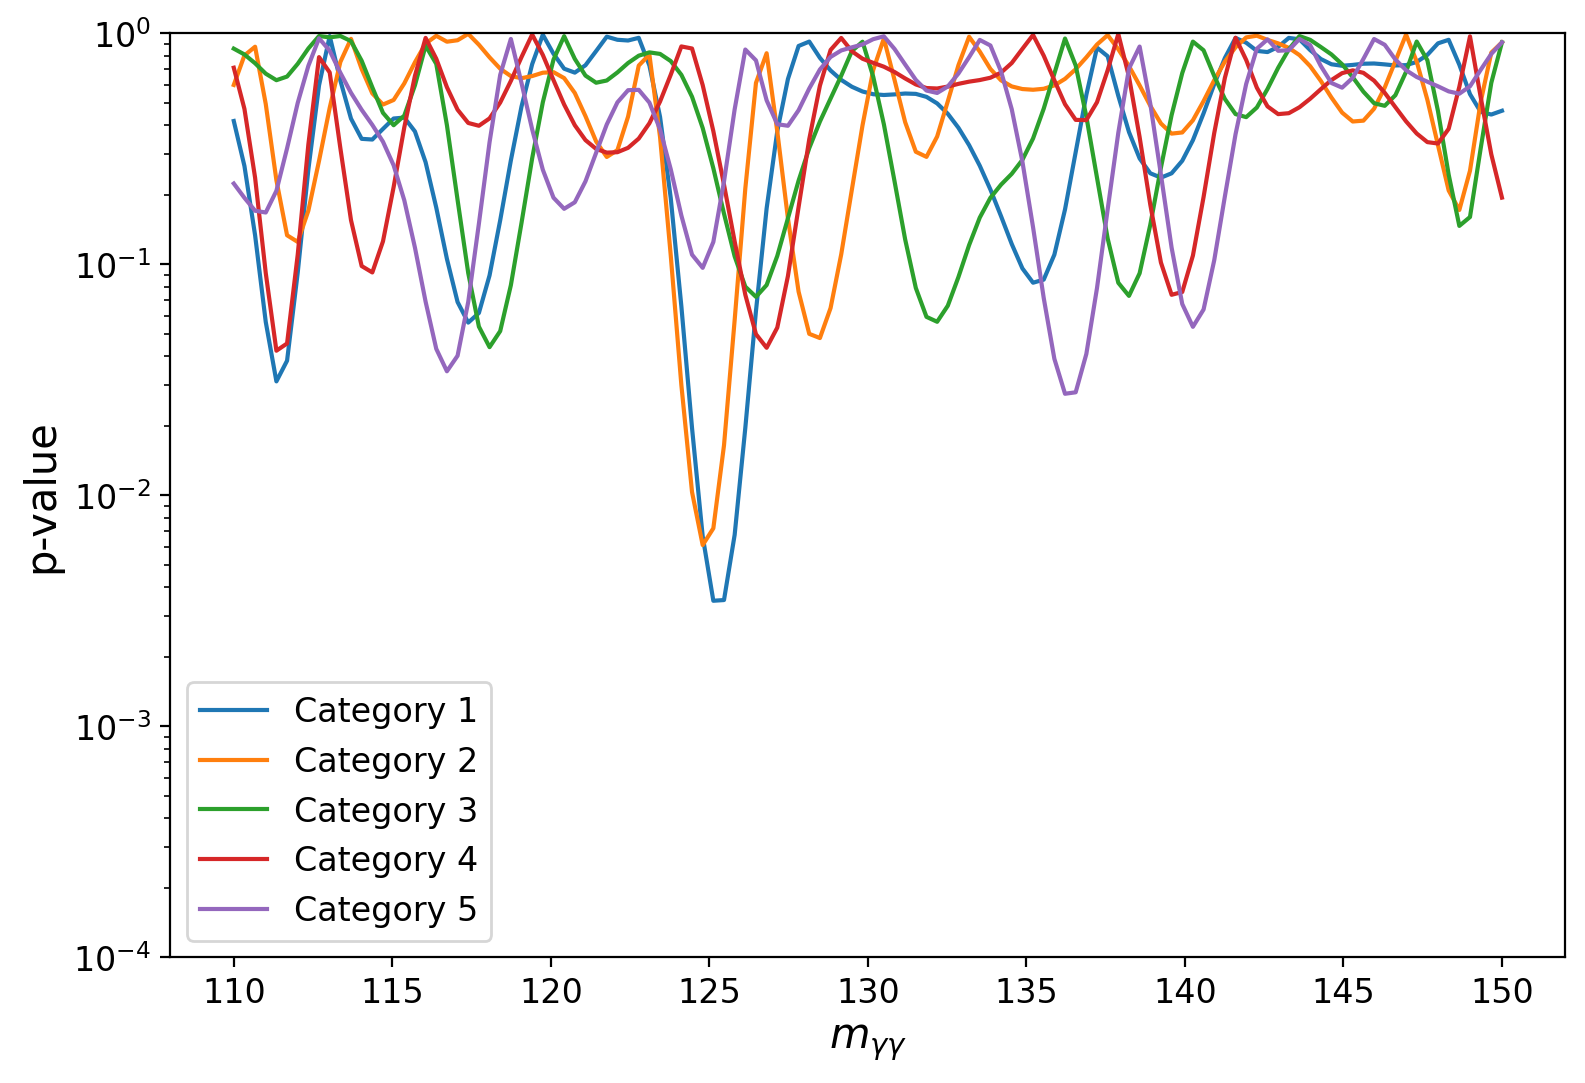

In [58]:
def pvalueCalc(iLabel,pMass,iSBFunc,iBFunc):
    NLL=fitSig(iLabel,pMass,iSBFunc,iBFunc,False)
    NLLp = 1-stats.chi2.cdf(NLL,1)
    return NLLp

def pvaluePlot(iLabel,iSBFunc,iBFunc):
    pvalue = np.array([])
    massrange=np.linspace(110,150,120)
    for pMass in massrange:
        pvalue = np.append(pvalue,pvalueCalc(iLabel,pMass,iSBFunc,iBFunc))
    return massrange,pvalue

m0,p0 = pvaluePlot("data/out.txt",sigpol4,pol4)
m1,p1 = pvaluePlot("data/out2.txt",sigpol4,pol4)
m2,p2 = pvaluePlot("data/out3.txt",sigpol4,pol4)
m3,p3 = pvaluePlot("data/out4.txt",sigpol4,pol4)
m4,p4 = pvaluePlot("data/out5.txt",sigpol4,pol4)

plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.5.1</span>


Compute the Higgs boson p-value signficance plot for category 1 with a 5th order polynomial? How does it compare. 

In [ ]:
def sigpol5(x,p0,p1,p2,p3,p4,p5,amp,mass,sigma):
    sig=#
    bkg=#
    return sig+bkg

m0,p0 = pvaluePlot("out.txt",sigpol5,pol5)
m1,p1 = pvaluePlot("out2.txt",sigpol5,pol5)
m2,p2 = pvaluePlot("out3.txt",sigpol5,pol5)
m3,p3 = pvaluePlot("out4.txt",sigpol5,pol5)
m4,p4 = pvaluePlot("out5.txt",sigpol5,pol5)

plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()

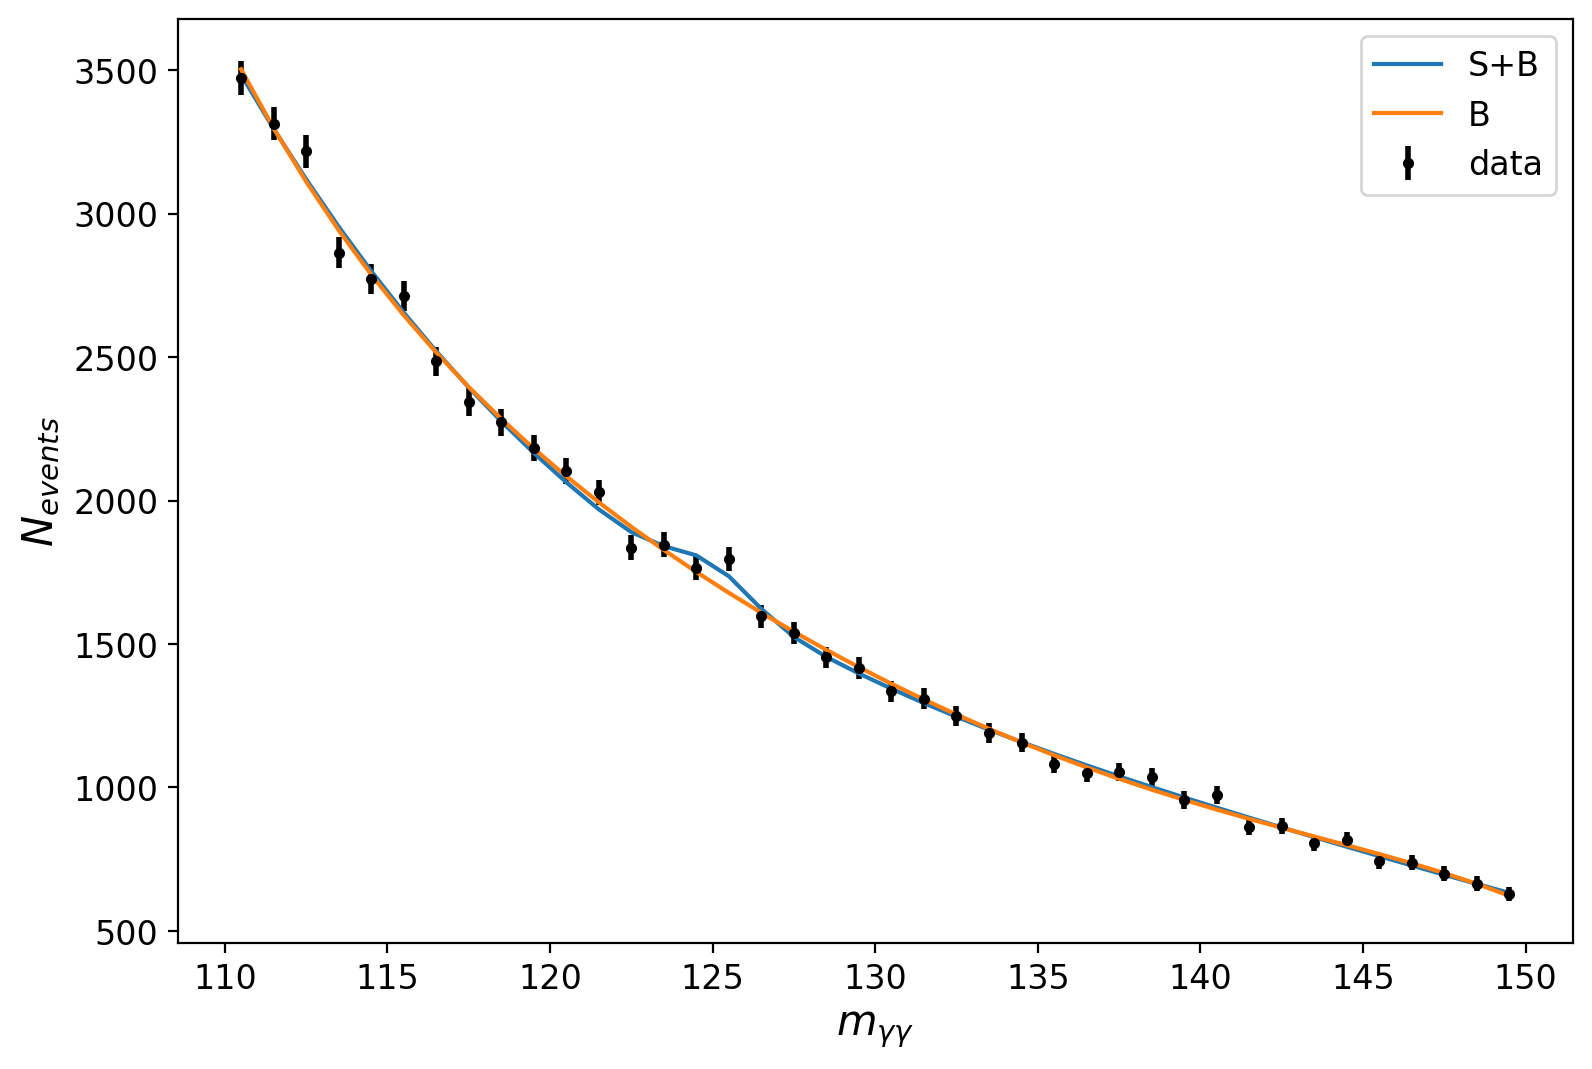

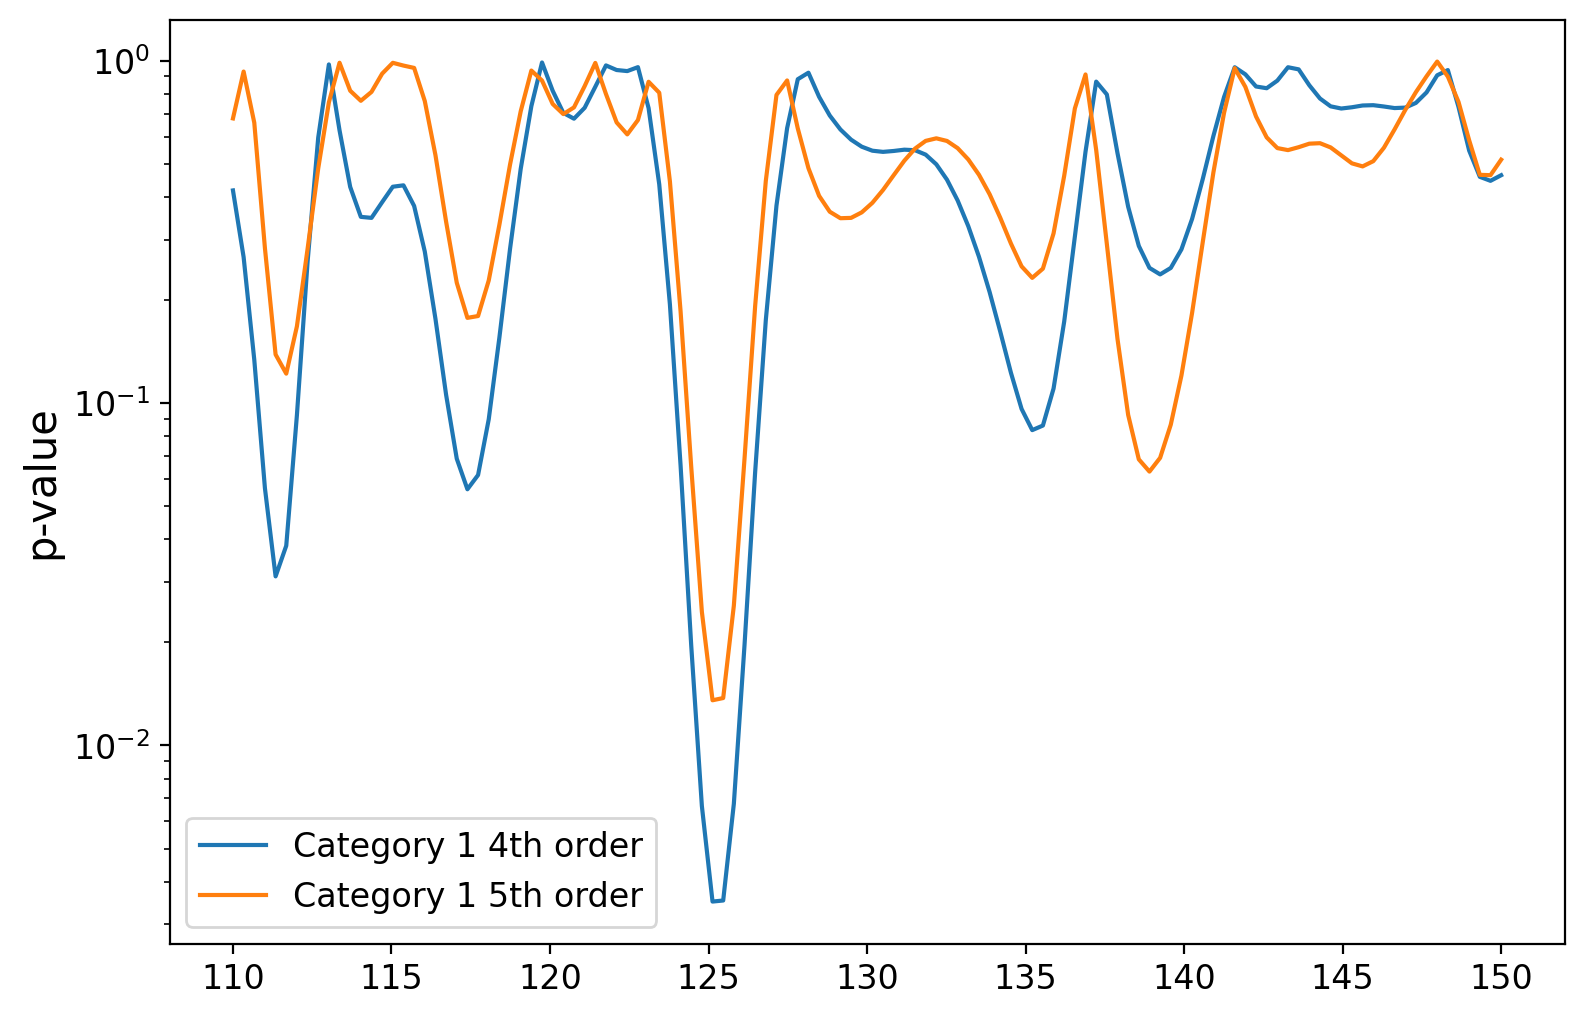

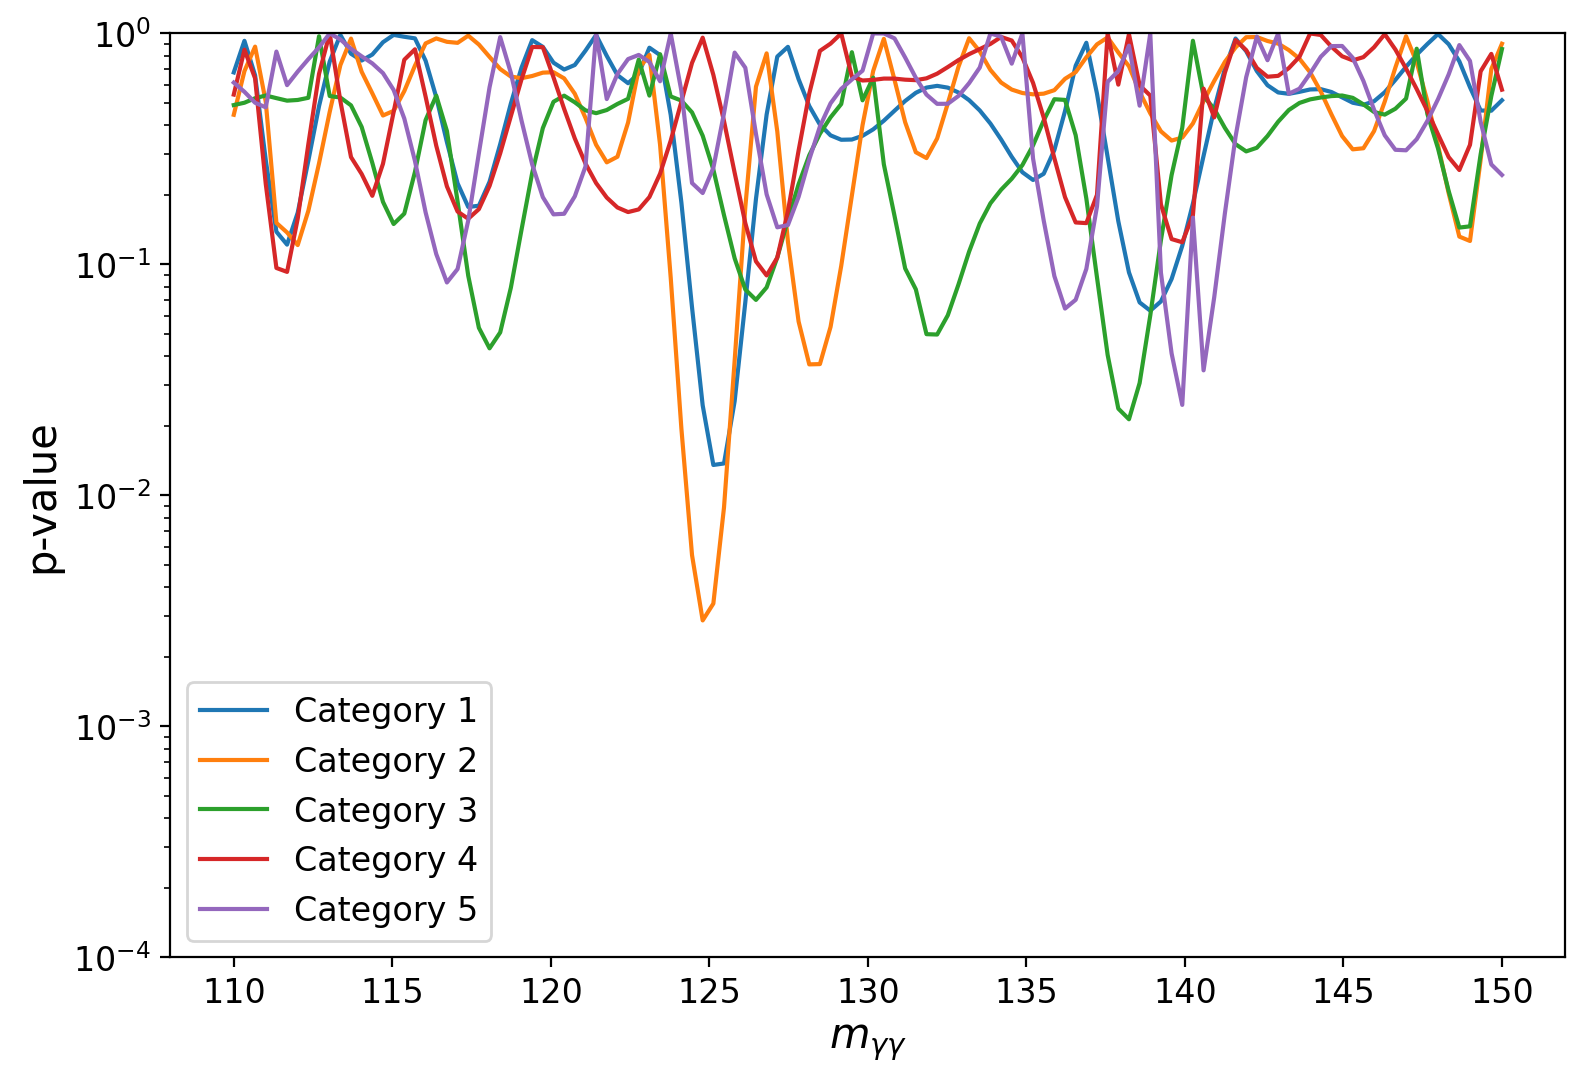

In [59]:
def pol5(x, p0, p1,p2,p3,p4,p5):
    pols=[p0,p1,p2,p3,p4,p5]
    y = np.polyval(pols,x)
    return y

def sigpol5(x,p0,p1,p2,p3,p4,p5,amp,mass,sigma):
    bkg=pol5(x,p0,p1,p2,p3,p4,p5)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg


#answer
NLL=fitSig("data/out.txt",125,sigpol5,pol5,True)

m03,p03 = pvaluePlot("data/out.txt",sigpol5,pol5)
plt.plot(m0,p0,label="Category 1 4th order")
plt.plot(m03,p03,label="Category 1 5th order")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()

#Now just for fun, lets run the full p-value plot
m0,p0 = pvaluePlot("data/out.txt",sigpol5,pol5)
m1,p1 = pvaluePlot("data/out2.txt",sigpol5,pol5)
m2,p2 = pvaluePlot("data/out3.txt",sigpol5,pol5)
m3,p3 = pvaluePlot("data/out4.txt",sigpol5,pol5)
m4,p4 = pvaluePlot("data/out5.txt",sigpol5,pol5)

plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Less Significant
</pre>
        
**EXPLANATION:**
When you fit with more degrees of freedom, you start to lose sensitivity. The choice of freedom of the function is critical to ensure good sensitivity. 
    
</div>


<a name='section_11_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.6 Combining p-values</h2>  


Now, if we have 5 experiments each giving a p-value at a specific mass point. How, do we combine these p-values. The strategy is to realize these are each independent experiments. Moreover, it can be shown that if you have a flat prior in probability, and if you take the log of this prior and multiply by 2 $2\log(p)$ this distribution is approximately that of a $\chi^{2}$ distribution of 2 degrees of freedom.  That is to say if you have N categories each with equal sensitivity to a signal (flat prior in probability to be in any category), the the sum of the $2\log(p)$ of the categories gives us a $\chi^{2}$ distribution. 


We can see this analytically by noting that $\chi^{2}$ distribution is given by 

\begin{equation}
\chi^{2}(x,\nu) = \frac{1}{2^{\nu/2}\Gamma(\nu/2)} x^{\nu/2-1}e^{-x/2}
\end{equation}

For $\nu=2$, we have it is just a an exponential distribution given by:

\begin{equation}
\chi^{2}(x,\nu=2) = \frac{1}{2}e^{-x/2}
\end{equation}

Now for a distribution that is flat is distribution from 0 to 1, such as the $p-value$ of a random measurement. Then if we take the log of that, we find
\begin{equation}
 y = -2\log(x)\rightarrow e^{-\frac{y}{2}}=x \\
 dx = -\frac{1}{2}e^{\frac{-y}{2}} dy \\
\end{equation}
To equate probability distributions, we want to solve for scenario where the probabilities over a range are equal, namely, to get it as a function of $y$, we can write, noting $p(x)=1$
\begin{equation}
 p(y) dy = p(x) dx \\
 p(y) = p(x) \frac{dx}{dy}\\
 p(y) = p(f^{-1}(y)) \frac{dx}{dy}\\
 p(y) = \frac{dx}{dy} \\
 p(y)=e^{-\frac{y}{2}} \\
\end{equation}
or for $x$ a flat probability distribution from 0 to 1, we have that $y$ has to be distributed such that $p(y)=e^{-\frac{y}{2}}$ 

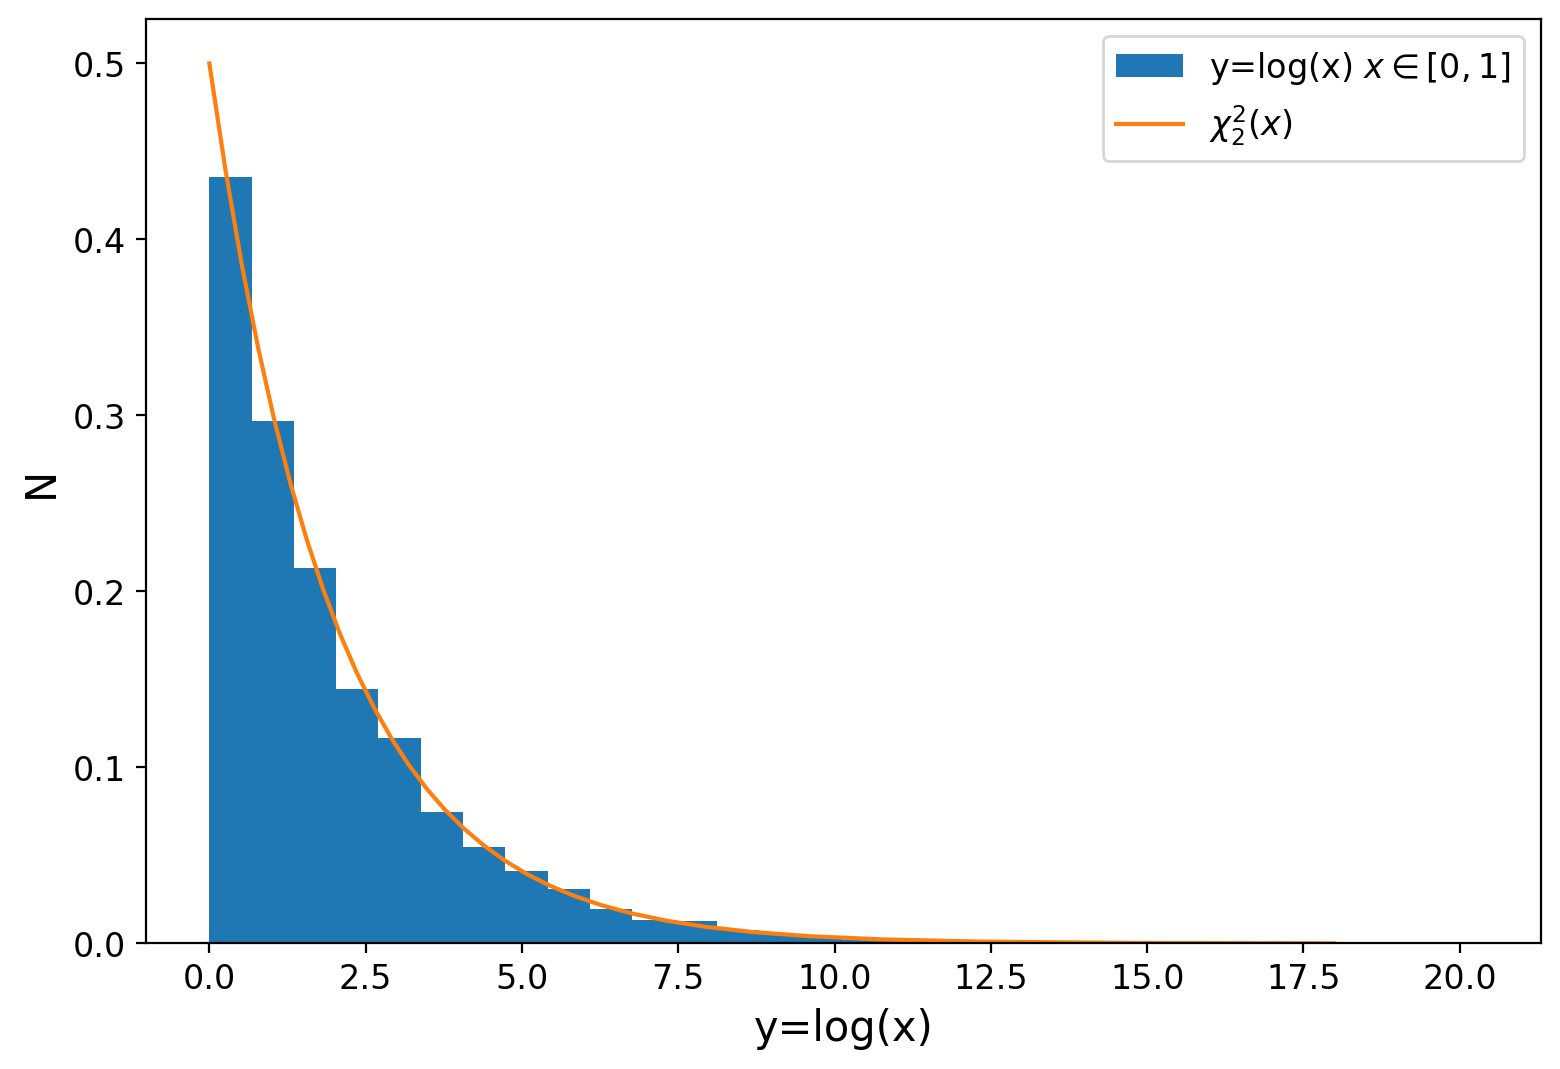

In [60]:
xvals=np.arange(0,18,0.01)
samples = np.random.uniform(0,1,10000)
plt.hist(-2.*np.log(samples),bins=30,density=True,label='y=log(x) $x\in[0,1]$')
plt.plot(xvals,stats.chi2.pdf(xvals,2),label='$\chi^{2}_{2}(x)$')
plt.xlabel("y=log(x)")
plt.ylabel("N")
plt.legend()
plt.show()

Now going back to our calculation, we can immediately relate 
\begin{equation}
\chi^{2}_{\nu=2} = -2 \log(p_{i})
\end{equation}
Now, lets say we have $n$ measurements each with probability $p_{i}$ for the i-th category. If we take the $2\log(p_{i})$ and sum the distributions, we have a sum of $\chi^{2}$ distributions of 2 degrees of freedom. This is just a $\chi^{2}_{\nu=2n}$ distribution. 

\begin{equation}
\chi^{2}_{\nu=2n} = -2 \sum_{i=1}^{n} \log(p_{i})
\end{equation}

From this relation, we can immediately get the combined p-value by checking up the p-value of a $\chi^{2}_{\nu=2n}$ distribution.  Lets see this in action!

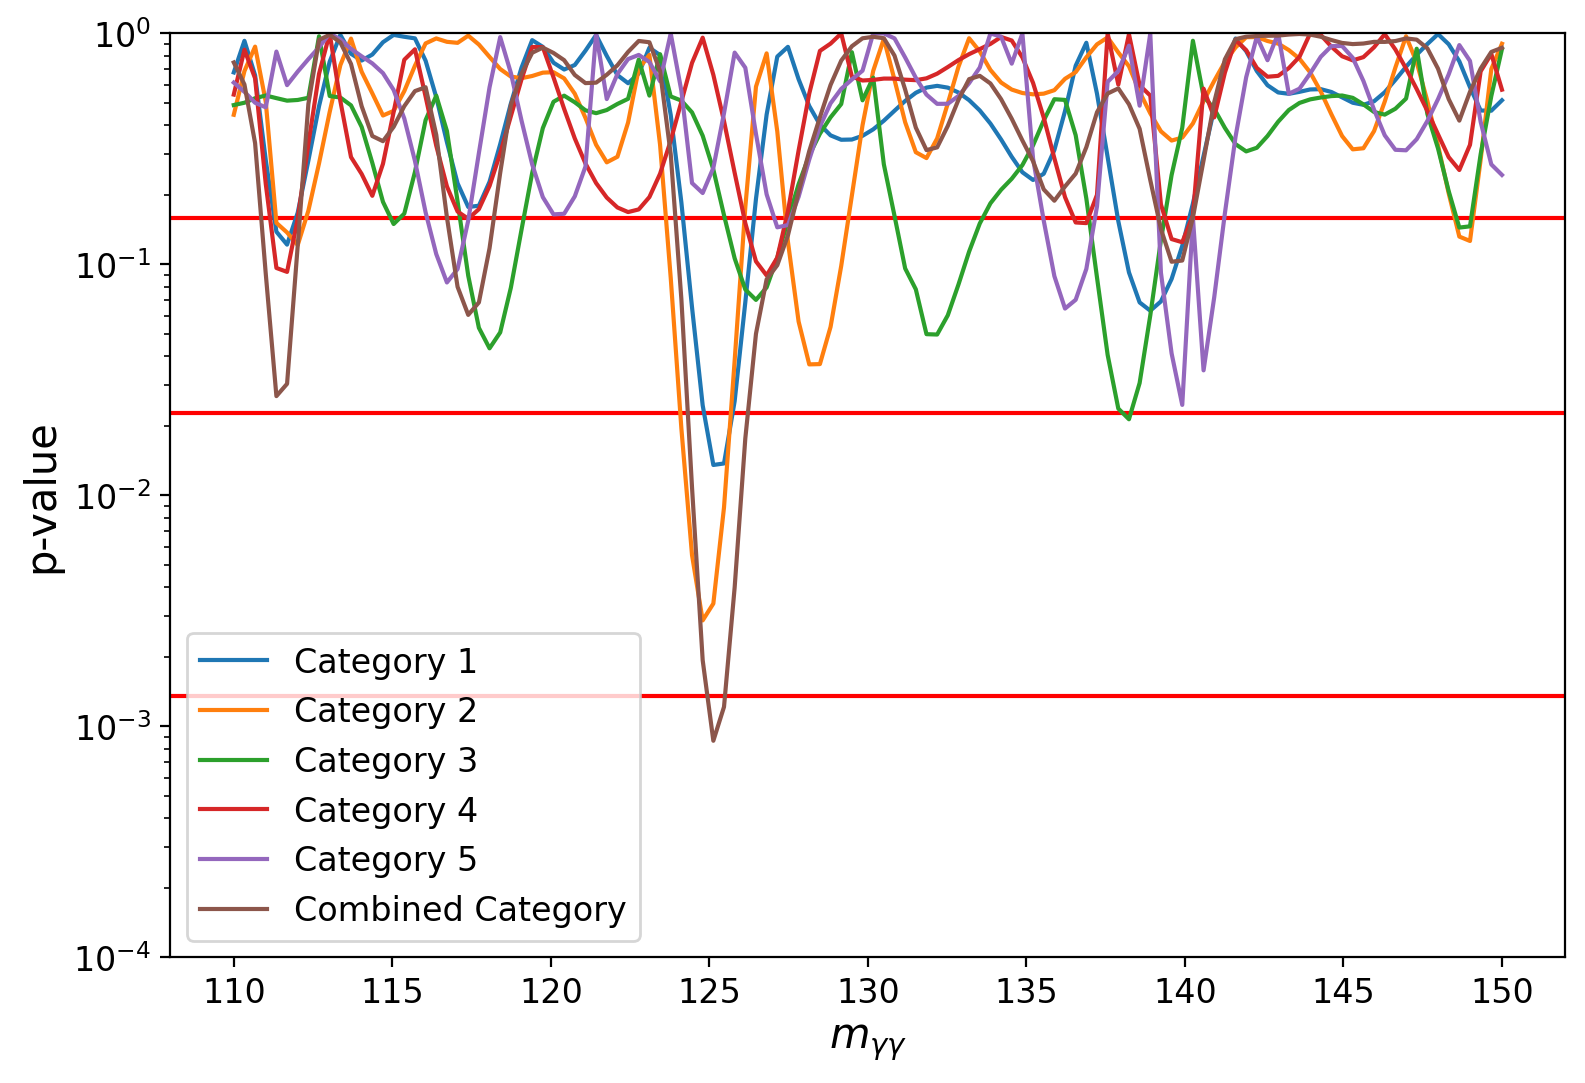

In [61]:
def pvalueCalc(iLabel,pMass,iSBFunc,iBFunc):
    logp=0
    for pLabel in iLabel:
        NLL=fitSig(pLabel,pMass,iSBFunc,iBFunc,False)
        NLLp = 1.-stats.chi2.cdf(NLL,1)
        logp = logp - 2.*np.log(NLLp)
    pPVal  = 1-stats.chi2.cdf(logp,2*len(iLabel))
    return pPVal

files=["data/out.txt","data/out2.txt","data/out3.txt","data/out4.txt","data/out5.txt"]
mC,pC = pvaluePlot(files,sigpol4,pol4)

for pVal in range(4):
    sigmas = 1-stats.norm.cdf(pVal+1)
    plt.axhline(y=sigmas, color='r', linestyle='-')
plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.plot(mC,pC,label="Combined Category")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()


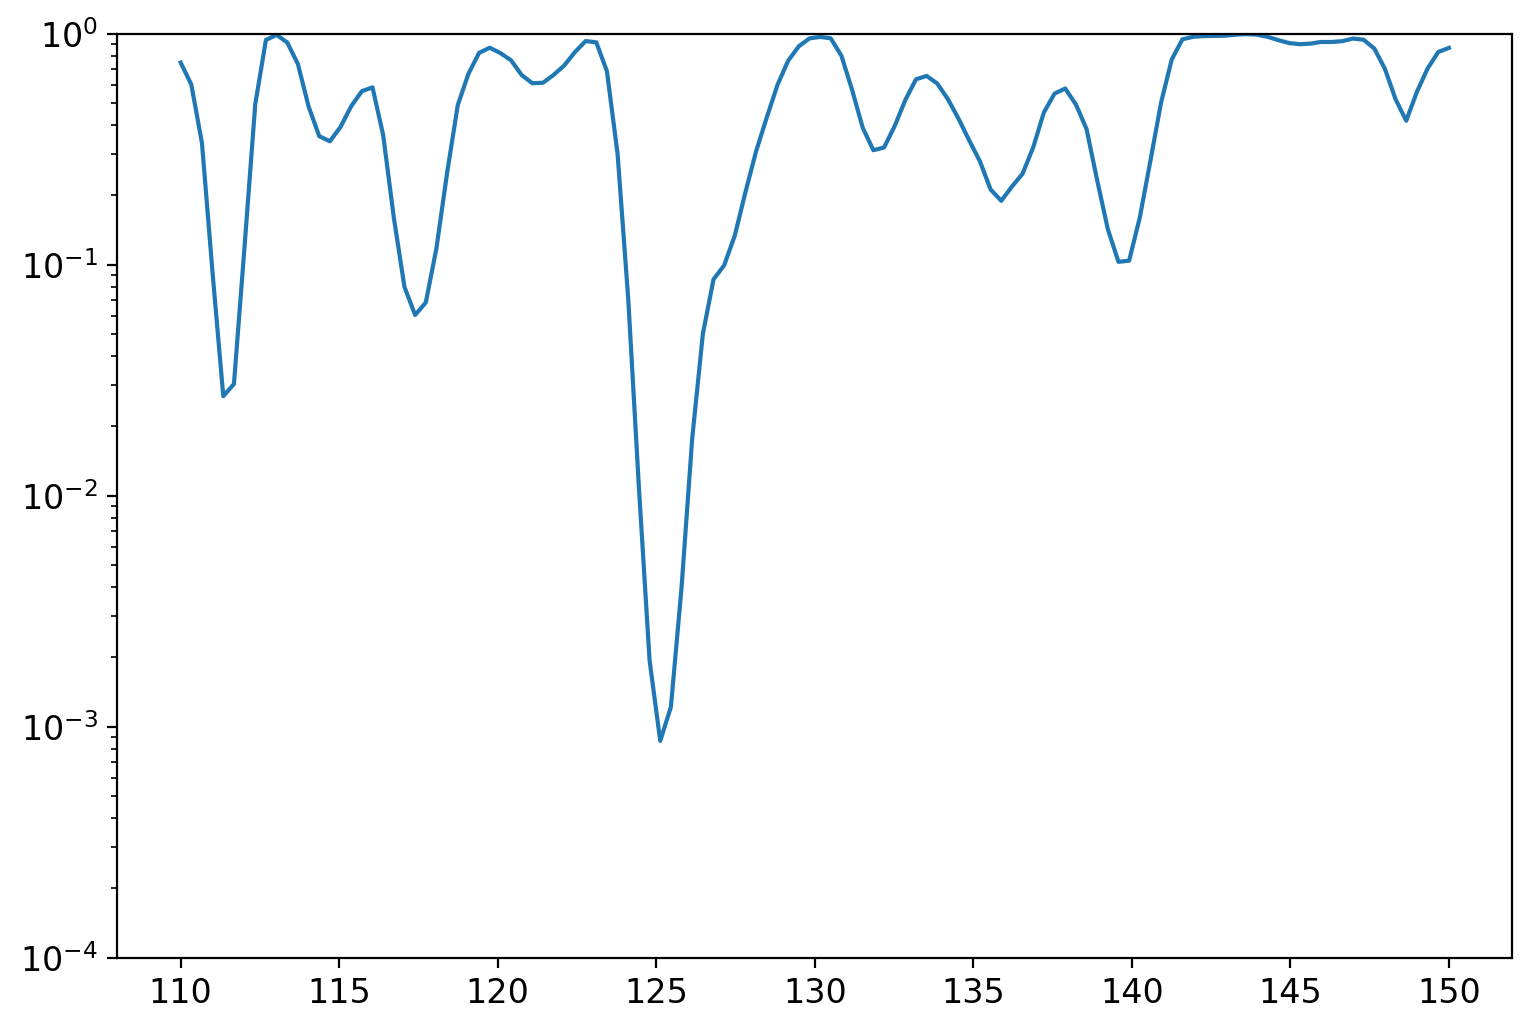

In [62]:
plt.plot(mC,pC,label="Category 1")
plt.ylim((0.0001,1))
plt.yscale("log")

Ok, now that we have done that, lets compare our result for the 8TeV measurement in the original paper [here](https://arxiv.org/pdf/1407.0558.pdf). If you look at that plot, you will see that there is a significance of almost 4 standard deviations for the 8TeV data, whereas we only have 3 standard deviations. The reason is that the analysis in the paper is more complicated. To compare our result with something closer, look at the Higgs discovery [paper](https://arxiv.org/pdf/1207.7235.pdf). Here, we are more sensitive, but we also have more data. 

The way the analysis is more complicated is because of the fact that the combination we are doing here is naive. We are assuming all the categories contribute equally. In reality, we know that from simulation of the signal that the relative contributions of each category is not flat, but weighted. As a consequnce, the trick in this section really only works to get an "approximate" sensitivity. The real way to do this is to simultaneously fit all categories with the known, relative signal strength of each of the categories. 

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.6.1</span>

Noting that the p-value on the y-axis is just a translation of the likelihood, and the p-value is computed from a $\chi^{2}$ distribution, convert from $\chi^{2}$ probability back to 2$\log(\mathcal{L})$, from this compute the best fit mass for the Higgs boson? How does it compare to the true value



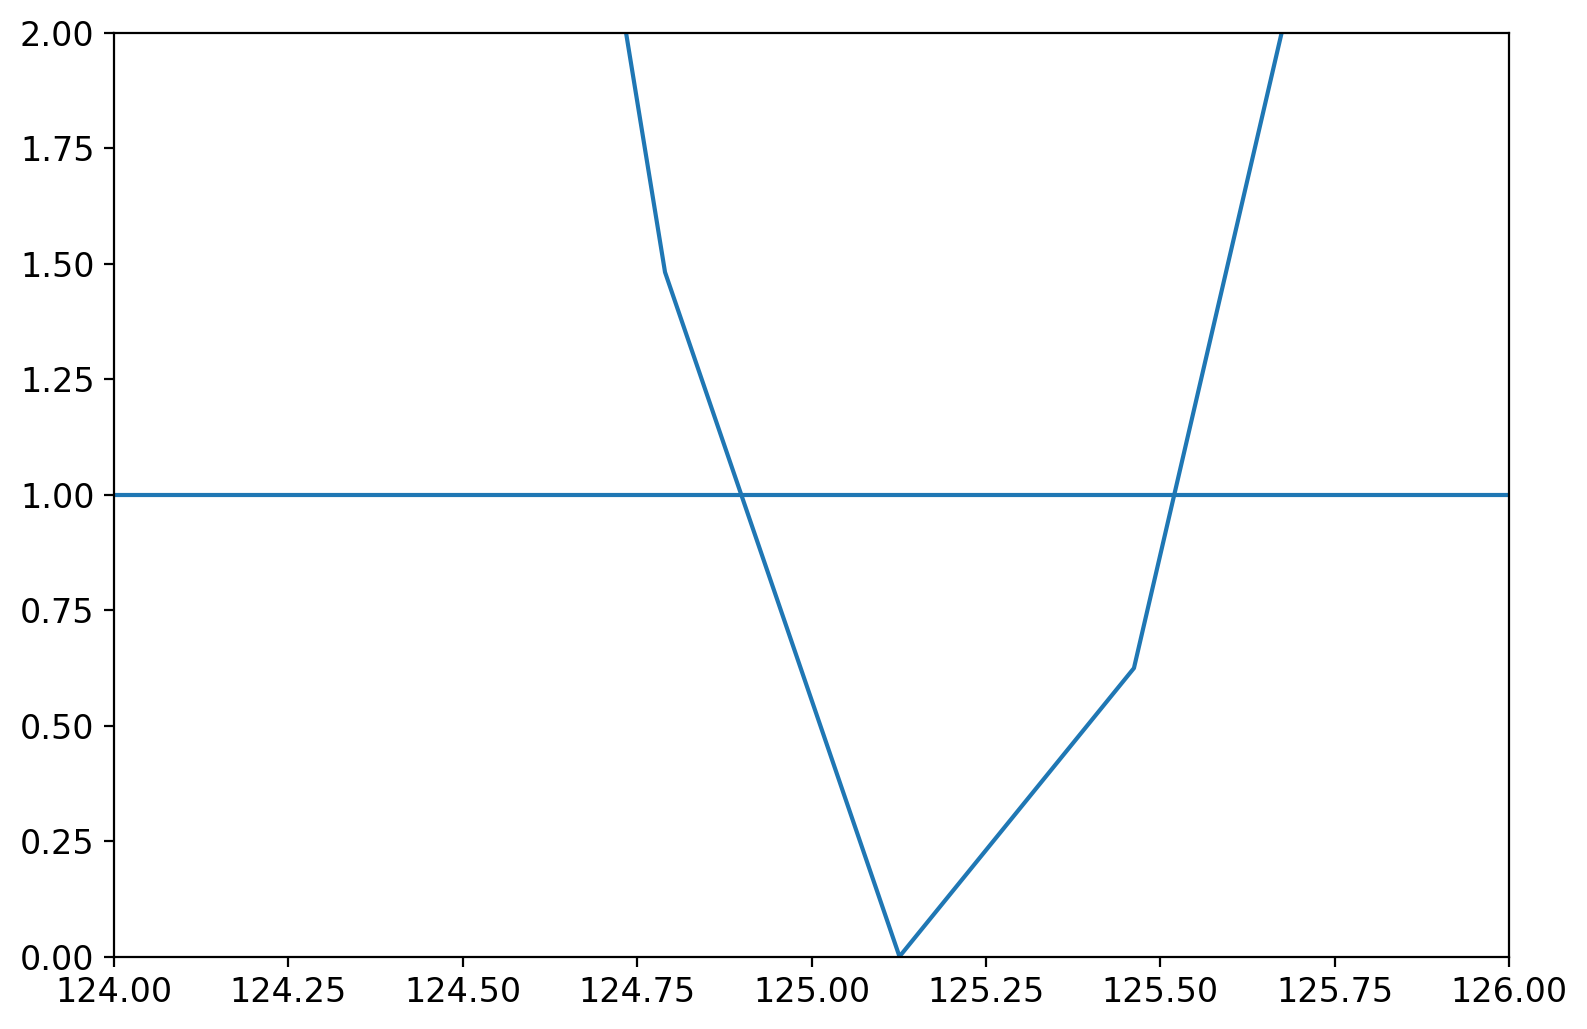

In [63]:
#Answer, the strategy here is to realize that p-value plot is also 2*Log(L) of our best fit, thus, we just need to go 1 standard deviation from the minimum in likelihood
logC = stats.chi2.ppf(1-pC,1)
logC = -logC+np.max(logC)
plt.plot(mC,logC,label="Combined")
plt.ylim(0,2)
plt.xlim(124,126)
plt.hlines(1,120,130)
plt.show()
#Its roughly 124.8-125.5 => 125.2+/-0.35 (Its almost spot on!)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Our best fit mass is from 124.8 to 125.5 => 125.2 +/- 0.35 (almost spont on!)
</pre>
        
**EXPLANATION:**
We can obtain this by noting that the p-value is jsut a translation of the minimum likelihood. So we just need to convert from p-value back to likelihood and scan 2$\log(\mathcal{L})$, and viola. 
    
</div>


<a name='section_11_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.7 Function choice </h2>  

Now, we chose a background function based on a [power law](https://en.wikipedia.org/wiki/Power_law) others you can consider are the [laurent polynomials](https://en.wikipedia.org/wiki/Laurent_polynomial). This will just be taking $x^{-j}$ instead of $x^{j}$. The point for this is that the choice that we made to fit the function had some level of aribratriness. What would our fit performance be if we just chose another fit function somewhat at ranodm? In fact, more generally, if we have another fit function that works, which one is best? 

This section we will try to address this arbitrariness by noting how these fits behave in general. Let's take a deeper dive into what is going on. we are goin to make a set of progressive more complciated functions


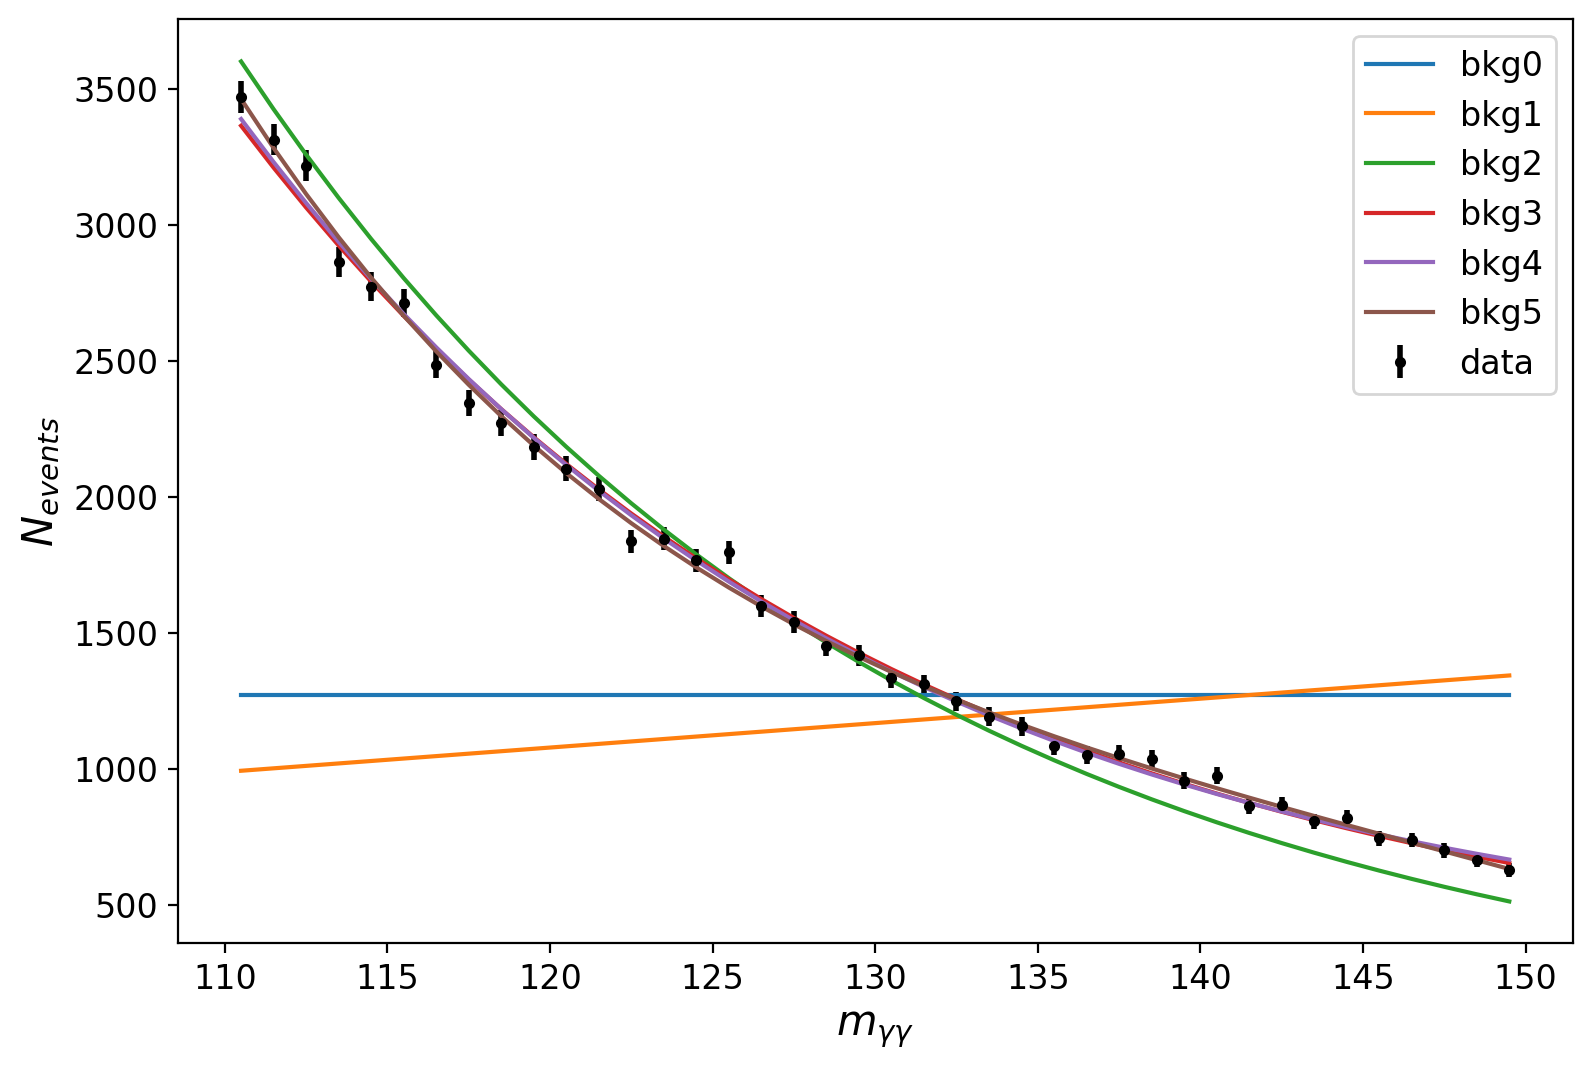

f 1 to 0: 1.0
f 2 to 1: 1.1102230246251565e-16
f 3 to 2: 2.3314683517128287e-14
f 4 to 3: 0.049621250239942016
f 5 to 4: 0.00043948552732475665
Mean: 4.21387638786741 	STD: 17.765714486207152 chi2 prob: 0.0
Mean: 6.393929910480218 	STD: 19.928077547340102 chi2 prob: 0.0
Mean: 0.9237579360159494 	STD: 3.0346624184515125 chi2 prob: 0.0
Mean: 0.007078860911581958 	STD: 1.1074722215457389 chi2 prob: 0.07196632760077637
Mean: 0.012484204872860899 	STD: 1.084579911101066 chi2 prob: 0.0837265228057622
Mean: 0.010119513924247255 	STD: 0.9159905502043955 chi2 prob: 0.48877409810150074


In [64]:
def bkg1(x,p0,p1):
    pols=[p0,p1]
    y=np.polyval(pols,x)
    #y=np.exp(-p0*(x-p1))
    return y

def bkg2(x, p0,p1,p2):
    #pols=[p0,p1,p2]
    #y=np.polyval(pols,x)
    y=p0*np.exp(-p1*(x-p2))
    return y

def bkg3(x, p0, p1,p2,p3):
    #pols=[p0,p1,p2,p3]
    y=p0*np.exp(-p1*(x-p2))+p3
    return y

def bkg4(x, p0, p1,p2,p3,p4):
    pols=[p3,p4]
    y=p0*np.exp(-p1*(x-p2))+np.polyval(pols,x)
    return y

def bkg5(x, p0, p1,p2,p3,p4,p5):
    pols=[p3,p4,p5]
    y=p0*np.exp(-p1*(x-p2))+np.polyval(pols,x)
    return y

def fitModel(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0.05,p2=100,p3=0.05,p4=0,p5=0)
    try:
        p['p1'].vary=False
    except:
        a=1
    try:
        p['p2'].vary=False
    except:
        a=1
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    #lmfit.report_fit(result)
    output = model.eval(params=result.params,x=iX)
    return output

def fitAll(iLabel,iPlot=False):
    x,y,y_err,weights=load(iLabel)
    result0 = fitModel(x,y,weights,pol0)
    result1 = fitModel(x,y,weights,bkg1)
    result2 = fitModel(x,y,weights,bkg2)
    result3 = fitModel(x,y,weights,bkg3)
    result4 = fitModel(x,y,weights,bkg4)
    result5 = fitModel(x,y,weights,bkg5)

    if iPlot:
        plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
        plt.plot(x,result0,label="bkg0")
        plt.plot(x,result1,label="bkg1")
        plt.plot(x,result2,label="bkg2")
        plt.plot(x,result3,label="bkg3")
        plt.plot(x,result4,label="bkg4")
        plt.plot(x,result5,label="bkg5")
        plt.xlabel("$m_{\gamma\gamma}$")
        plt.ylabel("$N_{events}$")
        plt.legend()
        plt.show()
    return x,y,y_err,result0,result1,result2,result3,result4,result5

#just showing 4 since its the hardest to fit
fitAll("data/out.txt",True)
ftestAll("data/out.txt")
chi2testAll("data/out.txt")

So from above, a the second order constant + power law and a linear term is sufficient to fit he data both whith a good $\chi^{2}$ and a good f-test. Notice the f-test is not perfect higher orders. In any case, lets go ahaed and chose this function, and see how this changes our significance? 

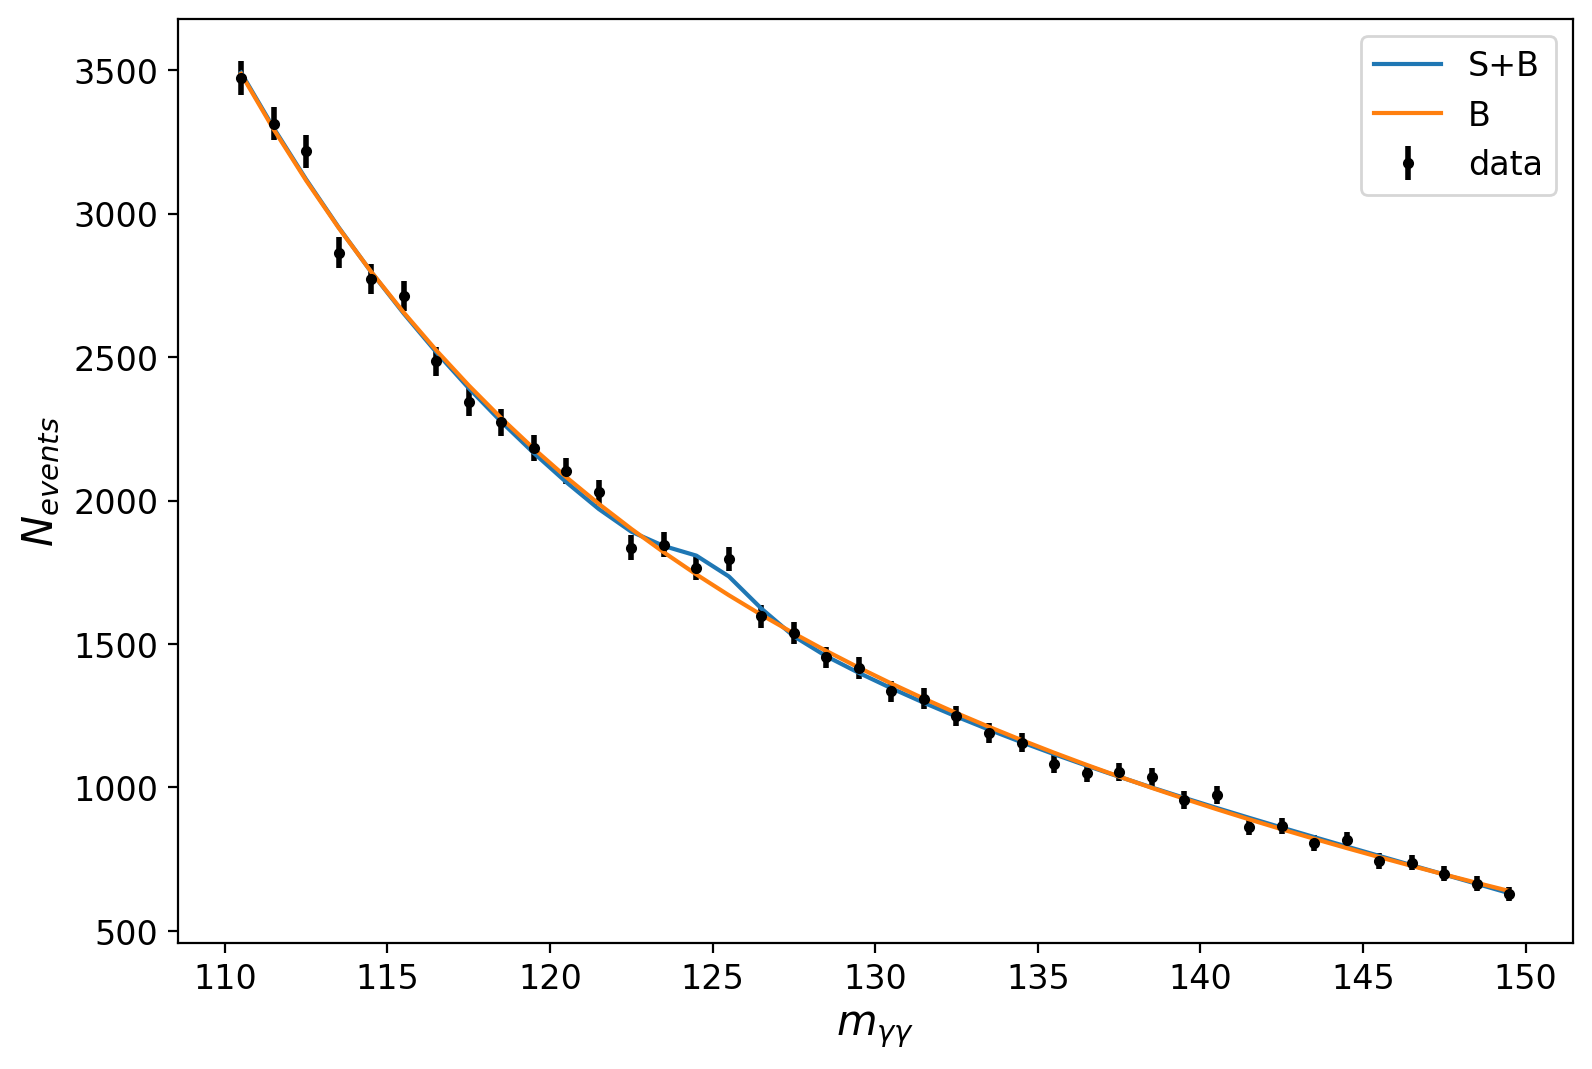

2NLL: 7.464852594191392 p-value 0.0062915182772264044


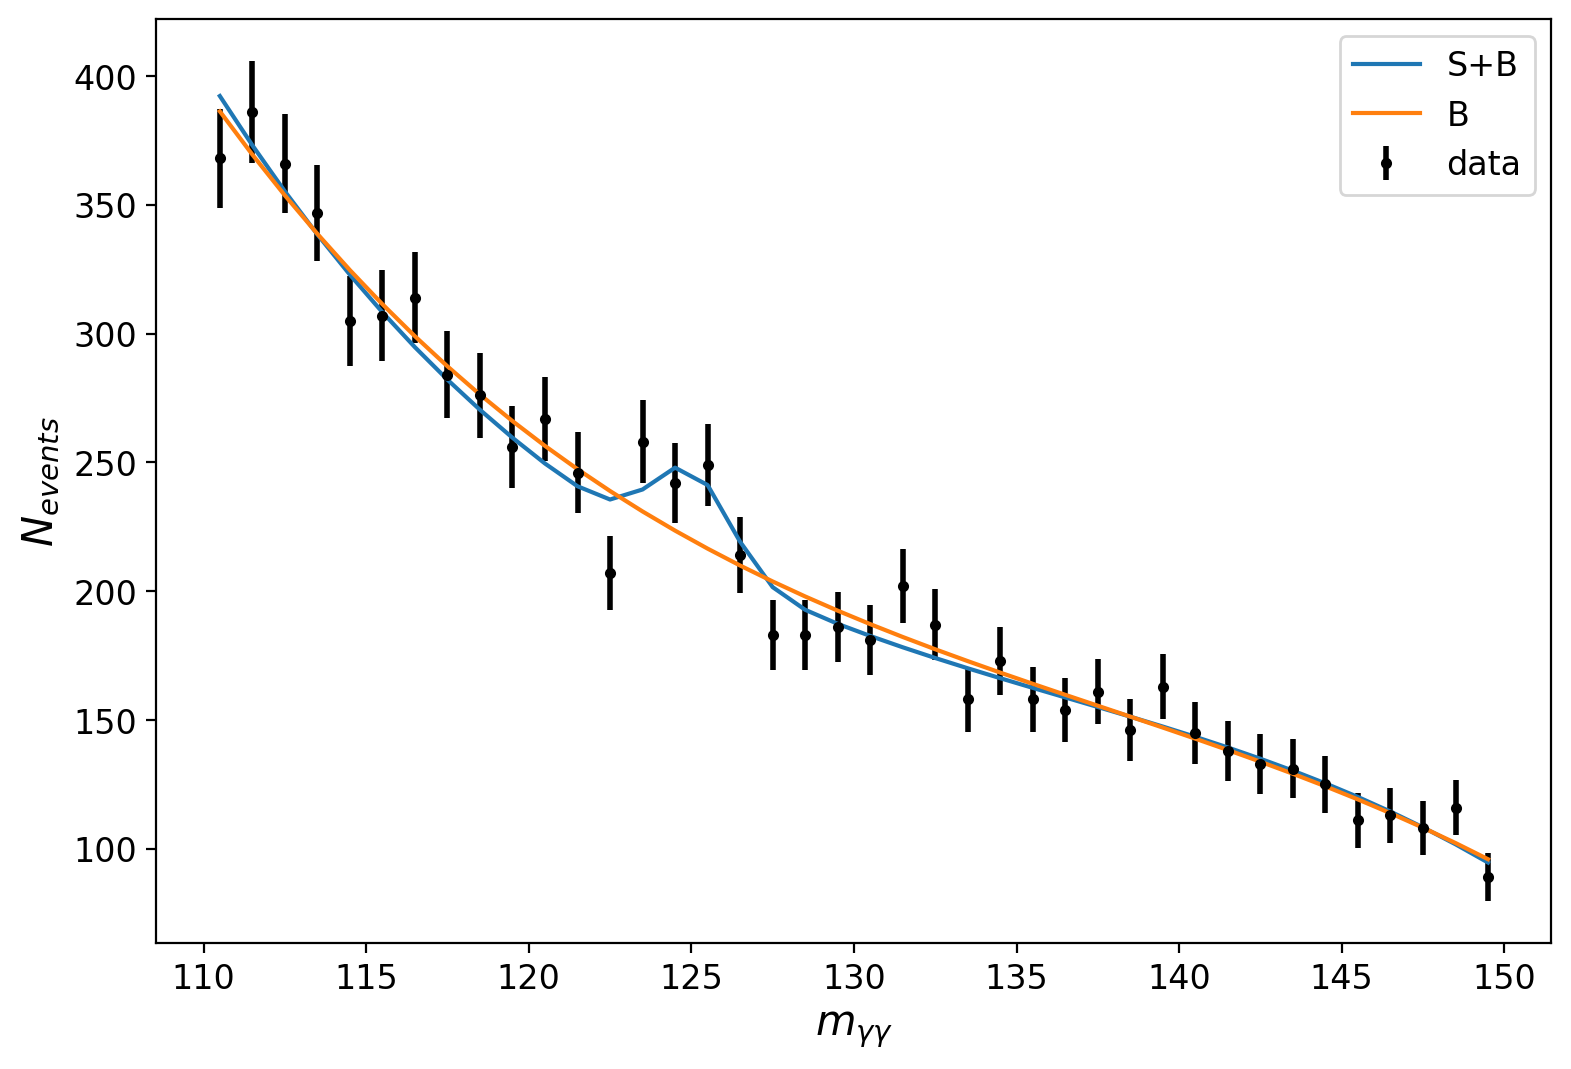

2NLL: 7.381865335424511 p-value 0.006588480073389302


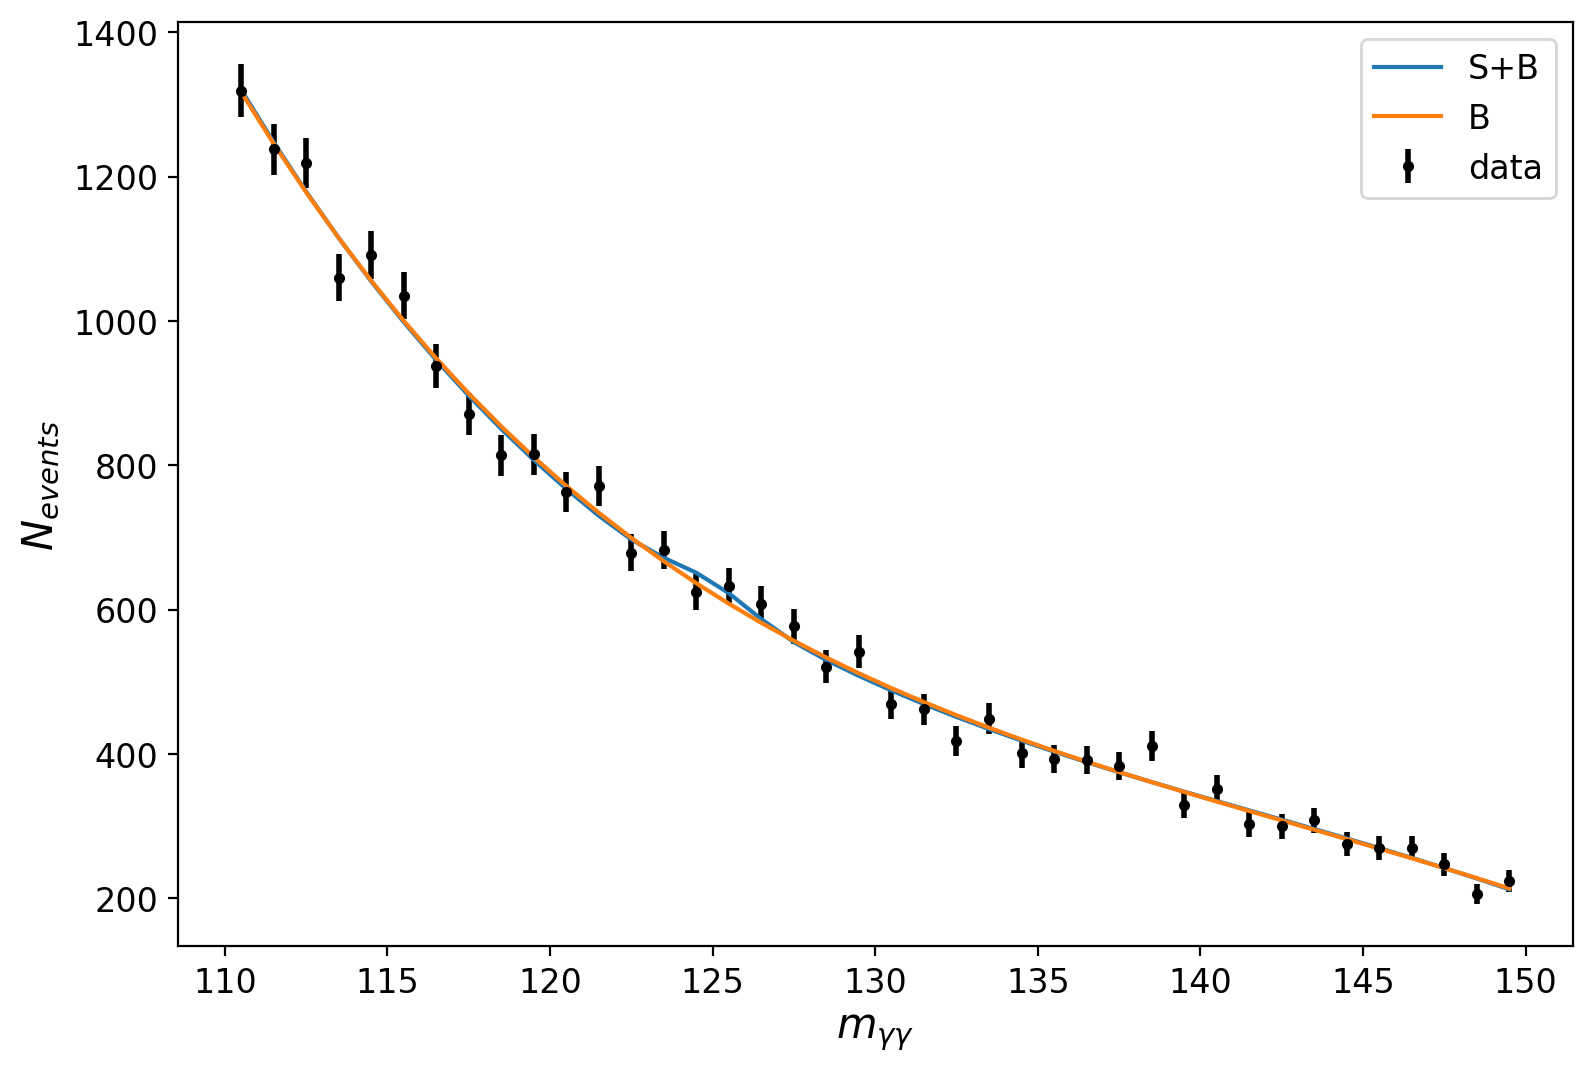

2NLL: 1.0185067753286035 p-value 0.31287346825415707


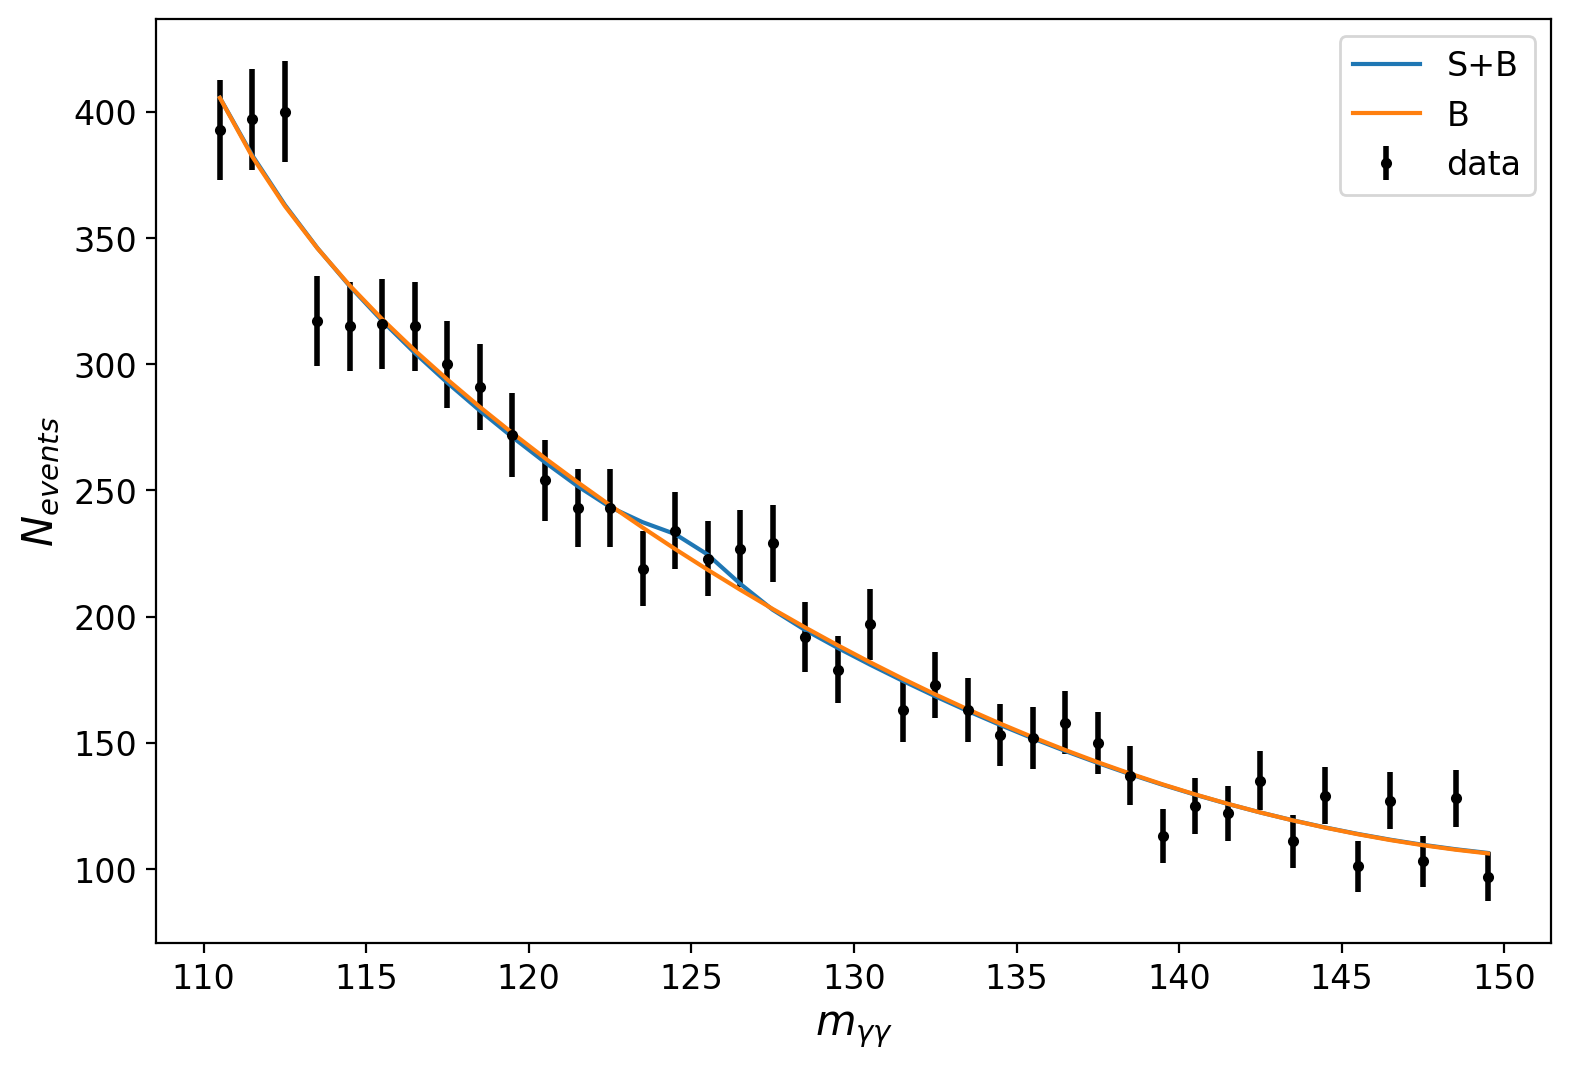

2NLL: 0.4573658316138136 p-value 0.4988576352196198


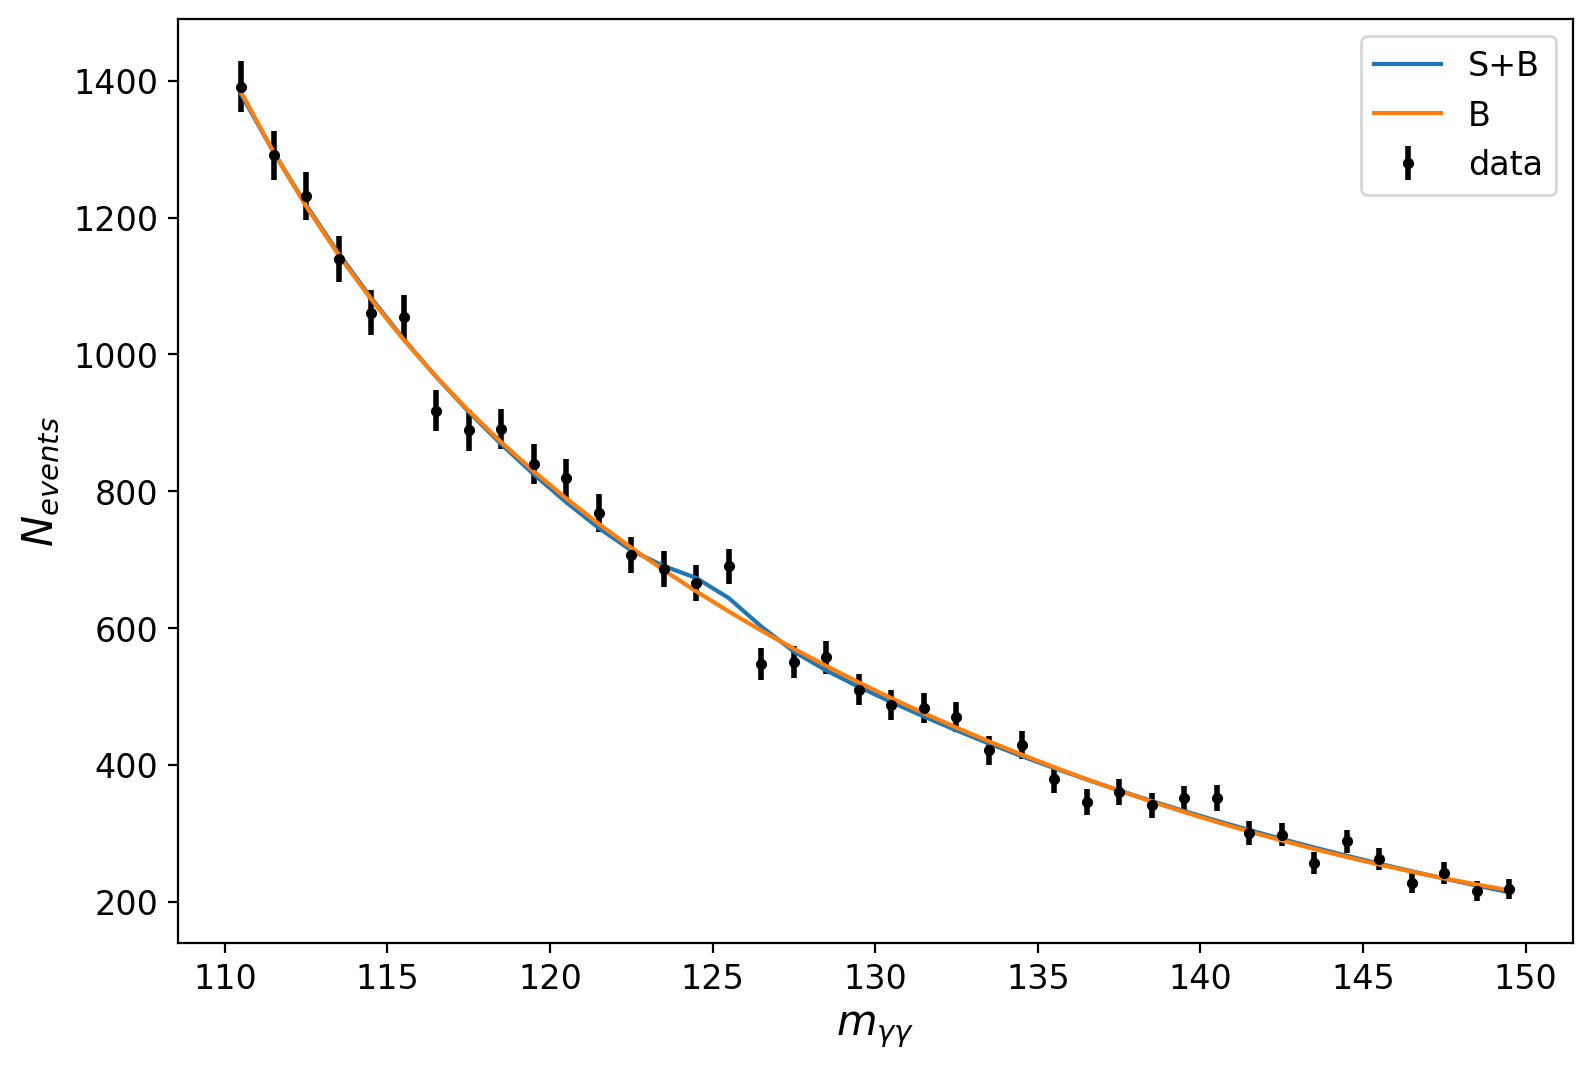

2NLL: 1.8417193344849565 p-value 0.1747495643713246


In [69]:
def fitModel(iX,iY,iWeights,iM,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0,amp=0,mass=iM,sigma=1.2)
    try:
        p["mass"].vary=False
        p["sigma"].vary=False
    except:
      a=1
      #print("Mass and Sigma not in fit")
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    output = model.eval(params=result.params,x=iX)
    return output,result.residual

def sigbkg4(x,p0,p1,p2,p3,p4,amp,mass,sigma):
    bkg=bkg4(x,p0,p1,p2,p3,p4)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

def sigbkg5(x,p0,p1,p2,p3,p4,p5,amp,mass,sigma):
    bkg=bkg5(x,p0,p1,p2,p3,p4,p5)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg


#answer
NLL=fitSig("data/out.txt",125,sigbkg5,bkg5,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out2.txt",125,sigbkg5,bkg5,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out3.txt",125,sigbkg5,bkg5,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out4.txt",125,sigbkg5,bkg5,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("data/out5.txt",125,sigbkg5,bkg5,True)
print("2NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))


Our p-value for this one category went down from 0.004 to 0.048. This means we are getting less excess. Could this mean we are more sensitive? Let's do the full combined p-value scan with this assumptions, and compare.  Note that the scan below now starts to take a little bit of time (few min). 

While you are waiting to run the code, maybe you can start to guess which function will be more sensitive? 

Moreover, given that, is there anything we gain from having multiple functions? 

Mass: 120.0
Mass: 121.11111111111111
Mass: 122.22222222222223
Mass: 123.33333333333333
Mass: 124.44444444444444
Mass: 125.55555555555556
Mass: 126.66666666666667
Mass: 127.77777777777777
Mass: 128.88888888888889
Mass: 130.0


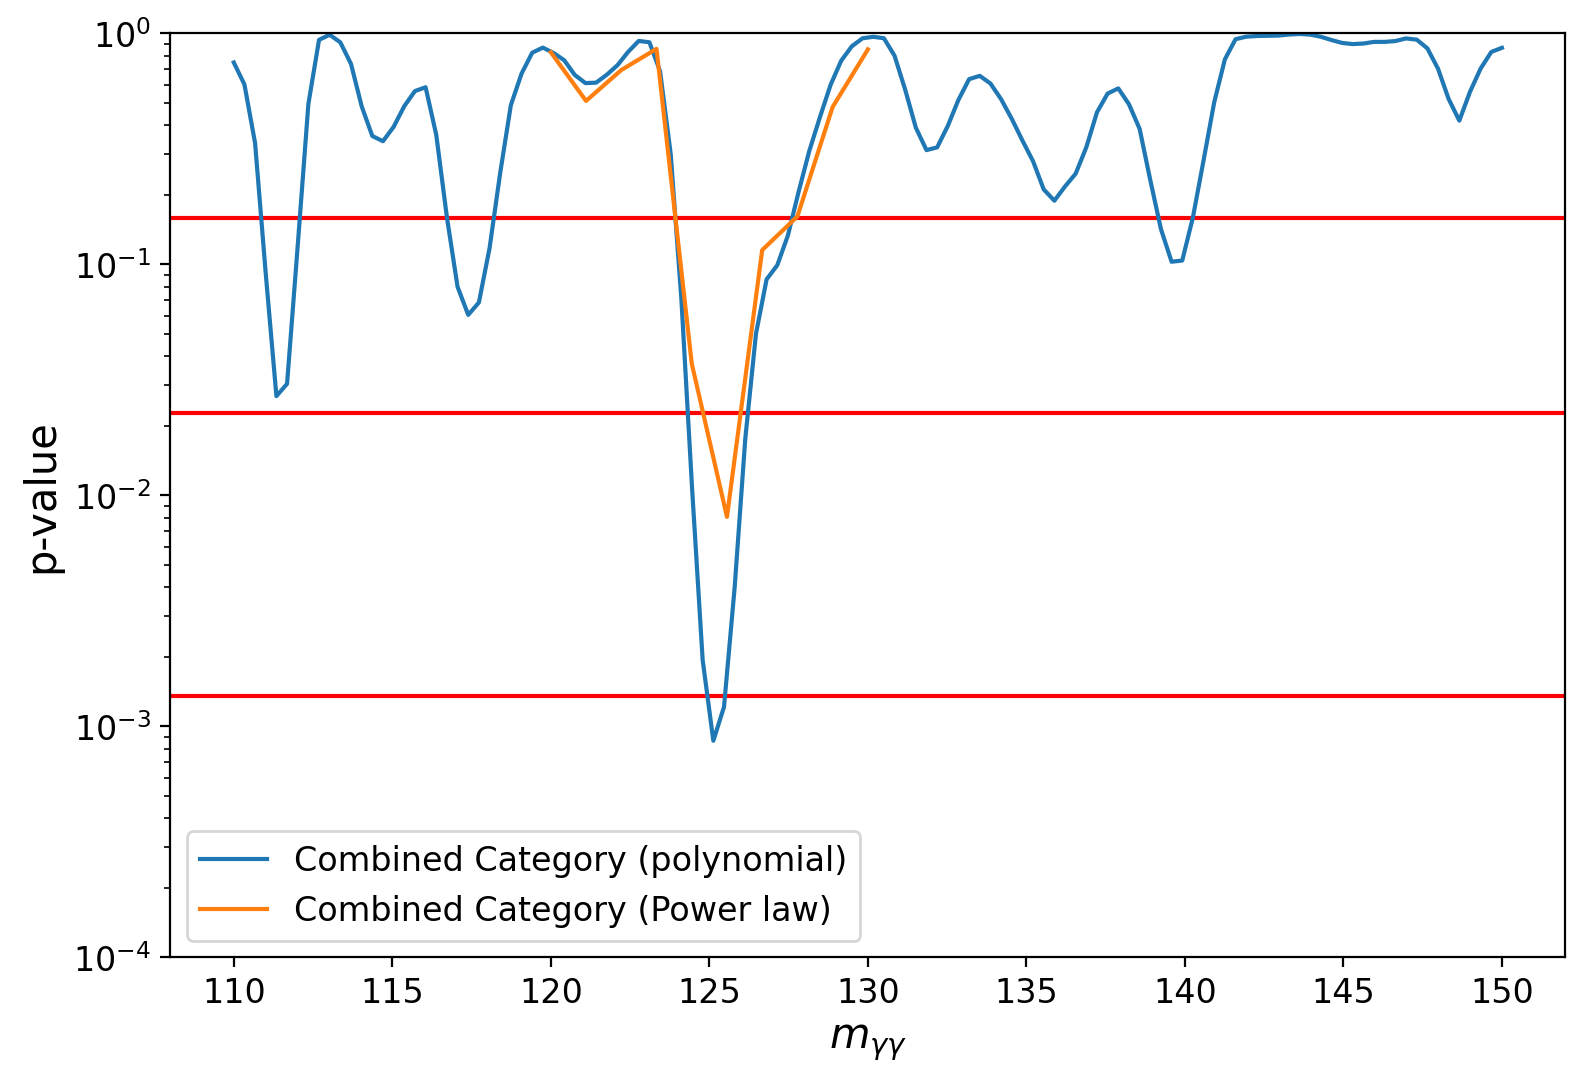

In [70]:
def pvaluePlot(iLabel,iSBFunc,iBFunc):
    pvalue = np.array([])
    massrange=np.linspace(120,130,10)
    for pMass in massrange:
        print("Mass:",pMass)
        pvalue = np.append(pvalue,pvalueCalc(iLabel,pMass,iSBFunc,iBFunc))
    return massrange,pvalue


files=["data/out.txt","data/out2.txt","data/out3.txt","data/out4.txt","data/out5.txt"]
mCB2,pCB2 = pvaluePlot(files,sigbkg4,bkg4)

for pVal in range(4):
    sigmas = 1-stats.norm.cdf(pVal+1)
    plt.axhline(y=sigmas, color='r', linestyle='-')
plt.plot(mC,pC,label="Combined Category (polynomial)")
plt.plot(mCB2,pCB2,label="Combined Category (Power law)")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()


Now, in light of this, there has been a recent development known as discrete profiling that has allowed to extend the scope of our interpretations. The idea here is that if we account for our degrees of freedom to be different, we can profile a whole library of functions simultaneously, and we can compare all of them by looking at their corrected likelihood. 

To do this, we are going to do something a little ad-hoc here and just look at one explempary category so that we can really understand how the envelope changes our measurements. What we will do below, is replace our p-value with a likelihood scan, then we will scan around the Higgs mass and show the likelihood

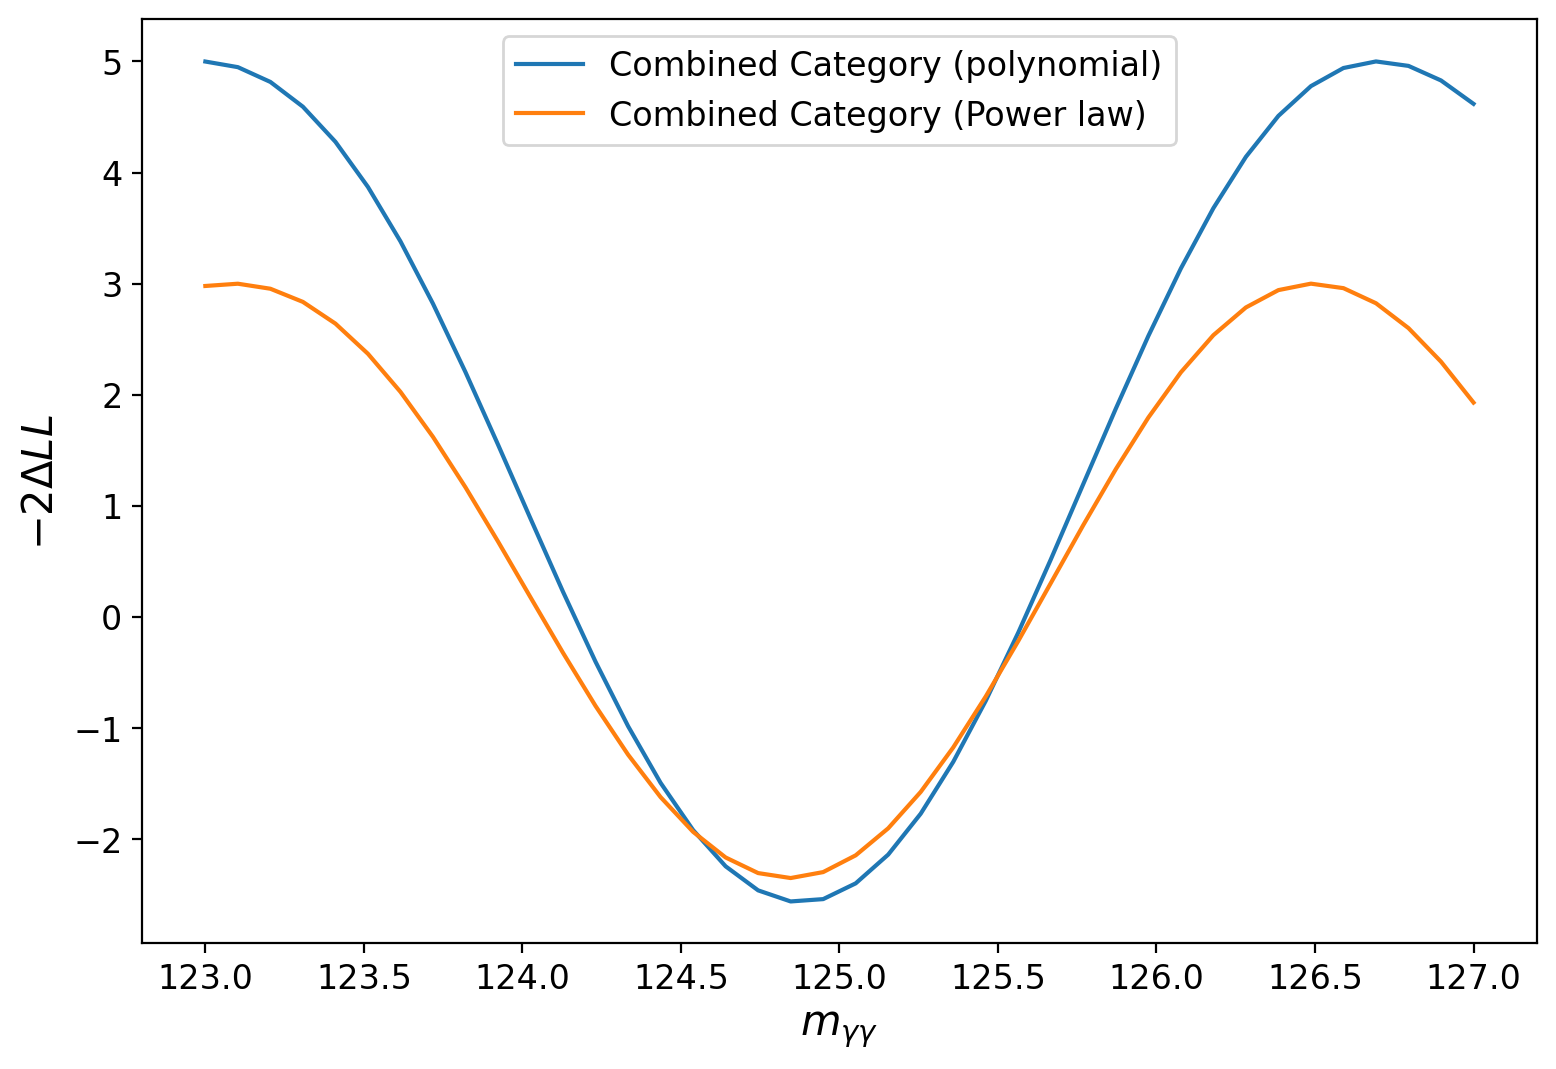

In [71]:
def logCalc(iLabel,pMass,iSBFunc,iBFunc,iNDOF):
    lNLL=iNDOF
    for pLabel in iLabel:
        pNLL=fitSig(pLabel,pMass,iSBFunc,iBFunc,False)
        lNLL -= pNLL
    return lNLL

def NLLPlot(iLabel,iSBFunc,iBFunc,iNDOF):
    NLL = np.array([])
    massrange=np.linspace(123,127,40)
    for pMass in massrange:
        NLL = np.append(NLL,logCalc(iLabel,pMass,iSBFunc,iBFunc,iNDOF))
    return massrange,NLL

files=["data/out2.txt"]
mCP2,lLLP = NLLPlot(files,sigpol4,pol4,5)
mCB2,lLLB = NLLPlot(files,sigbkg4,bkg4,3)

plt.plot(mCP2,lLLP,label="Combined Category (polynomial)")
plt.plot(mCB2,lLLB,label="Combined Category (Power law)")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$-2\Delta LL$")
plt.legend()
plt.show()


The true minimum is defined by the envelope in the corrected likelihood, that really gives us the full information that enables us to quote a result. Discrete profiling thus enables us to get even more sensitive if our envelope narrows. However, its often that it widens, this is the uncertainty coming in from function choice. The point being is that by being more expressive by adding more function choices, we naturally give the fit more flexibility to fit well. If there are more options that fit well, then our uncertainties get larger.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.7.1</span>

Based on the above envelope compute the Higgs mass? 


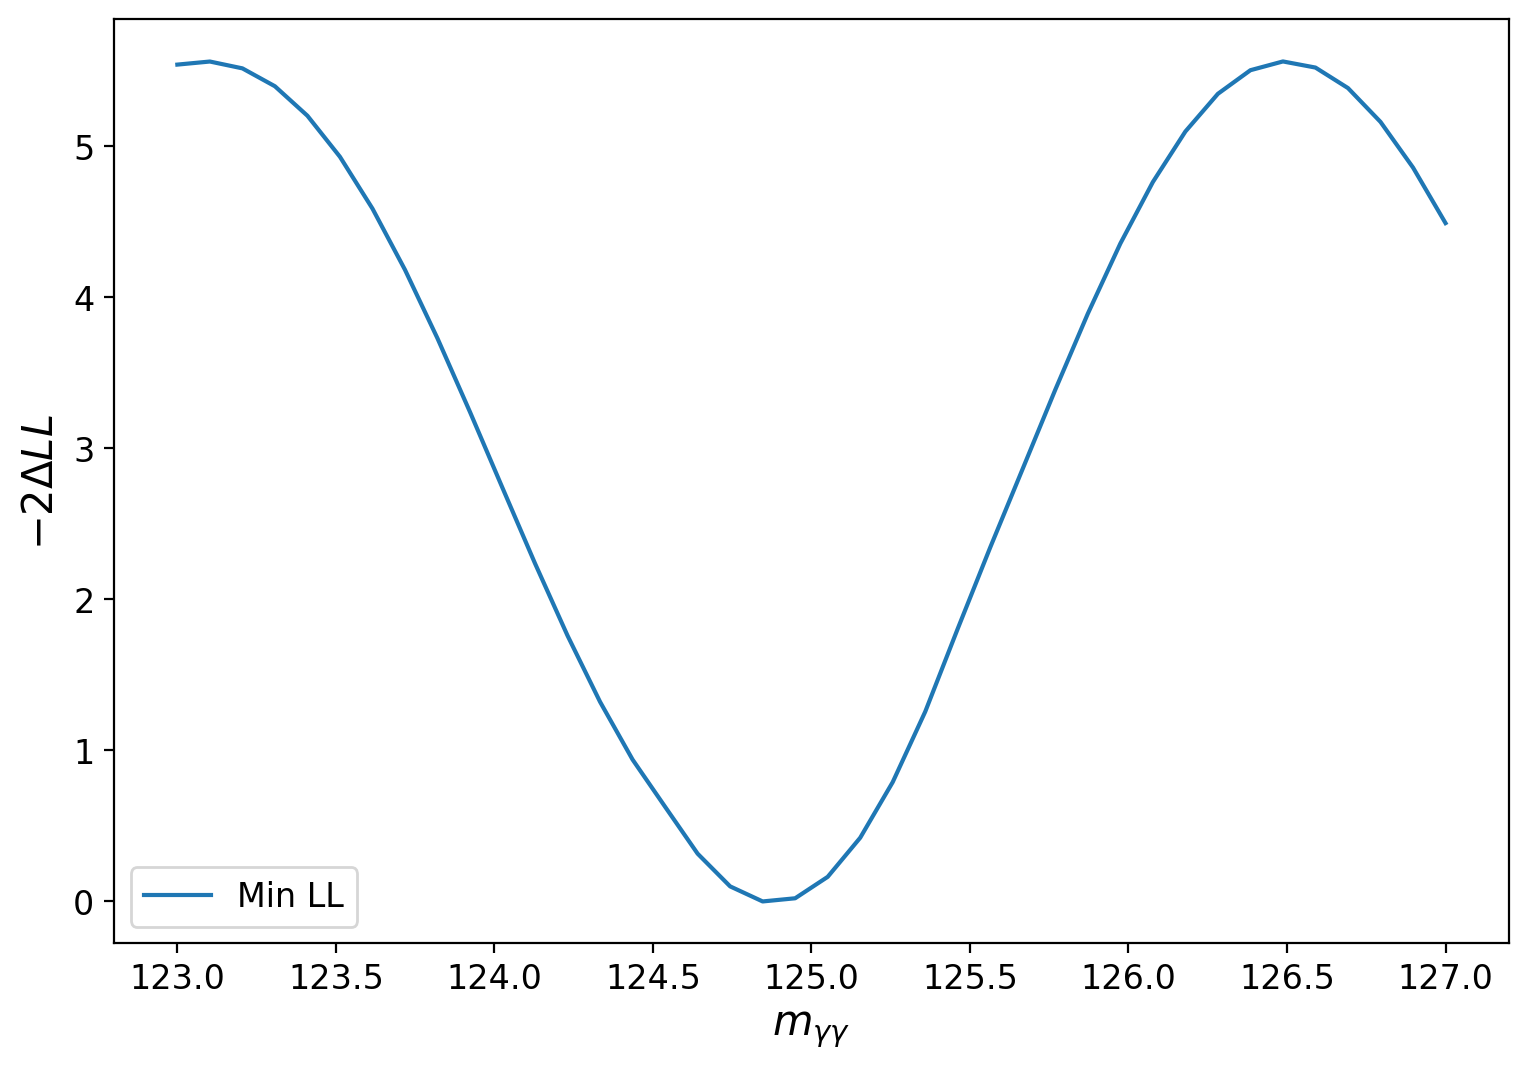

In [72]:
minall=np.minimum(lLLB.flatten(),lLLP.flatten())
minall=np.min(minall)
plt.plot(mCB2,np.minimum(lLLB,lLLP)-minall,label="Min LL")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$-2\Delta LL$")
plt.legend()
plt.show()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Our best fit mass is from 124.4 to 125.3 => 124.8 +/- 0.35 (almost spont on!)
</pre>
        
**EXPLANATION:**
The minimum is not now a quadratic and has a bulge on the left. This shows we have added a systematic for function choice and made the uncertainties slightly larger. 
    
</div>
